In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from keras.models import load_model
from keras.models import Model
from keras.layers import Input,Dense,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import scipy.io as sio
from copy import deepcopy
import random
random.seed(40)

Using TensorFlow backend.


In [2]:
path='matdata_all.mat'
temp=sio.loadmat(path)
ps1=temp['ps1']
label0=temp['label0']
label1=temp['label1']
label2=temp['label2']
label3=temp['label3']
label4=temp['label4']
print (label0.shape, label1.shape, label2.shape,label3.shape)

(2205, 3) (2205, 4) (2205, 3) (2205, 4)


In [3]:
def wgn(x, snr):
    xpower = np.sum(x**2)/len(x)
    npower = xpower * snr
    return np.sqrt(npower)

In [4]:
"""
Cooler condition classification, three-way
"""
nsr1= np.asarray(list(range(45,50)))*0.0005
nsr2= np.asarray(list(range(1,41)))*0.025
#nsr3= np.asarray([0,0.0001])
#nsr=np.concatenate((nsr3,nsr1))
nsr=np.concatenate((nsr1,nsr2))
acc1_2=[]

In [5]:
for ratio in nsr:
    print ('the noise ratio is:',ratio)
    ps2=deepcopy(ps1)
    sss=StratifiedShuffleSplit(test_size=0.1, random_state=40)
    for index in range(ps2.shape[0]):
        ps2[index,:]=(ps2[index,:].reshape(1,-1)+wgn(ps2[index,:], ratio/100)*np.random.randn(1,ps2.shape[1]))

    for train_index,test_index in sss.split(ps2,label0):
        train_ps1=ps2[train_index]
        train_label=label0[train_index]
        test_ps1=ps2[test_index]
        test_label=label0[test_index]
    scaler= preprocessing.StandardScaler().fit(train_ps1)
    train_ps1_norm=scaler.transform(train_ps1)
    test_ps1_norm=scaler.transform(test_ps1)
    train_ps1_norm=np.expand_dims(train_ps1_norm,axis=2)
    test_ps1_norm=np.expand_dims(test_ps1_norm,axis=2)

    input=Input(shape=(6000,1))
    conv1=Conv1D(64,kernel_size=10,strides=5,activation='relu')(input)
    pool1=MaxPool1D(pool_size=2)(conv1)
    conv2=Conv1D(64,kernel_size=2,activation='relu')(pool1)
    pool2=MaxPool1D(pool_size=2)(conv2)
    flat1=Flatten(name='flatten')(pool2)
    dense2=Dense(500,activation='relu')(flat1)
    #dense3=Dropout(0.4)(dense2)
    dense3=Dense(50,activation='relu')(dense2)
    output=Dense(3,activation='softmax',name='result')(dense3)  # change the node in different classificaiton ways
    model=Model(inputs=input,outputs=output)
    model.summary()
    optimizer = optimizers.adam(lr=0.0001,decay=1e-5)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['acc'])
    model.summary()
    hist=model.fit(train_ps1_norm,train_label, epochs=100,validation_data=(test_ps1_norm,test_label),verbose=2)
    acc1_2.append(hist.history['val_acc'][-1])

the noise ratio is: 0.0225
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 599, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
___________________________________________

Epoch 53/100
 - 1s - loss: 3.2011e-05 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0.9774
Epoch 54/100
 - 1s - loss: 2.9990e-05 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 2.8554e-05 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9774
Epoch 56/100
 - 1s - loss: 2.7418e-05 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 2.5216e-05 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9774
Epoch 58/100
 - 1s - loss: 2.4118e-05 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9774
Epoch 59/100
 - 1s - loss: 2.2741e-05 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0.9819
Epoch 60/100
 - 1s - loss: 2.1775e-05 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9774
Epoch 61/100
 - 1s - loss: 2.0576e-05 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9774
Epoch 62/100
 - 1s - loss: 1.9213e-05 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 0.9774
Epoch 63/100
 - 1s - loss: 1.8240e-05 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9774
Epoch 64/100
 - 1s - 

Epoch 11/100
 - 1s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0548 - val_acc: 0.9819
Epoch 12/100
 - 1s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9819
Epoch 13/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 0.9819
Epoch 14/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0581 - val_acc: 0.9819
Epoch 15/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 16/100
 - 1s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0574 - val_acc: 0.9819
Epoch 17/100
 - 1s - loss: 9.1065e-04 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9819
Epoch 18/100
 - 1s - loss: 7.6779e-04 - acc: 1.0000 - val_loss: 0.0554 - val_acc: 0.9819
Epoch 19/100
 - 1s - loss: 6.6311e-04 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9774
Epoch 20/100
 - 1s - loss: 5.9766e-04 - acc: 1.0000 - val_loss: 0.0583 - val_acc: 0.9819
Epoch 21/100
 - 1s - loss: 5.0387e-04 - acc: 1.0000 - val_loss: 0.0585 - val_acc: 0.9774
Epoch 22/100
 - 1s - loss: 4.4427e-04 - acc: 

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 1s - loss: 0.2468 - acc: 0.9390 - val_loss: 0.0858 - val_acc: 0.9729
Epoch 2/100
 - 1s - loss: 0.0884 - acc: 0.9718 - val_loss: 0.0708 - val_acc: 0.9774
Epoch 3/100
 - 1s - loss: 0.0672 - acc: 0.9768 - val_loss: 0.0680 - val_acc: 0.9774
Epoch 4/100
 - 1s - loss: 0.0431 - acc: 0.9844 - val_loss: 0.0522 - val_acc: 0.9774
Epoch 5/100
 - 1s - loss: 0.0238 - acc: 0.9955 - val_loss: 0.0479 - val_acc: 0.9819
Epoch 6/100
 - 1s - loss: 0.0149 - acc: 0.9985 - val_loss: 0.0554 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0096 - acc: 0.9985 - val_loss: 0.0523 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0065 - acc: 0.9995 - val_loss: 0.0440 - val_acc: 0.9819
Epoch 9/100
 - 1s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0439 - val_acc: 0.9819
Epoch 10/100
 - 1s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0484 - val_acc: 0.9864
Epoch 11/100
 - 1s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0475 - val_acc: 0.9819
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 3.3724e-06 - acc: 1.0000 - val_loss: 0.0783 - val_acc: 0.9819
Epoch 95/100
 - 1s - loss: 3.2028e-06 - acc: 1.0000 - val_loss: 0.0795 - val_acc: 0.9819
Epoch 96/100
 - 1s - loss: 3.0511e-06 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9819
Epoch 97/100
 - 1s - loss: 2.9075e-06 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9819
Epoch 98/100
 - 1s - loss: 2.7910e-06 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9819
Epoch 99/100
 - 1s - loss: 2.6684e-06 - acc: 1.0000 - val_loss: 0.0792 - val_acc: 0.9819
Epoch 100/100
 - 1s - loss: 2.5428e-06 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9819
the noise ratio is: 0.024
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1199, 64)          704       
____________________

Epoch 52/100
 - 1s - loss: 4.9229e-05 - acc: 1.0000 - val_loss: 0.0763 - val_acc: 0.9774
Epoch 53/100
 - 1s - loss: 4.6719e-05 - acc: 1.0000 - val_loss: 0.0776 - val_acc: 0.9774
Epoch 54/100
 - 1s - loss: 4.3490e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 4.1058e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9729
Epoch 56/100
 - 1s - loss: 3.8769e-05 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 3.6687e-05 - acc: 1.0000 - val_loss: 0.0802 - val_acc: 0.9774
Epoch 58/100
 - 1s - loss: 3.4706e-05 - acc: 1.0000 - val_loss: 0.0802 - val_acc: 0.9774
Epoch 59/100
 - 1s - loss: 3.2480e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9774
Epoch 60/100
 - 1s - loss: 3.1026e-05 - acc: 1.0000 - val_loss: 0.0786 - val_acc: 0.9729
Epoch 61/100
 - 1s - loss: 2.9362e-05 - acc: 1.0000 - val_loss: 0.0802 - val_acc: 0.9774
Epoch 62/100
 - 1s - loss: 2.7869e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9774
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0479 - val_acc: 0.9819
Epoch 11/100
 - 1s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0494 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0482 - val_acc: 0.9819
Epoch 13/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0521 - val_acc: 0.9774
Epoch 14/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0538 - val_acc: 0.9774
Epoch 15/100
 - 1s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0527 - val_acc: 0.9774
Epoch 16/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0535 - val_acc: 0.9864
Epoch 17/100
 - 1s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0611 - val_acc: 0.9864
Epoch 18/100
 - 1s - loss: 8.8862e-04 - acc: 1.0000 - val_loss: 0.0594 - val_acc: 0.9864
Epoch 19/100
 - 1s - loss: 7.8113e-04 - acc: 1.0000 - val_loss: 0.0546 - val_acc: 0.9819
Epoch 20/100
 - 1s - loss: 6.6658e-04 - acc: 1.0000 - val_loss: 0.0571 - val_acc: 0.9819
Epoch 21/100
 - 1s - loss: 5.8035e-04 - acc: 1.0000 -

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 1s - loss: 0.2537 - acc: 0.9219 - val_loss: 0.0895 - val_acc: 0.9683
Epoch 2/100
 - 1s - loss: 0.0955 - acc: 0.9708 - val_loss: 0.0729 - val_acc: 0.9774
Epoch 3/100
 - 1s - loss: 0.0690 - acc: 0.9783 - val_loss: 0.0619 - val_acc: 0.9774
Epoch 4/100
 - 1s - loss: 0.0634 - acc: 0.9798 - val_loss: 0.0613 - val_acc: 0.9774
Epoch 5/100
 - 1s - loss: 0.0357 - acc: 0.9864 - val_loss: 0.0533 - val_acc: 0.9774
Epoch 6/100
 - 1s - loss: 0.0209 - acc: 0.9950 - val_loss: 0.0487 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0144 - acc: 0.9975 - val_loss: 0.0471 - val_acc: 0.9729
Epoch 8/100
 - 1s - loss: 0.0109 - acc: 0.9985 - val_loss: 0.0550 - val_acc: 0.9819
Epoch 9/100
 - 1s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0439 - val_acc: 0.9729
Epoch 10/100
 - 1s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0431 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0485 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 7.0255e-06 - acc: 1.0000 - val_loss: 0.0717 - val_acc: 0.9864
Epoch 95/100
 - 1s - loss: 6.6675e-06 - acc: 1.0000 - val_loss: 0.0731 - val_acc: 0.9819
Epoch 96/100
 - 1s - loss: 6.5089e-06 - acc: 1.0000 - val_loss: 0.0724 - val_acc: 0.9864
Epoch 97/100
 - 1s - loss: 6.2165e-06 - acc: 1.0000 - val_loss: 0.0715 - val_acc: 0.9864
Epoch 98/100
 - 1s - loss: 5.9472e-06 - acc: 1.0000 - val_loss: 0.0723 - val_acc: 0.9864
Epoch 99/100
 - 1s - loss: 5.6396e-06 - acc: 1.0000 - val_loss: 0.0735 - val_acc: 0.9864
Epoch 100/100
 - 1s - loss: 5.4495e-06 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9864
the noise ratio is: 0.05
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1199, 64)          704       
_____________________

Epoch 52/100
 - 1s - loss: 6.0523e-05 - acc: 1.0000 - val_loss: 0.0550 - val_acc: 0.9864
Epoch 53/100
 - 1s - loss: 5.6808e-05 - acc: 1.0000 - val_loss: 0.0553 - val_acc: 0.9819
Epoch 54/100
 - 1s - loss: 5.3932e-05 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 0.9819
Epoch 55/100
 - 1s - loss: 5.2348e-05 - acc: 1.0000 - val_loss: 0.0561 - val_acc: 0.9864
Epoch 56/100
 - 1s - loss: 4.8265e-05 - acc: 1.0000 - val_loss: 0.0566 - val_acc: 0.9864
Epoch 57/100
 - 1s - loss: 4.6579e-05 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 0.9864
Epoch 58/100
 - 1s - loss: 4.4411e-05 - acc: 1.0000 - val_loss: 0.0564 - val_acc: 0.9819
Epoch 59/100
 - 1s - loss: 4.1999e-05 - acc: 1.0000 - val_loss: 0.0569 - val_acc: 0.9864
Epoch 60/100
 - 1s - loss: 4.0536e-05 - acc: 1.0000 - val_loss: 0.0562 - val_acc: 0.9864
Epoch 61/100
 - 1s - loss: 3.7620e-05 - acc: 1.0000 - val_loss: 0.0572 - val_acc: 0.9864
Epoch 62/100
 - 1s - loss: 3.6623e-05 - acc: 1.0000 - val_loss: 0.0562 - val_acc: 0.9819
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0597 - val_acc: 0.9819
Epoch 11/100
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0686 - val_acc: 0.9819
Epoch 12/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9819
Epoch 13/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9819
Epoch 14/100
 - 1s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 0.9819
Epoch 15/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0687 - val_acc: 0.9819
Epoch 16/100
 - 1s - loss: 9.1348e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9774
Epoch 17/100
 - 1s - loss: 7.7339e-04 - acc: 1.0000 - val_loss: 0.0705 - val_acc: 0.9819
Epoch 18/100
 - 1s - loss: 6.6831e-04 - acc: 1.0000 - val_loss: 0.0709 - val_acc: 0.9774
Epoch 19/100
 - 1s - loss: 5.7947e-04 - acc: 1.0000 - val_loss: 0.0742 - val_acc: 0.9819
Epoch 20/100
 - 1s - loss: 5.1811e-04 - acc: 1.0000 - val_loss: 0.0756 - val_acc: 0.9819
Epoch 21/100
 - 1s - loss: 4.6435e-04 - acc: 

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 1s - loss: 0.2761 - acc: 0.9259 - val_loss: 0.0978 - val_acc: 0.9774
Epoch 2/100
 - 1s - loss: 0.1070 - acc: 0.9728 - val_loss: 0.0883 - val_acc: 0.9774
Epoch 3/100
 - 1s - loss: 0.0721 - acc: 0.9778 - val_loss: 0.0807 - val_acc: 0.9729
Epoch 4/100
 - 1s - loss: 0.0475 - acc: 0.9859 - val_loss: 0.0753 - val_acc: 0.9774
Epoch 5/100
 - 1s - loss: 0.0252 - acc: 0.9955 - val_loss: 0.0851 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.0148 - acc: 0.9980 - val_loss: 0.0899 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0760 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0785 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0845 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 6.4196e-06 - acc: 1.0000 - val_loss: 0.1355 - val_acc: 0.9774
Epoch 95/100
 - 1s - loss: 6.2462e-06 - acc: 1.0000 - val_loss: 0.1351 - val_acc: 0.9774
Epoch 96/100
 - 1s - loss: 5.9577e-06 - acc: 1.0000 - val_loss: 0.1340 - val_acc: 0.9774
Epoch 97/100
 - 1s - loss: 5.6629e-06 - acc: 1.0000 - val_loss: 0.1351 - val_acc: 0.9774
Epoch 98/100
 - 1s - loss: 5.4644e-06 - acc: 1.0000 - val_loss: 0.1360 - val_acc: 0.9774
Epoch 99/100
 - 1s - loss: 5.1784e-06 - acc: 1.0000 - val_loss: 0.1352 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 4.9896e-06 - acc: 1.0000 - val_loss: 0.1371 - val_acc: 0.9774
the noise ratio is: 0.125
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 1199, 64)          704       
____________________

Epoch 52/100
 - 1s - loss: 4.9588e-05 - acc: 1.0000 - val_loss: 0.1150 - val_acc: 0.9774
Epoch 53/100
 - 1s - loss: 4.6823e-05 - acc: 1.0000 - val_loss: 0.1153 - val_acc: 0.9819
Epoch 54/100
 - 1s - loss: 4.4482e-05 - acc: 1.0000 - val_loss: 0.1165 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 4.2388e-05 - acc: 1.0000 - val_loss: 0.1167 - val_acc: 0.9819
Epoch 56/100
 - 1s - loss: 3.9860e-05 - acc: 1.0000 - val_loss: 0.1169 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 3.7573e-05 - acc: 1.0000 - val_loss: 0.1176 - val_acc: 0.9774
Epoch 58/100
 - 1s - loss: 3.5796e-05 - acc: 1.0000 - val_loss: 0.1187 - val_acc: 0.9774
Epoch 59/100
 - 1s - loss: 3.3475e-05 - acc: 1.0000 - val_loss: 0.1195 - val_acc: 0.9819
Epoch 60/100
 - 1s - loss: 3.2077e-05 - acc: 1.0000 - val_loss: 0.1205 - val_acc: 0.9774
Epoch 61/100
 - 1s - loss: 3.0336e-05 - acc: 1.0000 - val_loss: 0.1208 - val_acc: 0.9774
Epoch 62/100
 - 1s - loss: 2.8721e-05 - acc: 1.0000 - val_loss: 0.1207 - val_acc: 0.9819
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0631 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0613 - val_acc: 0.9729
Epoch 13/100
 - 1s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9774
Epoch 14/100
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9774
Epoch 15/100
 - 1s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9729
Epoch 16/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9774
Epoch 17/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9774
Epoch 18/100
 - 1s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9774
Epoch 19/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0680 - val_acc: 0.9774
Epoch 20/100
 - 1s - loss: 9.6926e-04 - acc: 1.0000 - val_loss: 0.0690 - val_acc: 0.9774
Epoch 21/100
 - 1s - loss: 8.6087e-04 - acc: 1.0000 - val_los

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.3940 - acc: 0.8826 - val_loss: 0.1294 - val_acc: 0.9729
Epoch 2/100
 - 1s - loss: 0.1297 - acc: 0.9713 - val_loss: 0.1046 - val_acc: 0.9593
Epoch 3/100
 - 1s - loss: 0.1065 - acc: 0.9708 - val_loss: 0.0896 - val_acc: 0.9729
Epoch 4/100
 - 1s - loss: 0.0739 - acc: 0.9768 - val_loss: 0.0760 - val_acc: 0.9774
Epoch 5/100
 - 1s - loss: 0.0514 - acc: 0.9849 - val_loss: 0.0732 - val_acc: 0.9774
Epoch 6/100
 - 1s - loss: 0.0318 - acc: 0.9899 - val_loss: 0.0736 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0214 - acc: 0.9955 - val_loss: 0.0721 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0157 - acc: 0.9975 - val_loss: 0.0689 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0111 - acc: 0.9995 - val_loss: 0.0699 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0079 - acc: 1.0000 - val_loss: 0.0733 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0736 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 1.1000e-05 - acc: 1.0000 - val_loss: 0.1251 - val_acc: 0.9774
Epoch 95/100
 - 1s - loss: 1.0269e-05 - acc: 1.0000 - val_loss: 0.1255 - val_acc: 0.9774
Epoch 96/100
 - 1s - loss: 9.9458e-06 - acc: 1.0000 - val_loss: 0.1263 - val_acc: 0.9774
Epoch 97/100
 - 1s - loss: 9.5716e-06 - acc: 1.0000 - val_loss: 0.1270 - val_acc: 0.9774
Epoch 98/100
 - 1s - loss: 9.0567e-06 - acc: 1.0000 - val_loss: 0.1272 - val_acc: 0.9774
Epoch 99/100
 - 1s - loss: 8.7165e-06 - acc: 1.0000 - val_loss: 0.1274 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 8.3597e-06 - acc: 1.0000 - val_loss: 0.1270 - val_acc: 0.9774
the noise ratio is: 0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1199, 64)          704       
______________________

Epoch 52/100
 - 1s - loss: 5.1008e-05 - acc: 1.0000 - val_loss: 0.1134 - val_acc: 0.9774
Epoch 53/100
 - 1s - loss: 4.8010e-05 - acc: 1.0000 - val_loss: 0.1123 - val_acc: 0.9774
Epoch 54/100
 - 1s - loss: 4.5310e-05 - acc: 1.0000 - val_loss: 0.1139 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 4.2733e-05 - acc: 1.0000 - val_loss: 0.1141 - val_acc: 0.9774
Epoch 56/100
 - 1s - loss: 4.0571e-05 - acc: 1.0000 - val_loss: 0.1140 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 3.8658e-05 - acc: 1.0000 - val_loss: 0.1155 - val_acc: 0.9774
Epoch 58/100
 - 1s - loss: 3.6529e-05 - acc: 1.0000 - val_loss: 0.1172 - val_acc: 0.9774
Epoch 59/100
 - 1s - loss: 3.5142e-05 - acc: 1.0000 - val_loss: 0.1173 - val_acc: 0.9774
Epoch 60/100
 - 1s - loss: 3.2969e-05 - acc: 1.0000 - val_loss: 0.1167 - val_acc: 0.9774
Epoch 61/100
 - 1s - loss: 3.1085e-05 - acc: 1.0000 - val_loss: 0.1181 - val_acc: 0.9774
Epoch 62/100
 - 1s - loss: 2.9975e-05 - acc: 1.0000 - val_loss: 0.1188 - val_acc: 0.9774
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.0573 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0608 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0570 - val_acc: 0.9729
Epoch 13/100
 - 1s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0590 - val_acc: 0.9729
Epoch 14/100
 - 1s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0572 - val_acc: 0.9729
Epoch 15/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0586 - val_acc: 0.9729
Epoch 16/100
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0572 - val_acc: 0.9683
Epoch 17/100
 - 1s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0572 - val_acc: 0.9683
Epoch 18/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0562 - val_acc: 0.9683
Epoch 19/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0596 - val_acc: 0.9729
Epoch 20/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0603 - val_acc: 0.9729
Epoch 21/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.064

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.3779 - acc: 0.9037 - val_loss: 0.1154 - val_acc: 0.9819
Epoch 2/100
 - 1s - loss: 0.1181 - acc: 0.9703 - val_loss: 0.0961 - val_acc: 0.9729
Epoch 3/100
 - 1s - loss: 0.0832 - acc: 0.9748 - val_loss: 0.0826 - val_acc: 0.9774
Epoch 4/100
 - 1s - loss: 0.0520 - acc: 0.9834 - val_loss: 0.0824 - val_acc: 0.9729
Epoch 5/100
 - 1s - loss: 0.0246 - acc: 0.9960 - val_loss: 0.0747 - val_acc: 0.9819
Epoch 6/100
 - 1s - loss: 0.0139 - acc: 0.9990 - val_loss: 0.0765 - val_acc: 0.9729
Epoch 7/100
 - 1s - loss: 0.0084 - acc: 1.0000 - val_loss: 0.0887 - val_acc: 0.9593
Epoch 8/100
 - 1s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0809 - val_acc: 0.9729
Epoch 9/100
 - 1s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0765 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0850 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 0.9683
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 5.4477e-06 - acc: 1.0000 - val_loss: 0.1338 - val_acc: 0.9729
Epoch 95/100
 - 1s - loss: 5.1577e-06 - acc: 1.0000 - val_loss: 0.1352 - val_acc: 0.9729
Epoch 96/100
 - 1s - loss: 5.0016e-06 - acc: 1.0000 - val_loss: 0.1349 - val_acc: 0.9729
Epoch 97/100
 - 1s - loss: 4.7726e-06 - acc: 1.0000 - val_loss: 0.1363 - val_acc: 0.9729
Epoch 98/100
 - 1s - loss: 4.6284e-06 - acc: 1.0000 - val_loss: 0.1359 - val_acc: 0.9729
Epoch 99/100
 - 1s - loss: 4.3943e-06 - acc: 1.0000 - val_loss: 0.1362 - val_acc: 0.9729
Epoch 100/100
 - 1s - loss: 4.2303e-06 - acc: 1.0000 - val_loss: 0.1370 - val_acc: 0.9729
the noise ratio is: 0.275
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 1199, 64)          704       
____________________

Epoch 52/100
 - 1s - loss: 5.2744e-05 - acc: 1.0000 - val_loss: 0.0991 - val_acc: 0.9819
Epoch 53/100
 - 1s - loss: 5.0727e-05 - acc: 1.0000 - val_loss: 0.0999 - val_acc: 0.9819
Epoch 54/100
 - 1s - loss: 4.7581e-05 - acc: 1.0000 - val_loss: 0.1003 - val_acc: 0.9819
Epoch 55/100
 - 1s - loss: 4.4869e-05 - acc: 1.0000 - val_loss: 0.1010 - val_acc: 0.9819
Epoch 56/100
 - 1s - loss: 4.3391e-05 - acc: 1.0000 - val_loss: 0.1009 - val_acc: 0.9819
Epoch 57/100
 - 1s - loss: 4.1252e-05 - acc: 1.0000 - val_loss: 0.1011 - val_acc: 0.9819
Epoch 58/100
 - 1s - loss: 3.9164e-05 - acc: 1.0000 - val_loss: 0.1017 - val_acc: 0.9819
Epoch 59/100
 - 1s - loss: 3.7185e-05 - acc: 1.0000 - val_loss: 0.1022 - val_acc: 0.9819
Epoch 60/100
 - 1s - loss: 3.4992e-05 - acc: 1.0000 - val_loss: 0.1026 - val_acc: 0.9819
Epoch 61/100
 - 1s - loss: 3.3210e-05 - acc: 1.0000 - val_loss: 0.1022 - val_acc: 0.9819
Epoch 62/100
 - 1s - loss: 3.2080e-05 - acc: 1.0000 - val_loss: 0.1026 - val_acc: 0.9819
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.1177 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1226 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.1247 - val_acc: 0.9638
Epoch 13/100
 - 1s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1277 - val_acc: 0.9683
Epoch 14/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1285 - val_acc: 0.9638
Epoch 15/100
 - 1s - loss: 9.8614e-04 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9683
Epoch 16/100
 - 1s - loss: 8.7698e-04 - acc: 1.0000 - val_loss: 0.1339 - val_acc: 0.9683
Epoch 17/100
 - 1s - loss: 7.3573e-04 - acc: 1.0000 - val_loss: 0.1336 - val_acc: 0.9638
Epoch 18/100
 - 1s - loss: 6.4756e-04 - acc: 1.0000 - val_loss: 0.1363 - val_acc: 0.9683
Epoch 19/100
 - 1s - loss: 5.7362e-04 - acc: 1.0000 - val_loss: 0.1379 - val_acc: 0.9638
Epoch 20/100
 - 1s - loss: 5.1614e-04 - acc: 1.0000 - val_loss: 0.1411 - val_acc: 0.9683
Epoch 21/100
 - 1s - loss: 4.4873e-04 - a

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.4939 - acc: 0.8412 - val_loss: 0.1652 - val_acc: 0.9774
Epoch 2/100
 - 1s - loss: 0.1397 - acc: 0.9718 - val_loss: 0.1113 - val_acc: 0.9638
Epoch 3/100
 - 1s - loss: 0.0911 - acc: 0.9748 - val_loss: 0.1004 - val_acc: 0.9683
Epoch 4/100
 - 1s - loss: 0.0654 - acc: 0.9808 - val_loss: 0.0751 - val_acc: 0.9774
Epoch 5/100
 - 1s - loss: 0.0278 - acc: 0.9960 - val_loss: 0.0738 - val_acc: 0.9774
Epoch 6/100
 - 1s - loss: 0.0139 - acc: 1.0000 - val_loss: 0.0686 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.0700 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0684 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 5.6113e-06 - acc: 1.0000 - val_loss: 0.1066 - val_acc: 0.9819
Epoch 95/100
 - 1s - loss: 5.3149e-06 - acc: 1.0000 - val_loss: 0.1058 - val_acc: 0.9819
Epoch 96/100
 - 1s - loss: 5.1438e-06 - acc: 1.0000 - val_loss: 0.1083 - val_acc: 0.9819
Epoch 97/100
 - 1s - loss: 4.9242e-06 - acc: 1.0000 - val_loss: 0.1073 - val_acc: 0.9819
Epoch 98/100
 - 1s - loss: 4.7577e-06 - acc: 1.0000 - val_loss: 0.1054 - val_acc: 0.9819
Epoch 99/100
 - 1s - loss: 4.6330e-06 - acc: 1.0000 - val_loss: 0.1082 - val_acc: 0.9819
Epoch 100/100
 - 1s - loss: 4.4094e-06 - acc: 1.0000 - val_loss: 0.1067 - val_acc: 0.9819
the noise ratio is: 0.35000000000000003
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 1199, 64)          704       
______

Epoch 52/100
 - 1s - loss: 3.5579e-05 - acc: 1.0000 - val_loss: 0.1532 - val_acc: 0.9683
Epoch 53/100
 - 1s - loss: 3.3727e-05 - acc: 1.0000 - val_loss: 0.1528 - val_acc: 0.9683
Epoch 54/100
 - 1s - loss: 3.1298e-05 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9683
Epoch 55/100
 - 1s - loss: 2.9596e-05 - acc: 1.0000 - val_loss: 0.1539 - val_acc: 0.9683
Epoch 56/100
 - 1s - loss: 2.8248e-05 - acc: 1.0000 - val_loss: 0.1565 - val_acc: 0.9683
Epoch 57/100
 - 1s - loss: 2.6598e-05 - acc: 1.0000 - val_loss: 0.1563 - val_acc: 0.9683
Epoch 58/100
 - 1s - loss: 2.5047e-05 - acc: 1.0000 - val_loss: 0.1567 - val_acc: 0.9683
Epoch 59/100
 - 1s - loss: 2.3605e-05 - acc: 1.0000 - val_loss: 0.1595 - val_acc: 0.9683
Epoch 60/100
 - 1s - loss: 2.2371e-05 - acc: 1.0000 - val_loss: 0.1596 - val_acc: 0.9683
Epoch 61/100
 - 1s - loss: 2.1221e-05 - acc: 1.0000 - val_loss: 0.1602 - val_acc: 0.9683
Epoch 62/100
 - 1s - loss: 2.0059e-05 - acc: 1.0000 - val_loss: 0.1621 - val_acc: 0.9683
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0742 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0733 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0760 - val_acc: 0.9774
Epoch 13/100
 - 1s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0726 - val_acc: 0.9774
Epoch 14/100
 - 1s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0738 - val_acc: 0.9774
Epoch 15/100
 - 1s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9774
Epoch 16/100
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9774
Epoch 17/100
 - 1s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9774
Epoch 18/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0750 - val_acc: 0.9774
Epoch 19/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9774
Epoch 20/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0788 - val_acc: 0.9774
Epoch 21/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.080

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.7157 - acc: 0.7303 - val_loss: 0.3126 - val_acc: 0.9774
Epoch 2/100
 - 1s - loss: 0.2016 - acc: 0.9657 - val_loss: 0.1110 - val_acc: 0.9729
Epoch 3/100
 - 1s - loss: 0.1167 - acc: 0.9713 - val_loss: 0.0899 - val_acc: 0.9774
Epoch 4/100
 - 1s - loss: 0.0803 - acc: 0.9798 - val_loss: 0.0872 - val_acc: 0.9729
Epoch 5/100
 - 1s - loss: 0.0538 - acc: 0.9889 - val_loss: 0.0823 - val_acc: 0.9774
Epoch 6/100
 - 1s - loss: 0.0355 - acc: 0.9919 - val_loss: 0.0769 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0218 - acc: 0.9985 - val_loss: 0.0768 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0151 - acc: 0.9985 - val_loss: 0.0774 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0116 - acc: 0.9990 - val_loss: 0.0811 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0073 - acc: 1.0000 - val_loss: 0.0966 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0060 - acc: 0.9995 - val_loss: 0.0840 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 1.5013e-05 - acc: 1.0000 - val_loss: 0.1462 - val_acc: 0.9774
Epoch 95/100
 - 1s - loss: 1.4363e-05 - acc: 1.0000 - val_loss: 0.1462 - val_acc: 0.9774
Epoch 96/100
 - 1s - loss: 1.3814e-05 - acc: 1.0000 - val_loss: 0.1461 - val_acc: 0.9774
Epoch 97/100
 - 1s - loss: 1.3391e-05 - acc: 1.0000 - val_loss: 0.1475 - val_acc: 0.9774
Epoch 98/100
 - 1s - loss: 1.2853e-05 - acc: 1.0000 - val_loss: 0.1476 - val_acc: 0.9774
Epoch 99/100
 - 1s - loss: 1.2248e-05 - acc: 1.0000 - val_loss: 0.1485 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 1.1762e-05 - acc: 1.0000 - val_loss: 0.1482 - val_acc: 0.9774
the noise ratio is: 0.42500000000000004
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 1199, 64)          704       
______

Epoch 52/100
 - 1s - loss: 6.8962e-05 - acc: 1.0000 - val_loss: 0.0954 - val_acc: 0.9774
Epoch 53/100
 - 1s - loss: 6.5798e-05 - acc: 1.0000 - val_loss: 0.0990 - val_acc: 0.9774
Epoch 54/100
 - 1s - loss: 6.2747e-05 - acc: 1.0000 - val_loss: 0.0967 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 5.8927e-05 - acc: 1.0000 - val_loss: 0.0994 - val_acc: 0.9774
Epoch 56/100
 - 1s - loss: 5.6217e-05 - acc: 1.0000 - val_loss: 0.0999 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 5.3617e-05 - acc: 1.0000 - val_loss: 0.0970 - val_acc: 0.9774
Epoch 58/100
 - 1s - loss: 5.1557e-05 - acc: 1.0000 - val_loss: 0.0996 - val_acc: 0.9774
Epoch 59/100
 - 1s - loss: 4.8140e-05 - acc: 1.0000 - val_loss: 0.0999 - val_acc: 0.9774
Epoch 60/100
 - 1s - loss: 4.5962e-05 - acc: 1.0000 - val_loss: 0.0990 - val_acc: 0.9774
Epoch 61/100
 - 1s - loss: 4.3550e-05 - acc: 1.0000 - val_loss: 0.0996 - val_acc: 0.9774
Epoch 62/100
 - 1s - loss: 4.3243e-05 - acc: 1.0000 - val_loss: 0.0979 - val_acc: 0.9774
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0902 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0909 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0934 - val_acc: 0.9729
Epoch 13/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0911 - val_acc: 0.9729
Epoch 14/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0910 - val_acc: 0.9729
Epoch 15/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9729
Epoch 16/100
 - 1s - loss: 9.7642e-04 - acc: 1.0000 - val_loss: 0.0980 - val_acc: 0.9729
Epoch 17/100
 - 1s - loss: 8.5442e-04 - acc: 1.0000 - val_loss: 0.0967 - val_acc: 0.9729
Epoch 18/100
 - 1s - loss: 7.5215e-04 - acc: 1.0000 - val_loss: 0.1004 - val_acc: 0.9729
Epoch 19/100
 - 1s - loss: 6.5979e-04 - acc: 1.0000 - val_loss: 0.0999 - val_acc: 0.9729
Epoch 20/100
 - 1s - loss: 5.7957e-04 - acc: 1.0000 - val_loss: 0.1012 - val_acc: 0.9729
Epoch 21/100
 - 1s - loss: 5.1549e-04 - acc: 

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.5536 - acc: 0.8130 - val_loss: 0.1821 - val_acc: 0.9729
Epoch 2/100
 - 1s - loss: 0.1434 - acc: 0.9728 - val_loss: 0.1082 - val_acc: 0.9729
Epoch 3/100
 - 1s - loss: 0.0843 - acc: 0.9768 - val_loss: 0.0982 - val_acc: 0.9683
Epoch 4/100
 - 1s - loss: 0.0483 - acc: 0.9904 - val_loss: 0.1110 - val_acc: 0.9593
Epoch 5/100
 - 1s - loss: 0.0276 - acc: 0.9955 - val_loss: 0.0857 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.0136 - acc: 0.9995 - val_loss: 0.0890 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.0904 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0896 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0951 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0988 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1007 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 7.8089e-06 - acc: 1.0000 - val_loss: 0.1639 - val_acc: 0.9774
Epoch 95/100
 - 1s - loss: 7.5012e-06 - acc: 1.0000 - val_loss: 0.1633 - val_acc: 0.9774
Epoch 96/100
 - 1s - loss: 7.1726e-06 - acc: 1.0000 - val_loss: 0.1656 - val_acc: 0.9774
Epoch 97/100
 - 1s - loss: 6.9683e-06 - acc: 1.0000 - val_loss: 0.1643 - val_acc: 0.9774
Epoch 98/100
 - 1s - loss: 6.6872e-06 - acc: 1.0000 - val_loss: 0.1646 - val_acc: 0.9774
Epoch 99/100
 - 1s - loss: 6.3682e-06 - acc: 1.0000 - val_loss: 0.1674 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 6.1392e-06 - acc: 1.0000 - val_loss: 0.1675 - val_acc: 0.9774
the noise ratio is: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 1199, 64)          704       
______________________

Epoch 52/100
 - 1s - loss: 9.1600e-05 - acc: 1.0000 - val_loss: 0.1576 - val_acc: 0.9774
Epoch 53/100
 - 1s - loss: 8.7360e-05 - acc: 1.0000 - val_loss: 0.1585 - val_acc: 0.9774
Epoch 54/100
 - 1s - loss: 8.2497e-05 - acc: 1.0000 - val_loss: 0.1605 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 7.8247e-05 - acc: 1.0000 - val_loss: 0.1595 - val_acc: 0.9774
Epoch 56/100
 - 1s - loss: 7.3337e-05 - acc: 1.0000 - val_loss: 0.1605 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 7.2783e-05 - acc: 1.0000 - val_loss: 0.1617 - val_acc: 0.9774
Epoch 58/100
 - 1s - loss: 6.6600e-05 - acc: 1.0000 - val_loss: 0.1615 - val_acc: 0.9774
Epoch 59/100
 - 1s - loss: 6.5180e-05 - acc: 1.0000 - val_loss: 0.1639 - val_acc: 0.9774
Epoch 60/100
 - 1s - loss: 6.0721e-05 - acc: 1.0000 - val_loss: 0.1649 - val_acc: 0.9774
Epoch 61/100
 - 1s - loss: 5.8090e-05 - acc: 1.0000 - val_loss: 0.1652 - val_acc: 0.9774
Epoch 62/100
 - 1s - loss: 5.4292e-05 - acc: 1.0000 - val_loss: 0.1661 - val_acc: 0.9774
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0921 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0999 - val_acc: 0.9683
Epoch 12/100
 - 1s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.1012 - val_acc: 0.9683
Epoch 13/100
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1000 - val_acc: 0.9683
Epoch 14/100
 - 1s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0994 - val_acc: 0.9683
Epoch 15/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1043 - val_acc: 0.9683
Epoch 16/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1083 - val_acc: 0.9683
Epoch 17/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1058 - val_acc: 0.9683
Epoch 18/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.1125 - val_acc: 0.9683
Epoch 19/100
 - 1s - loss: 9.6322e-04 - acc: 1.0000 - val_loss: 0.1057 - val_acc: 0.9683
Epoch 20/100
 - 1s - loss: 8.0984e-04 - acc: 1.0000 - val_loss: 0.1139 - val_acc: 0.9683
Epoch 21/100
 - 1s - loss: 7.2171e-04 - acc: 1.0000 - val

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.6790 - acc: 0.7273 - val_loss: 0.3027 - val_acc: 0.9819
Epoch 2/100
 - 1s - loss: 0.2052 - acc: 0.9430 - val_loss: 0.1083 - val_acc: 0.9683
Epoch 3/100
 - 1s - loss: 0.1084 - acc: 0.9723 - val_loss: 0.1271 - val_acc: 0.9774
Epoch 4/100
 - 1s - loss: 0.0765 - acc: 0.9829 - val_loss: 0.0807 - val_acc: 0.9729
Epoch 5/100
 - 1s - loss: 0.0612 - acc: 0.9844 - val_loss: 0.0698 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.0346 - acc: 0.9929 - val_loss: 0.0638 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0211 - acc: 0.9980 - val_loss: 0.0651 - val_acc: 0.9729
Epoch 8/100
 - 1s - loss: 0.0152 - acc: 0.9990 - val_loss: 0.0547 - val_acc: 0.9683
Epoch 9/100
 - 1s - loss: 0.0091 - acc: 0.9995 - val_loss: 0.0549 - val_acc: 0.9683
Epoch 10/100
 - 1s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0538 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0556 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 1.5157e-05 - acc: 1.0000 - val_loss: 0.0721 - val_acc: 0.9774
Epoch 95/100
 - 1s - loss: 1.4714e-05 - acc: 1.0000 - val_loss: 0.0750 - val_acc: 0.9729
Epoch 96/100
 - 1s - loss: 1.4072e-05 - acc: 1.0000 - val_loss: 0.0731 - val_acc: 0.9774
Epoch 97/100
 - 1s - loss: 1.3369e-05 - acc: 1.0000 - val_loss: 0.0731 - val_acc: 0.9774
Epoch 98/100
 - 1s - loss: 1.2946e-05 - acc: 1.0000 - val_loss: 0.0732 - val_acc: 0.9774
Epoch 99/100
 - 1s - loss: 1.2425e-05 - acc: 1.0000 - val_loss: 0.0728 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 1.1919e-05 - acc: 1.0000 - val_loss: 0.0719 - val_acc: 0.9774
the noise ratio is: 0.5750000000000001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 1199, 64)          704       
_______

Epoch 52/100
 - 1s - loss: 4.2736e-05 - acc: 1.0000 - val_loss: 0.1291 - val_acc: 0.9729
Epoch 53/100
 - 1s - loss: 4.1226e-05 - acc: 1.0000 - val_loss: 0.1295 - val_acc: 0.9729
Epoch 54/100
 - 1s - loss: 3.8171e-05 - acc: 1.0000 - val_loss: 0.1312 - val_acc: 0.9729
Epoch 55/100
 - 1s - loss: 3.6100e-05 - acc: 1.0000 - val_loss: 0.1301 - val_acc: 0.9729
Epoch 56/100
 - 1s - loss: 3.3249e-05 - acc: 1.0000 - val_loss: 0.1323 - val_acc: 0.9729
Epoch 57/100
 - 1s - loss: 3.1484e-05 - acc: 1.0000 - val_loss: 0.1333 - val_acc: 0.9729
Epoch 58/100
 - 1s - loss: 2.9767e-05 - acc: 1.0000 - val_loss: 0.1337 - val_acc: 0.9729
Epoch 59/100
 - 1s - loss: 2.8560e-05 - acc: 1.0000 - val_loss: 0.1335 - val_acc: 0.9729
Epoch 60/100
 - 1s - loss: 2.6862e-05 - acc: 1.0000 - val_loss: 0.1342 - val_acc: 0.9729
Epoch 61/100
 - 1s - loss: 2.5574e-05 - acc: 1.0000 - val_loss: 0.1357 - val_acc: 0.9729
Epoch 62/100
 - 1s - loss: 2.4210e-05 - acc: 1.0000 - val_loss: 0.1355 - val_acc: 0.9729
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0132 - acc: 1.0000 - val_loss: 0.0831 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0094 - acc: 0.9995 - val_loss: 0.0813 - val_acc: 0.9638
Epoch 12/100
 - 1s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0820 - val_acc: 0.9638
Epoch 13/100
 - 1s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0850 - val_acc: 0.9683
Epoch 14/100
 - 1s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9638
Epoch 15/100
 - 1s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0908 - val_acc: 0.9683
Epoch 16/100
 - 1s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0842 - val_acc: 0.9638
Epoch 17/100
 - 1s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0907 - val_acc: 0.9683
Epoch 18/100
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0875 - val_acc: 0.9638
Epoch 19/100
 - 1s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0908 - val_acc: 0.9638
Epoch 20/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9638
Epoch 21/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.094

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 0.7824 - acc: 0.6653 - val_loss: 0.3695 - val_acc: 0.9502
Epoch 2/100
 - 1s - loss: 0.2243 - acc: 0.9667 - val_loss: 0.1257 - val_acc: 0.9774
Epoch 3/100
 - 1s - loss: 0.1178 - acc: 0.9703 - val_loss: 0.1655 - val_acc: 0.9231
Epoch 4/100
 - 1s - loss: 0.0754 - acc: 0.9819 - val_loss: 0.0875 - val_acc: 0.9774
Epoch 5/100
 - 1s - loss: 0.0428 - acc: 0.9919 - val_loss: 0.0828 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.0334 - acc: 0.9929 - val_loss: 0.0878 - val_acc: 0.9729
Epoch 7/100
 - 1s - loss: 0.0177 - acc: 0.9985 - val_loss: 0.0871 - val_acc: 0.9729
Epoch 8/100
 - 1s - loss: 0.0119 - acc: 0.9995 - val_loss: 0.0793 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0079 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0863 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 1.2586e-05 - acc: 1.0000 - val_loss: 0.1381 - val_acc: 0.9729
Epoch 95/100
 - 1s - loss: 1.2092e-05 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9729
Epoch 96/100
 - 1s - loss: 1.1609e-05 - acc: 1.0000 - val_loss: 0.1393 - val_acc: 0.9729
Epoch 97/100
 - 1s - loss: 1.1098e-05 - acc: 1.0000 - val_loss: 0.1399 - val_acc: 0.9729
Epoch 98/100
 - 1s - loss: 1.0673e-05 - acc: 1.0000 - val_loss: 0.1401 - val_acc: 0.9729
Epoch 99/100
 - 1s - loss: 1.0273e-05 - acc: 1.0000 - val_loss: 0.1409 - val_acc: 0.9729
Epoch 100/100
 - 1s - loss: 9.8508e-06 - acc: 1.0000 - val_loss: 0.1417 - val_acc: 0.9729
the noise ratio is: 0.65
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 1199, 64)          704       
_____________________

Epoch 52/100
 - 1s - loss: 5.9123e-05 - acc: 1.0000 - val_loss: 0.1474 - val_acc: 0.9683
Epoch 53/100
 - 1s - loss: 5.5807e-05 - acc: 1.0000 - val_loss: 0.1493 - val_acc: 0.9729
Epoch 54/100
 - 1s - loss: 5.2901e-05 - acc: 1.0000 - val_loss: 0.1499 - val_acc: 0.9683
Epoch 55/100
 - 1s - loss: 5.0099e-05 - acc: 1.0000 - val_loss: 0.1517 - val_acc: 0.9729
Epoch 56/100
 - 1s - loss: 4.7092e-05 - acc: 1.0000 - val_loss: 0.1519 - val_acc: 0.9729
Epoch 57/100
 - 1s - loss: 4.4420e-05 - acc: 1.0000 - val_loss: 0.1540 - val_acc: 0.9729
Epoch 58/100
 - 1s - loss: 4.2780e-05 - acc: 1.0000 - val_loss: 0.1519 - val_acc: 0.9683
Epoch 59/100
 - 1s - loss: 4.0512e-05 - acc: 1.0000 - val_loss: 0.1517 - val_acc: 0.9683
Epoch 60/100
 - 1s - loss: 3.8051e-05 - acc: 1.0000 - val_loss: 0.1535 - val_acc: 0.9683
Epoch 61/100
 - 1s - loss: 3.5653e-05 - acc: 1.0000 - val_loss: 0.1566 - val_acc: 0.9729
Epoch 62/100
 - 1s - loss: 3.3962e-05 - acc: 1.0000 - val_loss: 0.1558 - val_acc: 0.9683
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0103 - acc: 0.9990 - val_loss: 0.1080 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0083 - acc: 1.0000 - val_loss: 0.0813 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0905 - val_acc: 0.9638
Epoch 13/100
 - 1s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0827 - val_acc: 0.9729
Epoch 14/100
 - 1s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0989 - val_acc: 0.9638
Epoch 15/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0932 - val_acc: 0.9638
Epoch 16/100
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0904 - val_acc: 0.9729
Epoch 17/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9729
Epoch 18/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0968 - val_acc: 0.9683
Epoch 19/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1105 - val_acc: 0.9638
Epoch 20/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0980 - val_acc: 0.9638
Epoch 21/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.097

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 0.6360 - acc: 0.7419 - val_loss: 0.2791 - val_acc: 0.9321
Epoch 2/100
 - 1s - loss: 0.2075 - acc: 0.9617 - val_loss: 0.1261 - val_acc: 0.9683
Epoch 3/100
 - 1s - loss: 0.1397 - acc: 0.9642 - val_loss: 0.1506 - val_acc: 0.9367
Epoch 4/100
 - 1s - loss: 0.1028 - acc: 0.9677 - val_loss: 0.1132 - val_acc: 0.9548
Epoch 5/100
 - 1s - loss: 0.0730 - acc: 0.9778 - val_loss: 0.1222 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.0448 - acc: 0.9899 - val_loss: 0.0912 - val_acc: 0.9683
Epoch 7/100
 - 1s - loss: 0.0282 - acc: 0.9955 - val_loss: 0.0894 - val_acc: 0.9774
Epoch 8/100
 - 1s - loss: 0.0220 - acc: 0.9965 - val_loss: 0.0976 - val_acc: 0.9593
Epoch 9/100
 - 1s - loss: 0.0128 - acc: 0.9995 - val_loss: 0.0916 - val_acc: 0.9683
Epoch 10/100
 - 1s - loss: 0.0102 - acc: 1.0000 - val_loss: 0.0947 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0988 - val_acc: 0.9683
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 7.3697e-06 - acc: 1.0000 - val_loss: 0.2113 - val_acc: 0.9683
Epoch 95/100
 - 1s - loss: 7.2461e-06 - acc: 1.0000 - val_loss: 0.2079 - val_acc: 0.9683
Epoch 96/100
 - 1s - loss: 6.7669e-06 - acc: 1.0000 - val_loss: 0.2100 - val_acc: 0.9683
Epoch 97/100
 - 1s - loss: 6.4682e-06 - acc: 1.0000 - val_loss: 0.2112 - val_acc: 0.9683
Epoch 98/100
 - 1s - loss: 6.2345e-06 - acc: 1.0000 - val_loss: 0.2113 - val_acc: 0.9683
Epoch 99/100
 - 1s - loss: 5.9869e-06 - acc: 1.0000 - val_loss: 0.2122 - val_acc: 0.9683
Epoch 100/100
 - 1s - loss: 5.7368e-06 - acc: 1.0000 - val_loss: 0.2093 - val_acc: 0.9683
the noise ratio is: 0.7250000000000001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 1199, 64)          704       
_______

Epoch 52/100
 - 1s - loss: 6.8475e-05 - acc: 1.0000 - val_loss: 0.1507 - val_acc: 0.9683
Epoch 53/100
 - 1s - loss: 6.4467e-05 - acc: 1.0000 - val_loss: 0.1508 - val_acc: 0.9683
Epoch 54/100
 - 1s - loss: 6.0827e-05 - acc: 1.0000 - val_loss: 0.1539 - val_acc: 0.9638
Epoch 55/100
 - 1s - loss: 5.7459e-05 - acc: 1.0000 - val_loss: 0.1525 - val_acc: 0.9683
Epoch 56/100
 - 1s - loss: 5.4314e-05 - acc: 1.0000 - val_loss: 0.1552 - val_acc: 0.9638
Epoch 57/100
 - 1s - loss: 5.1647e-05 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9638
Epoch 58/100
 - 1s - loss: 4.9486e-05 - acc: 1.0000 - val_loss: 0.1530 - val_acc: 0.9683
Epoch 59/100
 - 1s - loss: 4.6374e-05 - acc: 1.0000 - val_loss: 0.1554 - val_acc: 0.9683
Epoch 60/100
 - 1s - loss: 4.3838e-05 - acc: 1.0000 - val_loss: 0.1574 - val_acc: 0.9683
Epoch 61/100
 - 1s - loss: 4.1756e-05 - acc: 1.0000 - val_loss: 0.1594 - val_acc: 0.9638
Epoch 62/100
 - 1s - loss: 3.9900e-05 - acc: 1.0000 - val_loss: 0.1576 - val_acc: 0.9683
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.1147 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.1193 - val_acc: 0.9683
Epoch 12/100
 - 1s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1203 - val_acc: 0.9683
Epoch 13/100
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1236 - val_acc: 0.9683
Epoch 14/100
 - 1s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1241 - val_acc: 0.9683
Epoch 15/100
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1262 - val_acc: 0.9683
Epoch 16/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1299 - val_acc: 0.9683
Epoch 17/100
 - 1s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1322 - val_acc: 0.9683
Epoch 18/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9683
Epoch 19/100
 - 1s - loss: 9.7116e-04 - acc: 1.0000 - val_loss: 0.1358 - val_acc: 0.9683
Epoch 20/100
 - 1s - loss: 8.4844e-04 - acc: 1.0000 - val_loss: 0.1377 - val_acc: 0.9683
Epoch 21/100
 - 1s - loss: 8.0712e-04 - acc: 1.0000 - val

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dense_71 (Dense)             (None, 500)               9568500   
__________

Epoch 77/100
 - 1s - loss: 1.6635e-05 - acc: 1.0000 - val_loss: 0.1281 - val_acc: 0.9593
Epoch 78/100
 - 1s - loss: 1.6261e-05 - acc: 1.0000 - val_loss: 0.1230 - val_acc: 0.9593
Epoch 79/100
 - 1s - loss: 1.5281e-05 - acc: 1.0000 - val_loss: 0.1260 - val_acc: 0.9593
Epoch 80/100
 - 1s - loss: 1.4473e-05 - acc: 1.0000 - val_loss: 0.1247 - val_acc: 0.9593
Epoch 81/100
 - 1s - loss: 1.3843e-05 - acc: 1.0000 - val_loss: 0.1279 - val_acc: 0.9593
Epoch 82/100
 - 1s - loss: 1.3349e-05 - acc: 1.0000 - val_loss: 0.1279 - val_acc: 0.9593
Epoch 83/100
 - 1s - loss: 1.2619e-05 - acc: 1.0000 - val_loss: 0.1269 - val_acc: 0.9593
Epoch 84/100
 - 1s - loss: 1.2156e-05 - acc: 1.0000 - val_loss: 0.1263 - val_acc: 0.9593
Epoch 85/100
 - 1s - loss: 1.1555e-05 - acc: 1.0000 - val_loss: 0.1296 - val_acc: 0.9593
Epoch 86/100
 - 1s - loss: 1.1061e-05 - acc: 1.0000 - val_loss: 0.1280 - val_acc: 0.9593
Epoch 87/100
 - 1s - loss: 1.0588e-05 - acc: 1.0000 - val_loss: 0.1295 - val_acc: 0.9593
Epoch 88/100
 - 1s - 

Epoch 35/100
 - 1s - loss: 2.3781e-04 - acc: 1.0000 - val_loss: 0.1521 - val_acc: 0.9638
Epoch 36/100
 - 1s - loss: 2.2306e-04 - acc: 1.0000 - val_loss: 0.1593 - val_acc: 0.9593
Epoch 37/100
 - 1s - loss: 2.0542e-04 - acc: 1.0000 - val_loss: 0.1577 - val_acc: 0.9593
Epoch 38/100
 - 1s - loss: 1.9086e-04 - acc: 1.0000 - val_loss: 0.1557 - val_acc: 0.9638
Epoch 39/100
 - 1s - loss: 1.7894e-04 - acc: 1.0000 - val_loss: 0.1574 - val_acc: 0.9638
Epoch 40/100
 - 1s - loss: 1.6474e-04 - acc: 1.0000 - val_loss: 0.1620 - val_acc: 0.9638
Epoch 41/100
 - 1s - loss: 1.5440e-04 - acc: 1.0000 - val_loss: 0.1656 - val_acc: 0.9593
Epoch 42/100
 - 1s - loss: 1.4226e-04 - acc: 1.0000 - val_loss: 0.1610 - val_acc: 0.9638
Epoch 43/100
 - 1s - loss: 1.3449e-04 - acc: 1.0000 - val_loss: 0.1655 - val_acc: 0.9593
Epoch 44/100
 - 1s - loss: 1.2701e-04 - acc: 1.0000 - val_loss: 0.1652 - val_acc: 0.9593
Epoch 45/100
 - 1s - loss: 1.1801e-04 - acc: 1.0000 - val_loss: 0.1637 - val_acc: 0.9638
Epoch 46/100
 - 1s - 

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 0.6503 - acc: 0.7475 - val_loss: 0.2995 - val_acc: 0.9638
Epoch 2/100
 - 1s - loss: 0.2407 - acc: 0.9546 - val_loss: 0.1439 - val_acc: 0.9729
Epoch 3/100
 - 1s - loss: 0.1393 - acc: 0.9723 - val_loss: 0.1063 - val_acc: 0.9729
Epoch 4/100
 - 1s - loss: 0.1018 - acc: 0.9713 - val_loss: 0.0990 - val_acc: 0.9683
Epoch 5/100
 - 1s - loss: 0.0682 - acc: 0.9839 - val_loss: 0.1021 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.0495 - acc: 0.9884 - val_loss: 0.0938 - val_acc: 0.9774
Epoch 7/100
 - 1s - loss: 0.0257 - acc: 0.9985 - val_loss: 0.0847 - val_acc: 0.9729
Epoch 8/100
 - 1s - loss: 0.0164 - acc: 0.9995 - val_loss: 0.0825 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0108 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.0895 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.0863 - val_acc: 0.9774
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 4.8298e-06 - acc: 1.0000 - val_loss: 0.1770 - val_acc: 0.9774
Epoch 95/100
 - 1s - loss: 4.4941e-06 - acc: 1.0000 - val_loss: 0.1792 - val_acc: 0.9729
Epoch 96/100
 - 1s - loss: 4.2104e-06 - acc: 1.0000 - val_loss: 0.1806 - val_acc: 0.9729
Epoch 97/100
 - 1s - loss: 3.9594e-06 - acc: 1.0000 - val_loss: 0.1815 - val_acc: 0.9729
Epoch 98/100
 - 1s - loss: 3.7030e-06 - acc: 1.0000 - val_loss: 0.1831 - val_acc: 0.9729
Epoch 99/100
 - 1s - loss: 3.4936e-06 - acc: 1.0000 - val_loss: 0.1834 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 3.2975e-06 - acc: 1.0000 - val_loss: 0.1837 - val_acc: 0.9774
the noise ratio is: 0.8500000000000001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 1199, 64)          704       
_______

Epoch 52/100
 - 1s - loss: 8.9636e-05 - acc: 1.0000 - val_loss: 0.1215 - val_acc: 0.9729
Epoch 53/100
 - 1s - loss: 8.3897e-05 - acc: 1.0000 - val_loss: 0.1228 - val_acc: 0.9729
Epoch 54/100
 - 1s - loss: 7.8043e-05 - acc: 1.0000 - val_loss: 0.1233 - val_acc: 0.9774
Epoch 55/100
 - 1s - loss: 7.3224e-05 - acc: 1.0000 - val_loss: 0.1229 - val_acc: 0.9774
Epoch 56/100
 - 1s - loss: 6.8896e-05 - acc: 1.0000 - val_loss: 0.1235 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 6.5083e-05 - acc: 1.0000 - val_loss: 0.1244 - val_acc: 0.9729
Epoch 58/100
 - 1s - loss: 6.1429e-05 - acc: 1.0000 - val_loss: 0.1254 - val_acc: 0.9729
Epoch 59/100
 - 1s - loss: 5.8072e-05 - acc: 1.0000 - val_loss: 0.1258 - val_acc: 0.9774
Epoch 60/100
 - 1s - loss: 5.4645e-05 - acc: 1.0000 - val_loss: 0.1254 - val_acc: 0.9774
Epoch 61/100
 - 1s - loss: 5.1617e-05 - acc: 1.0000 - val_loss: 0.1271 - val_acc: 0.9729
Epoch 62/100
 - 1s - loss: 4.8845e-05 - acc: 1.0000 - val_loss: 0.1274 - val_acc: 0.9774
Epoch 63/100
 - 1s - 

Epoch 10/100
 - 1s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.1012 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.1099 - val_acc: 0.9638
Epoch 12/100
 - 1s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.1073 - val_acc: 0.9683
Epoch 13/100
 - 1s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.1045 - val_acc: 0.9774
Epoch 14/100
 - 1s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.1122 - val_acc: 0.9683
Epoch 15/100
 - 1s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1087 - val_acc: 0.9683
Epoch 16/100
 - 1s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1165 - val_acc: 0.9683
Epoch 17/100
 - 1s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.1131 - val_acc: 0.9683
Epoch 18/100
 - 1s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.1134 - val_acc: 0.9729
Epoch 19/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1209 - val_acc: 0.9683
Epoch 20/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1170 - val_acc: 0.9683
Epoch 21/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.119

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 0.7932 - acc: 0.6139 - val_loss: 0.4465 - val_acc: 0.9321
Epoch 2/100
 - 1s - loss: 0.3148 - acc: 0.9551 - val_loss: 0.1836 - val_acc: 0.9548
Epoch 3/100
 - 1s - loss: 0.1486 - acc: 0.9693 - val_loss: 0.1185 - val_acc: 0.9683
Epoch 4/100
 - 1s - loss: 0.0972 - acc: 0.9748 - val_loss: 0.0990 - val_acc: 0.9638
Epoch 5/100
 - 1s - loss: 0.0615 - acc: 0.9859 - val_loss: 0.0978 - val_acc: 0.9683
Epoch 6/100
 - 1s - loss: 0.0386 - acc: 0.9929 - val_loss: 0.0794 - val_acc: 0.9683
Epoch 7/100
 - 1s - loss: 0.0191 - acc: 0.9990 - val_loss: 0.0774 - val_acc: 0.9683
Epoch 8/100
 - 1s - loss: 0.0120 - acc: 0.9995 - val_loss: 0.0769 - val_acc: 0.9774
Epoch 9/100
 - 1s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9683
Epoch 10/100
 - 1s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9638
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 6.0030e-06 - acc: 1.0000 - val_loss: 0.1360 - val_acc: 0.9729
Epoch 95/100
 - 1s - loss: 5.7558e-06 - acc: 1.0000 - val_loss: 0.1389 - val_acc: 0.9683
Epoch 96/100
 - 1s - loss: 5.5637e-06 - acc: 1.0000 - val_loss: 0.1379 - val_acc: 0.9729
Epoch 97/100
 - 1s - loss: 5.2725e-06 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9729
Epoch 98/100
 - 1s - loss: 5.0172e-06 - acc: 1.0000 - val_loss: 0.1402 - val_acc: 0.9683
Epoch 99/100
 - 1s - loss: 4.8509e-06 - acc: 1.0000 - val_loss: 0.1378 - val_acc: 0.9729
Epoch 100/100
 - 1s - loss: 4.6112e-06 - acc: 1.0000 - val_loss: 0.1406 - val_acc: 0.9729
the noise ratio is: 0.925
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 1199, 64)          704       
____________________

 - 1s - loss: 1.4032e-04 - acc: 1.0000 - val_loss: 0.1825 - val_acc: 0.9729
Epoch 53/100
 - 1s - loss: 1.3148e-04 - acc: 1.0000 - val_loss: 0.1860 - val_acc: 0.9729
Epoch 54/100
 - 1s - loss: 1.2395e-04 - acc: 1.0000 - val_loss: 0.1860 - val_acc: 0.9729
Epoch 55/100
 - 1s - loss: 1.2093e-04 - acc: 1.0000 - val_loss: 0.1858 - val_acc: 0.9729
Epoch 56/100
 - 1s - loss: 1.1128e-04 - acc: 1.0000 - val_loss: 0.1883 - val_acc: 0.9729
Epoch 57/100
 - 1s - loss: 1.0521e-04 - acc: 1.0000 - val_loss: 0.1887 - val_acc: 0.9729
Epoch 58/100
 - 1s - loss: 9.9520e-05 - acc: 1.0000 - val_loss: 0.1896 - val_acc: 0.9729
Epoch 59/100
 - 1s - loss: 9.4666e-05 - acc: 1.0000 - val_loss: 0.1912 - val_acc: 0.9729
Epoch 60/100
 - 1s - loss: 8.8794e-05 - acc: 1.0000 - val_loss: 0.1920 - val_acc: 0.9729
Epoch 61/100
 - 1s - loss: 8.4593e-05 - acc: 1.0000 - val_loss: 0.1940 - val_acc: 0.9729
Epoch 62/100
 - 1s - loss: 8.0481e-05 - acc: 1.0000 - val_loss: 0.1931 - val_acc: 0.9729
Epoch 63/100
 - 1s - loss: 7.6826e

Epoch 10/100
 - 1s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0625 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9819
Epoch 13/100
 - 1s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9729
Epoch 14/100
 - 1s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9729
Epoch 15/100
 - 1s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 0.9729
Epoch 16/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9729
Epoch 17/100
 - 1s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9729
Epoch 18/100
 - 1s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0698 - val_acc: 0.9729
Epoch 19/100
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0688 - val_acc: 0.9729
Epoch 20/100
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 0.9729
Epoch 21/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.069

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 0.7475 - acc: 0.6683 - val_loss: 0.4456 - val_acc: 0.8054
Epoch 2/100
 - 1s - loss: 0.2724 - acc: 0.9526 - val_loss: 0.1969 - val_acc: 0.9638
Epoch 3/100
 - 1s - loss: 0.1277 - acc: 0.9763 - val_loss: 0.1265 - val_acc: 0.9729
Epoch 4/100
 - 1s - loss: 0.0790 - acc: 0.9834 - val_loss: 0.1195 - val_acc: 0.9683
Epoch 5/100
 - 1s - loss: 0.0487 - acc: 0.9924 - val_loss: 0.1269 - val_acc: 0.9683
Epoch 6/100
 - 1s - loss: 0.0289 - acc: 0.9975 - val_loss: 0.0914 - val_acc: 0.9729
Epoch 7/100
 - 1s - loss: 0.0183 - acc: 0.9995 - val_loss: 0.0811 - val_acc: 0.9683
Epoch 8/100
 - 1s - loss: 0.0117 - acc: 1.0000 - val_loss: 0.0792 - val_acc: 0.9729
Epoch 9/100
 - 1s - loss: 0.0079 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.0785 - val_acc: 0.9729
Epoch 11/100
 - 1s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0748 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 9.6379e-06 - acc: 1.0000 - val_loss: 0.0913 - val_acc: 0.9729
Epoch 95/100
 - 1s - loss: 9.2752e-06 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9729
Epoch 96/100
 - 1s - loss: 8.9174e-06 - acc: 1.0000 - val_loss: 0.0915 - val_acc: 0.9729
Epoch 97/100
 - 1s - loss: 8.4498e-06 - acc: 1.0000 - val_loss: 0.0927 - val_acc: 0.9729
Epoch 98/100
 - 1s - loss: 8.0377e-06 - acc: 1.0000 - val_loss: 0.0918 - val_acc: 0.9729
Epoch 99/100
 - 1s - loss: 7.7330e-06 - acc: 1.0000 - val_loss: 0.0928 - val_acc: 0.9729
Epoch 100/100
 - 1s - loss: 7.1295e-06 - acc: 1.0000 - val_loss: 0.0935 - val_acc: 0.9729
the noise ratio is: 1.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 1199, 64)          704       
______________________

 - 1s - loss: 1.2366e-04 - acc: 1.0000 - val_loss: 0.1468 - val_acc: 0.9729
Epoch 53/100
 - 1s - loss: 1.1572e-04 - acc: 1.0000 - val_loss: 0.1486 - val_acc: 0.9729
Epoch 54/100
 - 1s - loss: 1.0977e-04 - acc: 1.0000 - val_loss: 0.1485 - val_acc: 0.9729
Epoch 55/100
 - 1s - loss: 1.0383e-04 - acc: 1.0000 - val_loss: 0.1501 - val_acc: 0.9729
Epoch 56/100
 - 1s - loss: 1.0039e-04 - acc: 1.0000 - val_loss: 0.1513 - val_acc: 0.9729
Epoch 57/100
 - 1s - loss: 9.4175e-05 - acc: 1.0000 - val_loss: 0.1520 - val_acc: 0.9729
Epoch 58/100
 - 1s - loss: 8.8382e-05 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9729
Epoch 59/100
 - 1s - loss: 8.3741e-05 - acc: 1.0000 - val_loss: 0.1520 - val_acc: 0.9729
Epoch 60/100
 - 1s - loss: 7.9717e-05 - acc: 1.0000 - val_loss: 0.1538 - val_acc: 0.9729
Epoch 61/100
 - 1s - loss: 7.5420e-05 - acc: 1.0000 - val_loss: 0.1560 - val_acc: 0.9729
Epoch 62/100
 - 1s - loss: 7.1761e-05 - acc: 1.0000 - val_loss: 0.1544 - val_acc: 0.9729
Epoch 63/100
 - 1s - loss: 6.8569e

1.0


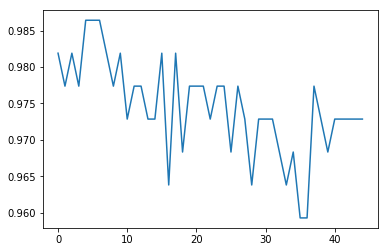

In [6]:
sio.savemat('acc1_2.mat',{'nsr1':nsr,'acc1_2':acc1_2})
print (ratio)
plt.plot(acc1_2)

In [4]:
"""
Valve condition classification, four-way
"""
nsr1= np.asarray(list(range(44,50)))*0.0005
nsr2= np.asarray(list(range(1,41)))*0.025
#nsr3= np.asarray([0,0.0001])
#nsr=np.concatenate((nsr3,nsr1))
nsr=np.concatenate((nsr1,nsr2))
acc2_2=[]

In [5]:

for ratio in nsr:
    ps2=deepcopy(ps1)
    sss=StratifiedShuffleSplit(test_size=0.1, random_state=40)
    for index in range(ps2.shape[0]):
        ps2[index,:]=(ps2[index,:].reshape(1,-1)+wgn(ps2[index,:], ratio/100)*np.random.randn(1,ps2.shape[1]))

    for train_index,test_index in sss.split(ps2,label1):
        train_ps1=ps2[train_index]
        train_label=label1[train_index]
        test_ps1=ps2[test_index]
        test_label=label1[test_index]
    scaler= preprocessing.StandardScaler().fit(train_ps1)
    train_ps1_norm=scaler.transform(train_ps1)
    test_ps1_norm=scaler.transform(test_ps1)
    train_ps1_norm=np.expand_dims(train_ps1_norm,axis=2)
    test_ps1_norm=np.expand_dims(test_ps1_norm,axis=2)

    input=Input(shape=(6000,1))
    conv1=Conv1D(64,kernel_size=10,strides=5,activation='relu')(input)
    pool1=MaxPool1D(pool_size=2)(conv1)
    conv2=Conv1D(64,kernel_size=2,activation='relu')(pool1)
    pool2=MaxPool1D(pool_size=2)(conv2)
    flat1=Flatten(name='flatten')(pool2)
    dense2=Dense(500,activation='relu')(flat1)
    #dense3=Dropout(0.4)(dense2)
    dense3=Dense(50,activation='relu')(dense2)
    output=Dense(4,activation='softmax',name='result')(dense3)  # change the node in different classificaiton ways
    model=Model(inputs=input,outputs=output)
    model.summary()
    optimizer = optimizers.adam(lr=0.0001,decay=1e-5)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['acc'])
    model.summary()
    hist=model.fit(train_ps1_norm,train_label, epochs=100,validation_data=(test_ps1_norm,test_label),verbose=2)
    acc2_2.append(hist.history['val_acc'][-1])


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 599, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dens

Epoch 55/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0734 - val_acc: 0.9955
Epoch 56/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0734 - val_acc: 0.9955
Epoch 57/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0735 - val_acc: 0.9955
Epoch 58/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0734 - val_acc: 0.9955
Epoch 59/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0734 - val_acc: 0.9955
Epoch 60/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.0734 - val_acc: 0.9955
Epoch 61/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.0734 - val_acc: 0.9955
Epoch 62/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.0733 - val_acc: 0.9955
Epoch 63/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.0733 - val_acc: 0.9955
Epoch 64/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.0733 - val_acc: 0.9955
Epoch 65/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.0733 - val_acc: 0.9955
Epoch 66/100
 - 1s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.073

Epoch 15/100
 - 1s - loss: 0.0163 - acc: 0.9955 - val_loss: 0.0198 - val_acc: 0.9955
Epoch 16/100
 - 1s - loss: 0.0202 - acc: 0.9970 - val_loss: 0.0295 - val_acc: 0.9955
Epoch 17/100
 - 1s - loss: 0.0193 - acc: 0.9934 - val_loss: 0.0114 - val_acc: 0.9955
Epoch 18/100
 - 1s - loss: 0.0227 - acc: 0.9924 - val_loss: 0.0135 - val_acc: 0.9955
Epoch 19/100
 - 1s - loss: 0.0124 - acc: 0.9975 - val_loss: 0.0192 - val_acc: 0.9955
Epoch 20/100
 - 1s - loss: 0.0137 - acc: 0.9975 - val_loss: 0.0497 - val_acc: 0.9910
Epoch 21/100
 - 1s - loss: 0.0156 - acc: 0.9965 - val_loss: 0.0193 - val_acc: 0.9955
Epoch 22/100
 - 1s - loss: 0.0055 - acc: 0.9985 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 23/100
 - 1s - loss: 0.0030 - acc: 0.9995 - val_loss: 0.0102 - val_acc: 0.9955
Epoch 24/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0081 - val_acc: 0.9955
Epoch 25/100
 - 1s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.9955
Epoch 26/100
 - 1s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.009

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 1s - loss: 1.0999 - acc: 0.5514 - val_loss: 0.9196 - val_acc: 0.6290
Epoch 2/100
 - 1s - loss: 0.6439 - acc: 0.7505 - val_loss: 0.4590 - val_acc: 0.8688
Epoch 3/100
 - 1s - loss: 0.3582 - acc: 0.9057 - val_loss: 0.2624 - val_acc: 0.9412
Epoch 4/100
 - 1s - loss: 0.1957 - acc: 0.9703 - val_loss: 0.1873 - val_acc: 0.9548
Epoch 5/100
 - 1s - loss: 0.1182 - acc: 0.9743 - val_loss: 0.1478 - val_acc: 0.9729
Epoch 6/100
 - 1s - loss: 0.1115 - acc: 0.9803 - val_loss: 0.1086 - val_acc: 0.9864
Epoch 7/100
 - 1s - loss: 0.0999 - acc: 0.9869 - val_loss: 0.1244 - val_acc: 0.9864
Epoch 8/100
 - 1s - loss: 0.0821 - acc: 0.9914 - val_loss: 0.1089 - val_acc: 0.9910
Epoch 9/100
 - 1s - loss: 0.0612 - acc: 0.9965 - val_loss: 0.0939 - val_acc: 0.9955
Epoch 10/100
 - 1s - loss: 0.0725 - acc: 0.9894 - val_loss: 0.1385 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0679 - acc: 0.9940 - val_loss: 0.0881 - val_acc: 0.9955
Epoch 12/100
 - 1s - loss: 

Epoch 97/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1462 - val_acc: 0.9910
Epoch 98/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1462 - val_acc: 0.9910
Epoch 99/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1462 - val_acc: 0.9910
Epoch 100/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1462 - val_acc: 0.9910
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 599, 64)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 598, 64)           8256      
_________________________________________________________________

Epoch 57/100
 - 1s - loss: 0.0570 - acc: 0.9965 - val_loss: 0.1146 - val_acc: 0.9910
Epoch 58/100
 - 1s - loss: 0.0570 - acc: 0.9965 - val_loss: 0.1154 - val_acc: 0.9910
Epoch 59/100
 - 1s - loss: 0.0570 - acc: 0.9965 - val_loss: 0.1101 - val_acc: 0.9910
Epoch 60/100
 - 1s - loss: 0.0570 - acc: 0.9965 - val_loss: 0.1115 - val_acc: 0.9910
Epoch 61/100
 - 1s - loss: 0.0570 - acc: 0.9965 - val_loss: 0.1158 - val_acc: 0.9910
Epoch 62/100
 - 1s - loss: 0.0570 - acc: 0.9965 - val_loss: 0.1134 - val_acc: 0.9910
Epoch 63/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1109 - val_acc: 0.9910
Epoch 64/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1105 - val_acc: 0.9910
Epoch 65/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1100 - val_acc: 0.9910
Epoch 66/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1072 - val_acc: 0.9910
Epoch 67/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.1082 - val_acc: 0.9910
Epoch 68/100
 - 1s - loss: 0.0569 - acc: 0.9965 - val_loss: 0.108

Epoch 17/100
 - 1s - loss: 0.0129 - acc: 0.9975 - val_loss: 0.0454 - val_acc: 0.9955
Epoch 18/100
 - 1s - loss: 0.0105 - acc: 0.9995 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 19/100
 - 1s - loss: 0.0191 - acc: 0.9934 - val_loss: 0.0599 - val_acc: 0.9864
Epoch 20/100
 - 1s - loss: 0.0228 - acc: 0.9960 - val_loss: 0.0305 - val_acc: 0.9955
Epoch 21/100
 - 1s - loss: 0.0063 - acc: 0.9995 - val_loss: 0.0111 - val_acc: 0.9955
Epoch 22/100
 - 1s - loss: 0.0357 - acc: 0.9934 - val_loss: 0.1131 - val_acc: 0.9864
Epoch 23/100
 - 1s - loss: 0.0418 - acc: 0.9909 - val_loss: 0.0824 - val_acc: 0.9955
Epoch 24/100
 - 1s - loss: 0.0216 - acc: 0.9980 - val_loss: 0.0771 - val_acc: 0.9955
Epoch 25/100
 - 1s - loss: 0.0175 - acc: 0.9990 - val_loss: 0.0763 - val_acc: 0.9955
Epoch 26/100
 - 1s - loss: 0.0173 - acc: 0.9990 - val_loss: 0.0763 - val_acc: 0.9955
Epoch 27/100
 - 1s - loss: 0.0172 - acc: 0.9990 - val_loss: 0.0752 - val_acc: 0.9955
Epoch 28/100
 - 1s - loss: 0.0171 - acc: 0.9990 - val_loss: 0.075

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 1s - loss: 1.1031 - acc: 0.5323 - val_loss: 0.9272 - val_acc: 0.6154
Epoch 2/100
 - 1s - loss: 0.6519 - acc: 0.7545 - val_loss: 0.4752 - val_acc: 0.8416
Epoch 3/100
 - 1s - loss: 0.3427 - acc: 0.9148 - val_loss: 0.2629 - val_acc: 0.9548
Epoch 4/100
 - 1s - loss: 0.2148 - acc: 0.9496 - val_loss: 0.3938 - val_acc: 0.8914
Epoch 5/100
 - 1s - loss: 0.1798 - acc: 0.9693 - val_loss: 0.1548 - val_acc: 0.9864
Epoch 6/100
 - 1s - loss: 0.0990 - acc: 0.9879 - val_loss: 0.0929 - val_acc: 0.9910
Epoch 7/100
 - 1s - loss: 0.0681 - acc: 0.9884 - val_loss: 0.2197 - val_acc: 0.9502
Epoch 8/100
 - 1s - loss: 0.0587 - acc: 0.9945 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 9/100
 - 1s - loss: 0.0392 - acc: 0.9960 - val_loss: 0.0393 - val_acc: 0.9910
Epoch 10/100
 - 1s - loss: 0.0462 - acc: 0.9924 - val_loss: 0.0463 - val_acc: 0.9910
Epoch 11/100
 - 1s - loss: 0.0507 - acc: 0.9960 - val_loss: 0.0304 - val_acc: 0.9955
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 3.2105e-05 - acc: 1.0000 - val_loss: 8.7963e-04 - val_acc: 1.0000
Epoch 95/100
 - 1s - loss: 3.0446e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 96/100
 - 1s - loss: 3.0013e-05 - acc: 1.0000 - val_loss: 8.6851e-04 - val_acc: 1.0000
Epoch 97/100
 - 1s - loss: 2.8826e-05 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 98/100
 - 1s - loss: 2.7764e-05 - acc: 1.0000 - val_loss: 8.4950e-04 - val_acc: 1.0000
Epoch 99/100
 - 1s - loss: 2.6343e-05 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 100/100
 - 1s - loss: 2.5931e-05 - acc: 1.0000 - val_loss: 8.6462e-04 - val_acc: 1.0000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1199, 64)          704       
______________________________

Epoch 53/100
 - 1s - loss: 2.3093e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 54/100
 - 1s - loss: 2.1491e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 55/100
 - 1s - loss: 2.0939e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 56/100
 - 1s - loss: 1.8999e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 57/100
 - 1s - loss: 1.9024e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 58/100
 - 1s - loss: 1.8591e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 59/100
 - 1s - loss: 1.6997e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 60/100
 - 1s - loss: 1.6573e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 61/100
 - 1s - loss: 1.5420e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 62/100
 - 1s - loss: 1.4822e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 63/100
 - 1s - loss: 1.4137e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 64/100
 - 1s - 

 - 1s - loss: 0.0280 - acc: 0.9965 - val_loss: 0.0419 - val_acc: 0.9910
Epoch 13/100
 - 1s - loss: 0.0204 - acc: 0.9980 - val_loss: 0.0455 - val_acc: 0.9955
Epoch 14/100
 - 1s - loss: 0.0139 - acc: 0.9990 - val_loss: 0.0262 - val_acc: 0.9955
Epoch 15/100
 - 1s - loss: 0.0533 - acc: 0.9894 - val_loss: 0.1126 - val_acc: 0.9864
Epoch 16/100
 - 1s - loss: 0.0458 - acc: 0.9945 - val_loss: 0.0613 - val_acc: 0.9955
Epoch 17/100
 - 1s - loss: 0.0181 - acc: 0.9965 - val_loss: 0.0556 - val_acc: 0.9864
Epoch 18/100
 - 1s - loss: 0.0123 - acc: 0.9980 - val_loss: 0.0226 - val_acc: 0.9955
Epoch 19/100
 - 1s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0298 - val_acc: 0.9955
Epoch 20/100
 - 1s - loss: 0.0122 - acc: 0.9985 - val_loss: 0.0575 - val_acc: 0.9864
Epoch 21/100
 - 1s - loss: 0.1005 - acc: 0.9728 - val_loss: 0.2461 - val_acc: 0.9186
Epoch 22/100
 - 1s - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0536 - val_acc: 0.9864
Epoch 23/100
 - 1s - loss: 0.0065 - acc: 0.9990 - val_loss: 0.0336 - val_acc: 

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 1s - loss: 1.1026 - acc: 0.5257 - val_loss: 0.9291 - val_acc: 0.6516
Epoch 2/100
 - 1s - loss: 0.6667 - acc: 0.7581 - val_loss: 0.5295 - val_acc: 0.8009
Epoch 3/100
 - 1s - loss: 0.3688 - acc: 0.8967 - val_loss: 0.2876 - val_acc: 0.9457
Epoch 4/100
 - 1s - loss: 0.2395 - acc: 0.9531 - val_loss: 0.2133 - val_acc: 0.9548
Epoch 5/100
 - 1s - loss: 0.1329 - acc: 0.9713 - val_loss: 0.1278 - val_acc: 0.9774
Epoch 6/100
 - 1s - loss: 0.1289 - acc: 0.9738 - val_loss: 0.1231 - val_acc: 0.9683
Epoch 7/100
 - 1s - loss: 0.0615 - acc: 0.9874 - val_loss: 0.0968 - val_acc: 0.9729
Epoch 8/100
 - 1s - loss: 0.0744 - acc: 0.9834 - val_loss: 0.1272 - val_acc: 0.9910
Epoch 9/100
 - 1s - loss: 0.1182 - acc: 0.9652 - val_loss: 0.1123 - val_acc: 0.9593
Epoch 10/100
 - 1s - loss: 0.0445 - acc: 0.9909 - val_loss: 0.0957 - val_acc: 0.9683
Epoch 11/100
 - 1s - loss: 0.0459 - acc: 0.9919 - val_loss: 0.1626 - val_acc: 0.9683
Epoch 12/100
 - 1s - loss: 

Epoch 94/100
 - 1s - loss: 3.7561e-05 - acc: 1.0000 - val_loss: 0.0195 - val_acc: 0.9864
Epoch 95/100
 - 1s - loss: 3.2682e-05 - acc: 1.0000 - val_loss: 0.0167 - val_acc: 0.9910
Epoch 96/100
 - 1s - loss: 3.1385e-05 - acc: 1.0000 - val_loss: 0.0151 - val_acc: 0.9910
Epoch 97/100
 - 1s - loss: 3.1338e-05 - acc: 1.0000 - val_loss: 0.0167 - val_acc: 0.9910
Epoch 98/100
 - 1s - loss: 3.0118e-05 - acc: 1.0000 - val_loss: 0.0199 - val_acc: 0.9910
Epoch 99/100
 - 1s - loss: 3.0362e-05 - acc: 1.0000 - val_loss: 0.0186 - val_acc: 0.9910
Epoch 100/100
 - 1s - loss: 2.7400e-05 - acc: 1.0000 - val_loss: 0.0180 - val_acc: 0.9910
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 1199, 64)          704       
______________________________________________

Epoch 54/100
 - 1s - loss: 0.0409 - acc: 0.9975 - val_loss: 0.0787 - val_acc: 0.9955
Epoch 55/100
 - 1s - loss: 0.0409 - acc: 0.9975 - val_loss: 0.0798 - val_acc: 0.9910
Epoch 56/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0819 - val_acc: 0.9910
Epoch 57/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0797 - val_acc: 0.9910
Epoch 58/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0815 - val_acc: 0.9910
Epoch 59/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0810 - val_acc: 0.9910
Epoch 60/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0794 - val_acc: 0.9910
Epoch 61/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0792 - val_acc: 0.9910
Epoch 62/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0798 - val_acc: 0.9910
Epoch 63/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0819 - val_acc: 0.9910
Epoch 64/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.0813 - val_acc: 0.9910
Epoch 65/100
 - 1s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.078

Epoch 14/100
 - 1s - loss: 0.0163 - acc: 0.9980 - val_loss: 0.0474 - val_acc: 0.9774
Epoch 15/100
 - 1s - loss: 0.0125 - acc: 0.9980 - val_loss: 0.0438 - val_acc: 0.9774
Epoch 16/100
 - 1s - loss: 0.0097 - acc: 0.9995 - val_loss: 0.0529 - val_acc: 0.9864
Epoch 17/100
 - 1s - loss: 0.0221 - acc: 0.9924 - val_loss: 0.0416 - val_acc: 0.9864
Epoch 18/100
 - 1s - loss: 0.0102 - acc: 0.9990 - val_loss: 0.0378 - val_acc: 0.9864
Epoch 19/100
 - 1s - loss: 0.0131 - acc: 0.9965 - val_loss: 0.0318 - val_acc: 0.9910
Epoch 20/100
 - 1s - loss: 0.0191 - acc: 0.9975 - val_loss: 0.0275 - val_acc: 0.9955
Epoch 21/100
 - 1s - loss: 0.0058 - acc: 0.9995 - val_loss: 0.0594 - val_acc: 0.9910
Epoch 22/100
 - 1s - loss: 0.0043 - acc: 0.9995 - val_loss: 0.0341 - val_acc: 0.9955
Epoch 23/100
 - 1s - loss: 0.0058 - acc: 0.9990 - val_loss: 0.0305 - val_acc: 0.9910
Epoch 24/100
 - 1s - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0257 - val_acc: 0.9955
Epoch 25/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.029

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.1764 - acc: 0.5202 - val_loss: 1.0581 - val_acc: 0.5566
Epoch 2/100
 - 1s - loss: 0.8230 - acc: 0.7046 - val_loss: 0.6776 - val_acc: 0.7014
Epoch 3/100
 - 1s - loss: 0.4595 - acc: 0.8493 - val_loss: 0.4086 - val_acc: 0.8688
Epoch 4/100
 - 1s - loss: 0.2788 - acc: 0.9330 - val_loss: 0.3049 - val_acc: 0.8778
Epoch 5/100
 - 1s - loss: 0.1690 - acc: 0.9657 - val_loss: 0.2033 - val_acc: 0.9412
Epoch 6/100
 - 1s - loss: 0.1215 - acc: 0.9783 - val_loss: 0.1830 - val_acc: 0.9412
Epoch 7/100
 - 1s - loss: 0.1084 - acc: 0.9743 - val_loss: 0.1950 - val_acc: 0.9548
Epoch 8/100
 - 1s - loss: 0.0991 - acc: 0.9783 - val_loss: 0.2544 - val_acc: 0.9321
Epoch 9/100
 - 1s - loss: 0.0702 - acc: 0.9884 - val_loss: 0.1846 - val_acc: 0.9729
Epoch 10/100
 - 1s - loss: 0.0540 - acc: 0.9924 - val_loss: 0.1399 - val_acc: 0.9819
Epoch 11/100
 - 1s - loss: 0.0483 - acc: 0.9945 - val_loss: 0.2207 - val_acc: 0.9502
Epoch 12/100
 - 1s - loss: 

 - 1s - loss: 4.9318e-05 - acc: 1.0000 - val_loss: 0.0403 - val_acc: 0.9910
Epoch 95/100
 - 1s - loss: 4.7158e-05 - acc: 1.0000 - val_loss: 0.0420 - val_acc: 0.9864
Epoch 96/100
 - 1s - loss: 4.5941e-05 - acc: 1.0000 - val_loss: 0.0377 - val_acc: 0.9864
Epoch 97/100
 - 1s - loss: 4.4760e-05 - acc: 1.0000 - val_loss: 0.0409 - val_acc: 0.9910
Epoch 98/100
 - 1s - loss: 4.2019e-05 - acc: 1.0000 - val_loss: 0.0389 - val_acc: 0.9910
Epoch 99/100
 - 1s - loss: 4.0868e-05 - acc: 1.0000 - val_loss: 0.0386 - val_acc: 0.9910
Epoch 100/100
 - 1s - loss: 3.9409e-05 - acc: 1.0000 - val_loss: 0.0392 - val_acc: 0.9864
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1199, 64)          704       
___________________________________________________________

Epoch 54/100
 - 1s - loss: 0.0168 - acc: 0.9990 - val_loss: 0.0933 - val_acc: 0.9864
Epoch 55/100
 - 1s - loss: 0.0167 - acc: 0.9990 - val_loss: 0.0947 - val_acc: 0.9864
Epoch 56/100
 - 1s - loss: 0.0167 - acc: 0.9990 - val_loss: 0.0943 - val_acc: 0.9864
Epoch 57/100
 - 1s - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0962 - val_acc: 0.9864
Epoch 58/100
 - 1s - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0946 - val_acc: 0.9864
Epoch 59/100
 - 1s - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0979 - val_acc: 0.9864
Epoch 60/100
 - 1s - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0981 - val_acc: 0.9864
Epoch 61/100
 - 1s - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0919 - val_acc: 0.9864
Epoch 62/100
 - 1s - loss: 0.0166 - acc: 0.9990 - val_loss: 0.0945 - val_acc: 0.9864
Epoch 63/100
 - 1s - loss: 0.0165 - acc: 0.9990 - val_loss: 0.0920 - val_acc: 0.9864
Epoch 64/100
 - 1s - loss: 0.0165 - acc: 0.9990 - val_loss: 0.0934 - val_acc: 0.9864
Epoch 65/100
 - 1s - loss: 0.0165 - acc: 0.9990 - val_loss: 0.095

Epoch 14/100
 - 1s - loss: 0.0316 - acc: 0.9929 - val_loss: 0.0772 - val_acc: 0.9774
Epoch 15/100
 - 1s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0653 - val_acc: 0.9819
Epoch 16/100
 - 1s - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9774
Epoch 17/100
 - 1s - loss: 0.0078 - acc: 0.9990 - val_loss: 0.1165 - val_acc: 0.9457
Epoch 18/100
 - 1s - loss: 0.0863 - acc: 0.9783 - val_loss: 0.1380 - val_acc: 0.9729
Epoch 19/100
 - 1s - loss: 0.0408 - acc: 0.9884 - val_loss: 0.0928 - val_acc: 0.9774
Epoch 20/100
 - 1s - loss: 0.0104 - acc: 0.9980 - val_loss: 0.1380 - val_acc: 0.9593
Epoch 21/100
 - 1s - loss: 0.0132 - acc: 0.9965 - val_loss: 0.0651 - val_acc: 0.9729
Epoch 22/100
 - 1s - loss: 0.0191 - acc: 0.9960 - val_loss: 0.0973 - val_acc: 0.9683
Epoch 23/100
 - 1s - loss: 0.0061 - acc: 0.9990 - val_loss: 0.0785 - val_acc: 0.9774
Epoch 24/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9819
Epoch 25/100
 - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.063

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.1853 - acc: 0.5111 - val_loss: 1.1333 - val_acc: 0.5249
Epoch 2/100
 - 1s - loss: 0.8722 - acc: 0.6603 - val_loss: 0.7412 - val_acc: 0.6697
Epoch 3/100
 - 1s - loss: 0.5256 - acc: 0.8115 - val_loss: 0.5225 - val_acc: 0.7919
Epoch 4/100
 - 1s - loss: 0.3215 - acc: 0.9224 - val_loss: 0.2902 - val_acc: 0.9548
Epoch 5/100
 - 1s - loss: 0.2095 - acc: 0.9577 - val_loss: 0.2457 - val_acc: 0.9321
Epoch 6/100
 - 1s - loss: 0.1161 - acc: 0.9849 - val_loss: 0.1658 - val_acc: 0.9548
Epoch 7/100
 - 1s - loss: 0.1122 - acc: 0.9758 - val_loss: 0.3645 - val_acc: 0.9005
Epoch 8/100
 - 1s - loss: 0.0870 - acc: 0.9814 - val_loss: 0.1472 - val_acc: 0.9502
Epoch 9/100
 - 1s - loss: 0.1249 - acc: 0.9567 - val_loss: 0.0977 - val_acc: 0.9683
Epoch 10/100
 - 1s - loss: 0.0519 - acc: 0.9899 - val_loss: 0.0979 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0433 - acc: 0.9919 - val_loss: 0.1147 - val_acc: 0.9638
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 7.8119e-05 - acc: 1.0000 - val_loss: 0.0775 - val_acc: 0.9683
Epoch 96/100
 - 1s - loss: 7.3574e-05 - acc: 1.0000 - val_loss: 0.0828 - val_acc: 0.9683
Epoch 97/100
 - 1s - loss: 7.7796e-05 - acc: 1.0000 - val_loss: 0.0858 - val_acc: 0.9638
Epoch 98/100
 - 1s - loss: 6.6941e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9683
Epoch 99/100
 - 1s - loss: 7.6498e-05 - acc: 1.0000 - val_loss: 0.0834 - val_acc: 0.9683
Epoch 100/100
 - 1s - loss: 6.5507e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9638
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 599, 64)           0         
___

Epoch 54/100
 - 1s - loss: 2.8277e-04 - acc: 1.0000 - val_loss: 0.0882 - val_acc: 0.9683
Epoch 55/100
 - 1s - loss: 2.6676e-04 - acc: 1.0000 - val_loss: 0.0888 - val_acc: 0.9683
Epoch 56/100
 - 1s - loss: 2.5626e-04 - acc: 1.0000 - val_loss: 0.0885 - val_acc: 0.9683
Epoch 57/100
 - 1s - loss: 2.4285e-04 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9683
Epoch 58/100
 - 1s - loss: 2.3271e-04 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 0.9683
Epoch 59/100
 - 1s - loss: 2.2361e-04 - acc: 1.0000 - val_loss: 0.0898 - val_acc: 0.9683
Epoch 60/100
 - 1s - loss: 2.1205e-04 - acc: 1.0000 - val_loss: 0.0907 - val_acc: 0.9683
Epoch 61/100
 - 1s - loss: 2.0306e-04 - acc: 1.0000 - val_loss: 0.0900 - val_acc: 0.9683
Epoch 62/100
 - 1s - loss: 1.9296e-04 - acc: 1.0000 - val_loss: 0.0944 - val_acc: 0.9638
Epoch 63/100
 - 1s - loss: 1.8299e-04 - acc: 1.0000 - val_loss: 0.0896 - val_acc: 0.9683
Epoch 64/100
 - 1s - loss: 1.7384e-04 - acc: 1.0000 - val_loss: 0.0926 - val_acc: 0.9683
Epoch 65/100
 - 1s - 

Epoch 12/100
 - 1s - loss: 0.0330 - acc: 0.9955 - val_loss: 0.1000 - val_acc: 0.9638
Epoch 13/100
 - 1s - loss: 0.0456 - acc: 0.9864 - val_loss: 0.1168 - val_acc: 0.9593
Epoch 14/100
 - 1s - loss: 0.0260 - acc: 0.9985 - val_loss: 0.1545 - val_acc: 0.9457
Epoch 15/100
 - 1s - loss: 0.0204 - acc: 0.9990 - val_loss: 0.0779 - val_acc: 0.9683
Epoch 16/100
 - 1s - loss: 0.0141 - acc: 0.9995 - val_loss: 0.0787 - val_acc: 0.9864
Epoch 17/100
 - 1s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9729
Epoch 18/100
 - 1s - loss: 0.0145 - acc: 0.9985 - val_loss: 0.0741 - val_acc: 0.9638
Epoch 19/100
 - 1s - loss: 0.0181 - acc: 0.9970 - val_loss: 0.0585 - val_acc: 0.9819
Epoch 20/100
 - 1s - loss: 0.0087 - acc: 0.9995 - val_loss: 0.0763 - val_acc: 0.9683
Epoch 21/100
 - 1s - loss: 0.0126 - acc: 0.9970 - val_loss: 0.0717 - val_acc: 0.9819
Epoch 22/100
 - 1s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0614 - val_acc: 0.9864
Epoch 23/100
 - 1s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.070

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.1965 - acc: 0.5111 - val_loss: 1.1492 - val_acc: 0.5294
Epoch 2/100
 - 1s - loss: 0.8942 - acc: 0.6542 - val_loss: 0.7032 - val_acc: 0.7376
Epoch 3/100
 - 1s - loss: 0.5481 - acc: 0.8024 - val_loss: 0.5483 - val_acc: 0.7376
Epoch 4/100
 - 1s - loss: 0.3638 - acc: 0.8977 - val_loss: 0.3949 - val_acc: 0.8597
Epoch 5/100
 - 1s - loss: 0.2244 - acc: 0.9592 - val_loss: 0.2345 - val_acc: 0.9412
Epoch 6/100
 - 1s - loss: 0.1668 - acc: 0.9597 - val_loss: 0.2559 - val_acc: 0.9231
Epoch 7/100
 - 1s - loss: 0.1019 - acc: 0.9829 - val_loss: 0.1750 - val_acc: 0.9321
Epoch 8/100
 - 1s - loss: 0.0686 - acc: 0.9934 - val_loss: 0.1550 - val_acc: 0.9593
Epoch 9/100
 - 1s - loss: 0.0476 - acc: 0.9980 - val_loss: 0.0923 - val_acc: 0.9774
Epoch 10/100
 - 1s - loss: 0.0482 - acc: 0.9914 - val_loss: 0.1143 - val_acc: 0.9638
Epoch 11/100
 - 1s - loss: 0.0277 - acc: 0.9980 - val_loss: 0.1042 - val_acc: 0.9593
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 5.2874e-05 - acc: 1.0000 - val_loss: 0.0539 - val_acc: 0.9729
Epoch 96/100
 - 1s - loss: 5.1496e-05 - acc: 1.0000 - val_loss: 0.0519 - val_acc: 0.9729
Epoch 97/100
 - 1s - loss: 4.9832e-05 - acc: 1.0000 - val_loss: 0.0498 - val_acc: 0.9729
Epoch 98/100
 - 1s - loss: 4.7618e-05 - acc: 1.0000 - val_loss: 0.0505 - val_acc: 0.9729
Epoch 99/100
 - 1s - loss: 4.6116e-05 - acc: 1.0000 - val_loss: 0.0538 - val_acc: 0.9729
Epoch 100/100
 - 1s - loss: 4.3497e-05 - acc: 1.0000 - val_loss: 0.0542 - val_acc: 0.9729
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 599, 64)           0         
___

Epoch 54/100
 - 1s - loss: 3.5075e-04 - acc: 1.0000 - val_loss: 0.0880 - val_acc: 0.9864
Epoch 55/100
 - 1s - loss: 3.4132e-04 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 0.9864
Epoch 56/100
 - 1s - loss: 3.1575e-04 - acc: 1.0000 - val_loss: 0.0870 - val_acc: 0.9864
Epoch 57/100
 - 1s - loss: 3.1345e-04 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 0.9864
Epoch 58/100
 - 1s - loss: 2.9635e-04 - acc: 1.0000 - val_loss: 0.0886 - val_acc: 0.9864
Epoch 59/100
 - 1s - loss: 2.7232e-04 - acc: 1.0000 - val_loss: 0.0894 - val_acc: 0.9864
Epoch 60/100
 - 1s - loss: 2.6037e-04 - acc: 1.0000 - val_loss: 0.0863 - val_acc: 0.9864
Epoch 61/100
 - 1s - loss: 2.5049e-04 - acc: 1.0000 - val_loss: 0.0874 - val_acc: 0.9864
Epoch 62/100
 - 1s - loss: 2.3801e-04 - acc: 1.0000 - val_loss: 0.0877 - val_acc: 0.9864
Epoch 63/100
 - 1s - loss: 2.2527e-04 - acc: 1.0000 - val_loss: 0.0887 - val_acc: 0.9864
Epoch 64/100
 - 1s - loss: 2.2051e-04 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 0.9864
Epoch 65/100
 - 1s - 

Epoch 12/100
 - 1s - loss: 0.0252 - acc: 0.9975 - val_loss: 0.1440 - val_acc: 0.9457
Epoch 13/100
 - 1s - loss: 0.0297 - acc: 0.9950 - val_loss: 0.1095 - val_acc: 0.9729
Epoch 14/100
 - 1s - loss: 0.0160 - acc: 0.9985 - val_loss: 0.1074 - val_acc: 0.9638
Epoch 15/100
 - 1s - loss: 0.0148 - acc: 0.9980 - val_loss: 0.1050 - val_acc: 0.9638
Epoch 16/100
 - 1s - loss: 0.0410 - acc: 0.9869 - val_loss: 0.2411 - val_acc: 0.9457
Epoch 17/100
 - 1s - loss: 0.0675 - acc: 0.9788 - val_loss: 0.2844 - val_acc: 0.8869
Epoch 18/100
 - 1s - loss: 0.0288 - acc: 0.9929 - val_loss: 0.2035 - val_acc: 0.9367
Epoch 19/100
 - 1s - loss: 0.0120 - acc: 0.9990 - val_loss: 0.1395 - val_acc: 0.9548
Epoch 20/100
 - 1s - loss: 0.0166 - acc: 0.9955 - val_loss: 0.1267 - val_acc: 0.9548
Epoch 21/100
 - 1s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.1290 - val_acc: 0.9593
Epoch 22/100
 - 1s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.1060 - val_acc: 0.9683
Epoch 23/100
 - 1s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.107

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.1803 - acc: 0.5050 - val_loss: 1.0782 - val_acc: 0.5204
Epoch 2/100
 - 1s - loss: 0.8642 - acc: 0.6411 - val_loss: 0.7548 - val_acc: 0.7602
Epoch 3/100
 - 1s - loss: 0.5546 - acc: 0.8140 - val_loss: 0.4588 - val_acc: 0.8597
Epoch 4/100
 - 1s - loss: 0.3474 - acc: 0.9042 - val_loss: 0.3245 - val_acc: 0.9005
Epoch 5/100
 - 1s - loss: 0.2565 - acc: 0.9335 - val_loss: 0.3146 - val_acc: 0.8914
Epoch 6/100
 - 1s - loss: 0.1988 - acc: 0.9486 - val_loss: 0.2261 - val_acc: 0.9321
Epoch 7/100
 - 1s - loss: 0.1448 - acc: 0.9662 - val_loss: 0.1712 - val_acc: 0.9457
Epoch 8/100
 - 1s - loss: 0.0960 - acc: 0.9819 - val_loss: 0.1637 - val_acc: 0.9502
Epoch 9/100
 - 1s - loss: 0.0836 - acc: 0.9803 - val_loss: 0.1778 - val_acc: 0.9502
Epoch 10/100
 - 1s - loss: 0.0647 - acc: 0.9894 - val_loss: 0.1030 - val_acc: 0.9774
Epoch 11/100
 - 1s - loss: 0.0515 - acc: 0.9899 - val_loss: 0.1246 - val_acc: 0.9729
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 8.0273e-05 - acc: 1.0000 - val_loss: 0.0752 - val_acc: 0.9774
Epoch 96/100
 - 1s - loss: 7.7633e-05 - acc: 1.0000 - val_loss: 0.0786 - val_acc: 0.9774
Epoch 97/100
 - 1s - loss: 7.3812e-05 - acc: 1.0000 - val_loss: 0.0755 - val_acc: 0.9774
Epoch 98/100
 - 1s - loss: 7.0689e-05 - acc: 1.0000 - val_loss: 0.0748 - val_acc: 0.9774
Epoch 99/100
 - 1s - loss: 6.7226e-05 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9774
Epoch 100/100
 - 1s - loss: 6.4423e-05 - acc: 1.0000 - val_loss: 0.0752 - val_acc: 0.9774
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 599, 64)           0         
___

Epoch 54/100
 - 1s - loss: 2.8740e-04 - acc: 1.0000 - val_loss: 0.0589 - val_acc: 0.9819
Epoch 55/100
 - 1s - loss: 2.6761e-04 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 0.9683
Epoch 56/100
 - 1s - loss: 2.5514e-04 - acc: 1.0000 - val_loss: 0.0593 - val_acc: 0.9774
Epoch 57/100
 - 1s - loss: 2.4086e-04 - acc: 1.0000 - val_loss: 0.0563 - val_acc: 0.9819
Epoch 58/100
 - 1s - loss: 2.3556e-04 - acc: 1.0000 - val_loss: 0.0609 - val_acc: 0.9819
Epoch 59/100
 - 1s - loss: 2.0943e-04 - acc: 1.0000 - val_loss: 0.0557 - val_acc: 0.9819
Epoch 60/100
 - 1s - loss: 2.0092e-04 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0.9729
Epoch 61/100
 - 1s - loss: 1.9372e-04 - acc: 1.0000 - val_loss: 0.0686 - val_acc: 0.9683
Epoch 62/100
 - 1s - loss: 1.7778e-04 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 0.9819
Epoch 63/100
 - 1s - loss: 1.7446e-04 - acc: 1.0000 - val_loss: 0.0655 - val_acc: 0.9729
Epoch 64/100
 - 1s - loss: 1.6366e-04 - acc: 1.0000 - val_loss: 0.0595 - val_acc: 0.9819
Epoch 65/100
 - 1s - 

Epoch 12/100
 - 1s - loss: 0.0233 - acc: 0.9970 - val_loss: 0.1410 - val_acc: 0.9502
Epoch 13/100
 - 1s - loss: 0.0232 - acc: 0.9955 - val_loss: 0.1215 - val_acc: 0.9548
Epoch 14/100
 - 1s - loss: 0.0136 - acc: 1.0000 - val_loss: 0.1139 - val_acc: 0.9548
Epoch 15/100
 - 1s - loss: 0.0083 - acc: 1.0000 - val_loss: 0.1185 - val_acc: 0.9593
Epoch 16/100
 - 1s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.1211 - val_acc: 0.9593
Epoch 17/100
 - 1s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.1272 - val_acc: 0.9593
Epoch 18/100
 - 1s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.1054 - val_acc: 0.9638
Epoch 19/100
 - 1s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9593
Epoch 20/100
 - 1s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0994 - val_acc: 0.9593
Epoch 21/100
 - 1s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.1209 - val_acc: 0.9593
Epoch 22/100
 - 1s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0996 - val_acc: 0.9638
Epoch 23/100
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.133

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.2196 - acc: 0.5010 - val_loss: 1.1894 - val_acc: 0.5113
Epoch 2/100
 - 1s - loss: 1.0127 - acc: 0.5786 - val_loss: 0.9001 - val_acc: 0.5837
Epoch 3/100
 - 1s - loss: 0.6609 - acc: 0.7429 - val_loss: 0.6016 - val_acc: 0.7873
Epoch 4/100
 - 1s - loss: 0.3891 - acc: 0.9199 - val_loss: 0.4600 - val_acc: 0.8281
Epoch 5/100
 - 1s - loss: 0.3103 - acc: 0.9083 - val_loss: 0.4069 - val_acc: 0.7964
Epoch 6/100
 - 1s - loss: 0.1871 - acc: 0.9637 - val_loss: 0.3327 - val_acc: 0.8869
Epoch 7/100
 - 1s - loss: 0.1532 - acc: 0.9693 - val_loss: 0.2839 - val_acc: 0.9005
Epoch 8/100
 - 1s - loss: 0.1073 - acc: 0.9859 - val_loss: 0.2669 - val_acc: 0.9005
Epoch 9/100
 - 1s - loss: 0.1746 - acc: 0.9617 - val_loss: 0.2828 - val_acc: 0.8778
Epoch 10/100
 - 1s - loss: 0.0583 - acc: 0.9970 - val_loss: 0.2891 - val_acc: 0.9005
Epoch 11/100
 - 1s - loss: 0.0471 - acc: 0.9960 - val_loss: 0.2281 - val_acc: 0.9186
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 4.8768e-05 - acc: 1.0000 - val_loss: 0.2418 - val_acc: 0.9231
Epoch 96/100
 - 1s - loss: 4.7011e-05 - acc: 1.0000 - val_loss: 0.2399 - val_acc: 0.9231
Epoch 97/100
 - 1s - loss: 4.5017e-05 - acc: 1.0000 - val_loss: 0.2377 - val_acc: 0.9231
Epoch 98/100
 - 1s - loss: 4.2758e-05 - acc: 1.0000 - val_loss: 0.2427 - val_acc: 0.9276
Epoch 99/100
 - 1s - loss: 4.0845e-05 - acc: 1.0000 - val_loss: 0.2366 - val_acc: 0.9276
Epoch 100/100
 - 1s - loss: 3.9315e-05 - acc: 1.0000 - val_loss: 0.2442 - val_acc: 0.9276
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 599, 64)           0         
___

Epoch 55/100
 - 1s - loss: 4.8068e-04 - acc: 1.0000 - val_loss: 0.2154 - val_acc: 0.9412
Epoch 56/100
 - 1s - loss: 4.4391e-04 - acc: 1.0000 - val_loss: 0.2127 - val_acc: 0.9457
Epoch 57/100
 - 1s - loss: 4.2578e-04 - acc: 1.0000 - val_loss: 0.2123 - val_acc: 0.9412
Epoch 58/100
 - 1s - loss: 3.8674e-04 - acc: 1.0000 - val_loss: 0.2259 - val_acc: 0.9412
Epoch 59/100
 - 1s - loss: 3.6877e-04 - acc: 1.0000 - val_loss: 0.2114 - val_acc: 0.9457
Epoch 60/100
 - 1s - loss: 3.5175e-04 - acc: 1.0000 - val_loss: 0.2209 - val_acc: 0.9457
Epoch 61/100
 - 1s - loss: 3.4121e-04 - acc: 1.0000 - val_loss: 0.2073 - val_acc: 0.9457
Epoch 62/100
 - 1s - loss: 3.1954e-04 - acc: 1.0000 - val_loss: 0.2135 - val_acc: 0.9412
Epoch 63/100
 - 1s - loss: 3.1713e-04 - acc: 1.0000 - val_loss: 0.2209 - val_acc: 0.9457
Epoch 64/100
 - 1s - loss: 2.9315e-04 - acc: 1.0000 - val_loss: 0.2215 - val_acc: 0.9412
Epoch 65/100
 - 1s - loss: 2.7085e-04 - acc: 1.0000 - val_loss: 0.2230 - val_acc: 0.9457
Epoch 66/100
 - 1s - 

Epoch 13/100
 - 1s - loss: 0.0167 - acc: 1.0000 - val_loss: 0.1703 - val_acc: 0.9548
Epoch 14/100
 - 1s - loss: 0.0175 - acc: 0.9975 - val_loss: 0.2175 - val_acc: 0.9502
Epoch 15/100
 - 1s - loss: 0.0124 - acc: 0.9995 - val_loss: 0.1403 - val_acc: 0.9593
Epoch 16/100
 - 1s - loss: 0.0089 - acc: 1.0000 - val_loss: 0.1256 - val_acc: 0.9683
Epoch 17/100
 - 1s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.1453 - val_acc: 0.9593
Epoch 18/100
 - 1s - loss: 0.0063 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9593
Epoch 19/100
 - 1s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.1403 - val_acc: 0.9593
Epoch 20/100
 - 1s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.1300 - val_acc: 0.9638
Epoch 21/100
 - 1s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9593
Epoch 22/100
 - 1s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.1418 - val_acc: 0.9548
Epoch 23/100
 - 1s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.1310 - val_acc: 0.9683
Epoch 24/100
 - 1s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.142

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.2135 - acc: 0.5136 - val_loss: 1.1301 - val_acc: 0.5204
Epoch 2/100
 - 1s - loss: 0.9596 - acc: 0.6064 - val_loss: 0.8320 - val_acc: 0.5837
Epoch 3/100
 - 1s - loss: 0.6187 - acc: 0.7838 - val_loss: 0.5321 - val_acc: 0.8416
Epoch 4/100
 - 1s - loss: 0.3666 - acc: 0.8982 - val_loss: 0.4081 - val_acc: 0.8733
Epoch 5/100
 - 1s - loss: 0.2342 - acc: 0.9481 - val_loss: 0.3257 - val_acc: 0.9050
Epoch 6/100
 - 1s - loss: 0.1530 - acc: 0.9748 - val_loss: 0.5206 - val_acc: 0.9005
Epoch 7/100
 - 1s - loss: 0.1342 - acc: 0.9743 - val_loss: 0.2456 - val_acc: 0.9231
Epoch 8/100
 - 1s - loss: 0.0821 - acc: 0.9864 - val_loss: 0.2262 - val_acc: 0.9140
Epoch 9/100
 - 1s - loss: 0.0643 - acc: 0.9894 - val_loss: 0.1824 - val_acc: 0.9321
Epoch 10/100
 - 1s - loss: 0.0370 - acc: 0.9980 - val_loss: 0.1675 - val_acc: 0.9457
Epoch 11/100
 - 1s - loss: 0.0400 - acc: 0.9934 - val_loss: 0.2517 - val_acc: 0.9050
Epoch 12/100
 - 1s - loss: 

 - 1s - loss: 4.1526e-05 - acc: 1.0000 - val_loss: 0.1364 - val_acc: 0.9593
Epoch 95/100
 - 1s - loss: 3.9169e-05 - acc: 1.0000 - val_loss: 0.1333 - val_acc: 0.9548
Epoch 96/100
 - 1s - loss: 3.7742e-05 - acc: 1.0000 - val_loss: 0.1323 - val_acc: 0.9548
Epoch 97/100
 - 1s - loss: 3.5985e-05 - acc: 1.0000 - val_loss: 0.1296 - val_acc: 0.9548
Epoch 98/100
 - 1s - loss: 3.4300e-05 - acc: 1.0000 - val_loss: 0.1427 - val_acc: 0.9548
Epoch 99/100
 - 1s - loss: 3.2794e-05 - acc: 1.0000 - val_loss: 0.1392 - val_acc: 0.9593
Epoch 100/100
 - 1s - loss: 3.1614e-05 - acc: 1.0000 - val_loss: 0.1393 - val_acc: 0.9502
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 1199, 64)          704       
___________________________________________________________

Epoch 54/100
 - 1s - loss: 4.3720e-04 - acc: 1.0000 - val_loss: 0.1430 - val_acc: 0.9593
Epoch 55/100
 - 1s - loss: 3.7332e-04 - acc: 1.0000 - val_loss: 0.1442 - val_acc: 0.9548
Epoch 56/100
 - 1s - loss: 3.5483e-04 - acc: 1.0000 - val_loss: 0.1531 - val_acc: 0.9502
Epoch 57/100
 - 1s - loss: 3.4042e-04 - acc: 1.0000 - val_loss: 0.1519 - val_acc: 0.9502
Epoch 58/100
 - 1s - loss: 3.2243e-04 - acc: 1.0000 - val_loss: 0.1462 - val_acc: 0.9502
Epoch 59/100
 - 1s - loss: 3.0653e-04 - acc: 1.0000 - val_loss: 0.1463 - val_acc: 0.9502
Epoch 60/100
 - 1s - loss: 2.9509e-04 - acc: 1.0000 - val_loss: 0.1416 - val_acc: 0.9548
Epoch 61/100
 - 1s - loss: 2.8162e-04 - acc: 1.0000 - val_loss: 0.1483 - val_acc: 0.9457
Epoch 62/100
 - 1s - loss: 2.6626e-04 - acc: 1.0000 - val_loss: 0.1534 - val_acc: 0.9593
Epoch 63/100
 - 1s - loss: 2.6748e-04 - acc: 1.0000 - val_loss: 0.1494 - val_acc: 0.9502
Epoch 64/100
 - 1s - loss: 2.4088e-04 - acc: 1.0000 - val_loss: 0.1529 - val_acc: 0.9502
Epoch 65/100
 - 1s - 

Epoch 12/100
 - 1s - loss: 0.0346 - acc: 0.9960 - val_loss: 0.2141 - val_acc: 0.9095
Epoch 13/100
 - 1s - loss: 0.0313 - acc: 0.9955 - val_loss: 0.2904 - val_acc: 0.8733
Epoch 14/100
 - 1s - loss: 0.0303 - acc: 0.9965 - val_loss: 0.2540 - val_acc: 0.9276
Epoch 15/100
 - 1s - loss: 0.0362 - acc: 0.9889 - val_loss: 0.3066 - val_acc: 0.8733
Epoch 16/100
 - 1s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.1695 - val_acc: 0.9367
Epoch 17/100
 - 1s - loss: 0.0073 - acc: 1.0000 - val_loss: 0.1729 - val_acc: 0.9321
Epoch 18/100
 - 1s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.1535 - val_acc: 0.9502
Epoch 19/100
 - 1s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.1788 - val_acc: 0.9412
Epoch 20/100
 - 1s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.1642 - val_acc: 0.9367
Epoch 21/100
 - 1s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.1566 - val_acc: 0.9457
Epoch 22/100
 - 1s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1675 - val_acc: 0.9412
Epoch 23/100
 - 1s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.160

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 2s - loss: 1.2169 - acc: 0.5000 - val_loss: 1.1667 - val_acc: 0.5113
Epoch 2/100
 - 1s - loss: 1.0134 - acc: 0.5570 - val_loss: 0.9462 - val_acc: 0.5882
Epoch 3/100
 - 1s - loss: 0.6695 - acc: 0.7636 - val_loss: 0.6888 - val_acc: 0.7557
Epoch 4/100
 - 1s - loss: 0.3911 - acc: 0.8881 - val_loss: 0.4703 - val_acc: 0.8190
Epoch 5/100
 - 1s - loss: 0.2552 - acc: 0.9340 - val_loss: 0.3341 - val_acc: 0.8869
Epoch 6/100
 - 1s - loss: 0.1624 - acc: 0.9718 - val_loss: 0.2799 - val_acc: 0.9050
Epoch 7/100
 - 1s - loss: 0.1058 - acc: 0.9844 - val_loss: 0.2562 - val_acc: 0.9005
Epoch 8/100
 - 1s - loss: 0.0933 - acc: 0.9864 - val_loss: 0.3194 - val_acc: 0.8778
Epoch 9/100
 - 1s - loss: 0.0511 - acc: 0.9965 - val_loss: 0.2263 - val_acc: 0.9186
Epoch 10/100
 - 1s - loss: 0.0401 - acc: 0.9960 - val_loss: 0.3546 - val_acc: 0.8778
Epoch 11/100
 - 1s - loss: 0.0403 - acc: 0.9955 - val_loss: 0.3194 - val_acc: 0.8778
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 7.4342e-05 - acc: 1.0000 - val_loss: 0.2594 - val_acc: 0.9276
Epoch 96/100
 - 1s - loss: 7.0914e-05 - acc: 1.0000 - val_loss: 0.2588 - val_acc: 0.9276
Epoch 97/100
 - 1s - loss: 6.7568e-05 - acc: 1.0000 - val_loss: 0.2633 - val_acc: 0.9276
Epoch 98/100
 - 1s - loss: 6.6164e-05 - acc: 1.0000 - val_loss: 0.2534 - val_acc: 0.9276
Epoch 99/100
 - 1s - loss: 6.2765e-05 - acc: 1.0000 - val_loss: 0.2591 - val_acc: 0.9276
Epoch 100/100
 - 1s - loss: 6.0493e-05 - acc: 1.0000 - val_loss: 0.2413 - val_acc: 0.9276
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 599, 64)           0         
___

Epoch 55/100
 - 1s - loss: 5.9770e-04 - acc: 1.0000 - val_loss: 0.1890 - val_acc: 0.9502
Epoch 56/100
 - 1s - loss: 5.5879e-04 - acc: 1.0000 - val_loss: 0.1951 - val_acc: 0.9457
Epoch 57/100
 - 1s - loss: 5.3172e-04 - acc: 1.0000 - val_loss: 0.1976 - val_acc: 0.9367
Epoch 58/100
 - 1s - loss: 6.2315e-04 - acc: 1.0000 - val_loss: 0.1907 - val_acc: 0.9457
Epoch 59/100
 - 1s - loss: 4.7922e-04 - acc: 1.0000 - val_loss: 0.2047 - val_acc: 0.9367
Epoch 60/100
 - 1s - loss: 4.6466e-04 - acc: 1.0000 - val_loss: 0.2052 - val_acc: 0.9367
Epoch 61/100
 - 1s - loss: 4.1608e-04 - acc: 1.0000 - val_loss: 0.1965 - val_acc: 0.9502
Epoch 62/100
 - 1s - loss: 3.9763e-04 - acc: 1.0000 - val_loss: 0.1990 - val_acc: 0.9412
Epoch 63/100
 - 1s - loss: 4.2478e-04 - acc: 1.0000 - val_loss: 0.1972 - val_acc: 0.9457
Epoch 64/100
 - 1s - loss: 3.5594e-04 - acc: 1.0000 - val_loss: 0.1993 - val_acc: 0.9457
Epoch 65/100
 - 1s - loss: 3.3204e-04 - acc: 1.0000 - val_loss: 0.2019 - val_acc: 0.9457
Epoch 66/100
 - 1s - 

Epoch 13/100
 - 1s - loss: 0.0440 - acc: 0.9934 - val_loss: 0.2848 - val_acc: 0.8869
Epoch 14/100
 - 1s - loss: 0.0415 - acc: 0.9919 - val_loss: 0.2386 - val_acc: 0.9095
Epoch 15/100
 - 1s - loss: 0.0297 - acc: 0.9960 - val_loss: 0.2570 - val_acc: 0.9050
Epoch 16/100
 - 1s - loss: 0.0279 - acc: 0.9980 - val_loss: 0.2294 - val_acc: 0.9095
Epoch 17/100
 - 1s - loss: 0.0318 - acc: 0.9940 - val_loss: 0.2751 - val_acc: 0.9095
Epoch 18/100
 - 1s - loss: 0.0209 - acc: 1.0000 - val_loss: 0.2349 - val_acc: 0.9140
Epoch 19/100
 - 1s - loss: 0.0108 - acc: 1.0000 - val_loss: 0.2338 - val_acc: 0.9140
Epoch 20/100
 - 1s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.2148 - val_acc: 0.9186
Epoch 21/100
 - 1s - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2064 - val_acc: 0.9140
Epoch 22/100
 - 1s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.2191 - val_acc: 0.9186
Epoch 23/100
 - 1s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.2419 - val_acc: 0.9140
Epoch 24/100
 - 1s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.255

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 1.2077 - acc: 0.5091 - val_loss: 1.1315 - val_acc: 0.5158
Epoch 2/100
 - 1s - loss: 0.9725 - acc: 0.5907 - val_loss: 0.8458 - val_acc: 0.7376
Epoch 3/100
 - 1s - loss: 0.5904 - acc: 0.7742 - val_loss: 0.5566 - val_acc: 0.8235
Epoch 4/100
 - 1s - loss: 0.3772 - acc: 0.8972 - val_loss: 0.6152 - val_acc: 0.7964
Epoch 5/100
 - 1s - loss: 0.2473 - acc: 0.9521 - val_loss: 0.3774 - val_acc: 0.8462
Epoch 6/100
 - 1s - loss: 0.1541 - acc: 0.9758 - val_loss: 0.3584 - val_acc: 0.8778
Epoch 7/100
 - 1s - loss: 0.1474 - acc: 0.9667 - val_loss: 0.3332 - val_acc: 0.8869
Epoch 8/100
 - 1s - loss: 0.0948 - acc: 0.9884 - val_loss: 0.3310 - val_acc: 0.8733
Epoch 9/100
 - 1s - loss: 0.0559 - acc: 0.9980 - val_loss: 0.2624 - val_acc: 0.8959
Epoch 10/100
 - 1s - loss: 0.0428 - acc: 0.9975 - val_loss: 0.2835 - val_acc: 0.8824
Epoch 11/100
 - 1s - loss: 0.0465 - acc: 0.9914 - val_loss: 0.3488 - val_acc: 0.8824
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 5.0129e-05 - acc: 1.0000 - val_loss: 0.3571 - val_acc: 0.9140
Epoch 96/100
 - 1s - loss: 4.8385e-05 - acc: 1.0000 - val_loss: 0.3585 - val_acc: 0.9005
Epoch 97/100
 - 1s - loss: 4.6728e-05 - acc: 1.0000 - val_loss: 0.3600 - val_acc: 0.9050
Epoch 98/100
 - 1s - loss: 4.4877e-05 - acc: 1.0000 - val_loss: 0.3600 - val_acc: 0.9005
Epoch 99/100
 - 1s - loss: 4.2777e-05 - acc: 1.0000 - val_loss: 0.3740 - val_acc: 0.8959
Epoch 100/100
 - 1s - loss: 4.1219e-05 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.9050
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_67 (MaxPooling (None, 599, 64)           0         
___

Epoch 54/100
 - 1s - loss: 3.9859e-04 - acc: 1.0000 - val_loss: 0.2593 - val_acc: 0.9140
Epoch 55/100
 - 1s - loss: 3.6810e-04 - acc: 1.0000 - val_loss: 0.2626 - val_acc: 0.9095
Epoch 56/100
 - 1s - loss: 3.4319e-04 - acc: 1.0000 - val_loss: 0.2631 - val_acc: 0.9050
Epoch 57/100
 - 1s - loss: 3.1435e-04 - acc: 1.0000 - val_loss: 0.2635 - val_acc: 0.9050
Epoch 58/100
 - 1s - loss: 3.1266e-04 - acc: 1.0000 - val_loss: 0.2667 - val_acc: 0.9050
Epoch 59/100
 - 1s - loss: 2.8294e-04 - acc: 1.0000 - val_loss: 0.2635 - val_acc: 0.9095
Epoch 60/100
 - 1s - loss: 2.7253e-04 - acc: 1.0000 - val_loss: 0.2735 - val_acc: 0.9095
Epoch 61/100
 - 1s - loss: 2.5437e-04 - acc: 1.0000 - val_loss: 0.2677 - val_acc: 0.9140
Epoch 62/100
 - 1s - loss: 2.4634e-04 - acc: 1.0000 - val_loss: 0.2753 - val_acc: 0.9095
Epoch 63/100
 - 1s - loss: 2.2833e-04 - acc: 1.0000 - val_loss: 0.2669 - val_acc: 0.9095
Epoch 64/100
 - 1s - loss: 2.1676e-04 - acc: 1.0000 - val_loss: 0.2785 - val_acc: 0.9140
Epoch 65/100
 - 1s - 

Epoch 12/100
 - 1s - loss: 0.0392 - acc: 0.9975 - val_loss: 0.2226 - val_acc: 0.9050
Epoch 13/100
 - 1s - loss: 0.0323 - acc: 0.9965 - val_loss: 0.2226 - val_acc: 0.9005
Epoch 14/100
 - 1s - loss: 0.0210 - acc: 0.9995 - val_loss: 0.2246 - val_acc: 0.8914
Epoch 15/100
 - 1s - loss: 0.0157 - acc: 1.0000 - val_loss: 0.2118 - val_acc: 0.9005
Epoch 16/100
 - 1s - loss: 0.0143 - acc: 1.0000 - val_loss: 0.1858 - val_acc: 0.9140
Epoch 17/100
 - 1s - loss: 0.0109 - acc: 1.0000 - val_loss: 0.2176 - val_acc: 0.9050
Epoch 18/100
 - 1s - loss: 0.0112 - acc: 1.0000 - val_loss: 0.2067 - val_acc: 0.9095
Epoch 19/100
 - 1s - loss: 0.0074 - acc: 1.0000 - val_loss: 0.1952 - val_acc: 0.9231
Epoch 20/100
 - 1s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.2032 - val_acc: 0.9095
Epoch 21/100
 - 1s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.2070 - val_acc: 0.8959
Epoch 22/100
 - 1s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.2223 - val_acc: 0.8914
Epoch 23/100
 - 1s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.202

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dense_71 (Dense)             (None, 500)               9568500   
__________

Epoch 78/100
 - 1s - loss: 1.8375e-04 - acc: 1.0000 - val_loss: 0.2245 - val_acc: 0.9140
Epoch 79/100
 - 1s - loss: 1.7793e-04 - acc: 1.0000 - val_loss: 0.2226 - val_acc: 0.9186
Epoch 80/100
 - 1s - loss: 1.6812e-04 - acc: 1.0000 - val_loss: 0.2203 - val_acc: 0.9186
Epoch 81/100
 - 1s - loss: 1.6931e-04 - acc: 1.0000 - val_loss: 0.2146 - val_acc: 0.9276
Epoch 82/100
 - 1s - loss: 1.6237e-04 - acc: 1.0000 - val_loss: 0.2251 - val_acc: 0.9186
Epoch 83/100
 - 1s - loss: 1.4629e-04 - acc: 1.0000 - val_loss: 0.2181 - val_acc: 0.9186
Epoch 84/100
 - 1s - loss: 1.3993e-04 - acc: 1.0000 - val_loss: 0.2253 - val_acc: 0.9186
Epoch 85/100
 - 1s - loss: 1.3525e-04 - acc: 1.0000 - val_loss: 0.2206 - val_acc: 0.9231
Epoch 86/100
 - 1s - loss: 1.3233e-04 - acc: 1.0000 - val_loss: 0.2316 - val_acc: 0.9186
Epoch 87/100
 - 1s - loss: 1.2358e-04 - acc: 1.0000 - val_loss: 0.2330 - val_acc: 0.9186
Epoch 88/100
 - 1s - loss: 1.1776e-04 - acc: 1.0000 - val_loss: 0.2191 - val_acc: 0.9231
Epoch 89/100
 - 1s - 

Epoch 37/100
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3484 - val_acc: 0.8597
Epoch 38/100
 - 1s - loss: 9.9430e-04 - acc: 1.0000 - val_loss: 0.3576 - val_acc: 0.8688
Epoch 39/100
 - 1s - loss: 9.2869e-04 - acc: 1.0000 - val_loss: 0.3523 - val_acc: 0.8643
Epoch 40/100
 - 1s - loss: 8.6708e-04 - acc: 1.0000 - val_loss: 0.3492 - val_acc: 0.8643
Epoch 41/100
 - 1s - loss: 8.0052e-04 - acc: 1.0000 - val_loss: 0.3498 - val_acc: 0.8597
Epoch 42/100
 - 1s - loss: 7.6049e-04 - acc: 1.0000 - val_loss: 0.3560 - val_acc: 0.8597
Epoch 43/100
 - 1s - loss: 7.1297e-04 - acc: 1.0000 - val_loss: 0.3600 - val_acc: 0.8597
Epoch 44/100
 - 1s - loss: 6.5599e-04 - acc: 1.0000 - val_loss: 0.3591 - val_acc: 0.8643
Epoch 45/100
 - 1s - loss: 6.1685e-04 - acc: 1.0000 - val_loss: 0.3572 - val_acc: 0.8643
Epoch 46/100
 - 1s - loss: 5.8536e-04 - acc: 1.0000 - val_loss: 0.3636 - val_acc: 0.8597
Epoch 47/100
 - 1s - loss: 5.4772e-04 - acc: 1.0000 - val_loss: 0.3589 - val_acc: 0.8597
Epoch 48/100
 - 1s - loss

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 1.2285 - acc: 0.5035 - val_loss: 1.1776 - val_acc: 0.5204
Epoch 2/100
 - 1s - loss: 1.0490 - acc: 0.5444 - val_loss: 0.9712 - val_acc: 0.6968
Epoch 3/100
 - 1s - loss: 0.7479 - acc: 0.7218 - val_loss: 0.7047 - val_acc: 0.7557
Epoch 4/100
 - 1s - loss: 0.4996 - acc: 0.8584 - val_loss: 0.5405 - val_acc: 0.7873
Epoch 5/100
 - 1s - loss: 0.3112 - acc: 0.9148 - val_loss: 0.3950 - val_acc: 0.8507
Epoch 6/100
 - 1s - loss: 0.2010 - acc: 0.9526 - val_loss: 0.3442 - val_acc: 0.8733
Epoch 7/100
 - 1s - loss: 0.1294 - acc: 0.9839 - val_loss: 0.2938 - val_acc: 0.8869
Epoch 8/100
 - 1s - loss: 0.0911 - acc: 0.9874 - val_loss: 0.2603 - val_acc: 0.8959
Epoch 9/100
 - 1s - loss: 0.0724 - acc: 0.9904 - val_loss: 0.2406 - val_acc: 0.9231
Epoch 10/100
 - 1s - loss: 0.0703 - acc: 0.9829 - val_loss: 0.3423 - val_acc: 0.8824
Epoch 11/100
 - 1s - loss: 0.0698 - acc: 0.9884 - val_loss: 0.2789 - val_acc: 0.8959
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 6.0642e-05 - acc: 1.0000 - val_loss: 0.3064 - val_acc: 0.9231
Epoch 96/100
 - 1s - loss: 5.8105e-05 - acc: 1.0000 - val_loss: 0.3148 - val_acc: 0.9276
Epoch 97/100
 - 1s - loss: 5.6170e-05 - acc: 1.0000 - val_loss: 0.3234 - val_acc: 0.9231
Epoch 98/100
 - 1s - loss: 5.5390e-05 - acc: 1.0000 - val_loss: 0.3176 - val_acc: 0.9231
Epoch 99/100
 - 1s - loss: 5.1879e-05 - acc: 1.0000 - val_loss: 0.3378 - val_acc: 0.9186
Epoch 100/100
 - 1s - loss: 4.9621e-05 - acc: 1.0000 - val_loss: 0.3205 - val_acc: 0.9231
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None, 599, 64)           0         
___

 - 1s - loss: 4.7594e-04 - acc: 1.0000 - val_loss: 0.3666 - val_acc: 0.8914
Epoch 55/100
 - 1s - loss: 4.5035e-04 - acc: 1.0000 - val_loss: 0.3717 - val_acc: 0.8869
Epoch 56/100
 - 1s - loss: 4.3351e-04 - acc: 1.0000 - val_loss: 0.3854 - val_acc: 0.8824
Epoch 57/100
 - 1s - loss: 4.0258e-04 - acc: 1.0000 - val_loss: 0.3750 - val_acc: 0.9005
Epoch 58/100
 - 1s - loss: 3.8414e-04 - acc: 1.0000 - val_loss: 0.3639 - val_acc: 0.9050
Epoch 59/100
 - 1s - loss: 3.6760e-04 - acc: 1.0000 - val_loss: 0.3785 - val_acc: 0.8914
Epoch 60/100
 - 1s - loss: 3.4879e-04 - acc: 1.0000 - val_loss: 0.3714 - val_acc: 0.8959
Epoch 61/100
 - 1s - loss: 3.3023e-04 - acc: 1.0000 - val_loss: 0.3812 - val_acc: 0.8869
Epoch 62/100
 - 1s - loss: 3.1696e-04 - acc: 1.0000 - val_loss: 0.3797 - val_acc: 0.8959
Epoch 63/100
 - 1s - loss: 3.0381e-04 - acc: 1.0000 - val_loss: 0.3772 - val_acc: 0.9005
Epoch 64/100
 - 1s - loss: 2.8314e-04 - acc: 1.0000 - val_loss: 0.3764 - val_acc: 0.9005
Epoch 65/100
 - 1s - loss: 2.6953e

Epoch 12/100
 - 1s - loss: 0.0352 - acc: 0.9970 - val_loss: 0.4267 - val_acc: 0.8462
Epoch 13/100
 - 1s - loss: 0.0340 - acc: 0.9955 - val_loss: 0.3528 - val_acc: 0.8597
Epoch 14/100
 - 1s - loss: 0.0191 - acc: 1.0000 - val_loss: 0.3703 - val_acc: 0.8643
Epoch 15/100
 - 1s - loss: 0.0154 - acc: 1.0000 - val_loss: 0.3501 - val_acc: 0.8688
Epoch 16/100
 - 1s - loss: 0.0125 - acc: 1.0000 - val_loss: 0.3547 - val_acc: 0.8643
Epoch 17/100
 - 1s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.3734 - val_acc: 0.8688
Epoch 18/100
 - 1s - loss: 0.0151 - acc: 0.9980 - val_loss: 0.4811 - val_acc: 0.8462
Epoch 19/100
 - 1s - loss: 0.0510 - acc: 0.9819 - val_loss: 0.3952 - val_acc: 0.8552
Epoch 20/100
 - 1s - loss: 0.0383 - acc: 0.9919 - val_loss: 0.4089 - val_acc: 0.8597
Epoch 21/100
 - 1s - loss: 0.0081 - acc: 1.0000 - val_loss: 0.3765 - val_acc: 0.8688
Epoch 22/100
 - 1s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.3830 - val_acc: 0.8688
Epoch 23/100
 - 1s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.373

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 1.2201 - acc: 0.5025 - val_loss: 1.1947 - val_acc: 0.4932
Epoch 2/100
 - 1s - loss: 1.1038 - acc: 0.5333 - val_loss: 1.0535 - val_acc: 0.6290
Epoch 3/100
 - 1s - loss: 0.8520 - acc: 0.6794 - val_loss: 0.7221 - val_acc: 0.7692
Epoch 4/100
 - 1s - loss: 0.5450 - acc: 0.8024 - val_loss: 0.5207 - val_acc: 0.7964
Epoch 5/100
 - 1s - loss: 0.3897 - acc: 0.8861 - val_loss: 0.4392 - val_acc: 0.8145
Epoch 6/100
 - 1s - loss: 0.2919 - acc: 0.9173 - val_loss: 0.3599 - val_acc: 0.8914
Epoch 7/100
 - 1s - loss: 0.2028 - acc: 0.9561 - val_loss: 0.3124 - val_acc: 0.8824
Epoch 8/100
 - 1s - loss: 0.1372 - acc: 0.9768 - val_loss: 0.3263 - val_acc: 0.8552
Epoch 9/100
 - 1s - loss: 0.1110 - acc: 0.9844 - val_loss: 0.3109 - val_acc: 0.8733
Epoch 10/100
 - 1s - loss: 0.0855 - acc: 0.9854 - val_loss: 0.2894 - val_acc: 0.8733
Epoch 11/100
 - 1s - loss: 0.0749 - acc: 0.9884 - val_loss: 0.2877 - val_acc: 0.8959
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 6.1791e-05 - acc: 1.0000 - val_loss: 0.4159 - val_acc: 0.9005
Epoch 96/100
 - 1s - loss: 5.8715e-05 - acc: 1.0000 - val_loss: 0.4187 - val_acc: 0.9005
Epoch 97/100
 - 1s - loss: 5.5668e-05 - acc: 1.0000 - val_loss: 0.4163 - val_acc: 0.9050
Epoch 98/100
 - 1s - loss: 5.3734e-05 - acc: 1.0000 - val_loss: 0.4246 - val_acc: 0.9050
Epoch 99/100
 - 1s - loss: 5.0974e-05 - acc: 1.0000 - val_loss: 0.4231 - val_acc: 0.9005
Epoch 100/100
 - 1s - loss: 4.9577e-05 - acc: 1.0000 - val_loss: 0.4273 - val_acc: 0.9050
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 599, 64)           0         
___

Epoch 55/100
 - 1s - loss: 6.0557e-04 - acc: 1.0000 - val_loss: 0.4969 - val_acc: 0.8824
Epoch 56/100
 - 1s - loss: 5.7470e-04 - acc: 1.0000 - val_loss: 0.5055 - val_acc: 0.8778
Epoch 57/100
 - 1s - loss: 5.2713e-04 - acc: 1.0000 - val_loss: 0.5168 - val_acc: 0.8778
Epoch 58/100
 - 1s - loss: 5.0689e-04 - acc: 1.0000 - val_loss: 0.5181 - val_acc: 0.8778
Epoch 59/100
 - 1s - loss: 4.7639e-04 - acc: 1.0000 - val_loss: 0.5090 - val_acc: 0.8778
Epoch 60/100
 - 1s - loss: 4.4363e-04 - acc: 1.0000 - val_loss: 0.5211 - val_acc: 0.8778
Epoch 61/100
 - 1s - loss: 4.1856e-04 - acc: 1.0000 - val_loss: 0.5255 - val_acc: 0.8733
Epoch 62/100
 - 1s - loss: 4.0535e-04 - acc: 1.0000 - val_loss: 0.5193 - val_acc: 0.8778
Epoch 63/100
 - 1s - loss: 3.7506e-04 - acc: 1.0000 - val_loss: 0.5206 - val_acc: 0.8778
Epoch 64/100
 - 1s - loss: 3.5765e-04 - acc: 1.0000 - val_loss: 0.5219 - val_acc: 0.8778
Epoch 65/100
 - 1s - loss: 3.4699e-04 - acc: 1.0000 - val_loss: 0.5321 - val_acc: 0.8778
Epoch 66/100
 - 1s - 

Epoch 13/100
 - 1s - loss: 0.0305 - acc: 0.9975 - val_loss: 0.3489 - val_acc: 0.8643
Epoch 14/100
 - 1s - loss: 0.0314 - acc: 0.9965 - val_loss: 0.4012 - val_acc: 0.8416
Epoch 15/100
 - 1s - loss: 0.0336 - acc: 0.9970 - val_loss: 0.3834 - val_acc: 0.8733
Epoch 16/100
 - 1s - loss: 0.0180 - acc: 1.0000 - val_loss: 0.3700 - val_acc: 0.8733
Epoch 17/100
 - 1s - loss: 0.0149 - acc: 0.9995 - val_loss: 0.3920 - val_acc: 0.8778
Epoch 18/100
 - 1s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.4228 - val_acc: 0.8733
Epoch 19/100
 - 1s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.4003 - val_acc: 0.8597
Epoch 20/100
 - 1s - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4256 - val_acc: 0.8643
Epoch 21/100
 - 1s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.3969 - val_acc: 0.8688
Epoch 22/100
 - 1s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.4081 - val_acc: 0.8688
Epoch 23/100
 - 1s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.4372 - val_acc: 0.8597
Epoch 24/100
 - 1s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.429

Train on 1984 samples, validate on 221 samples
Epoch 1/100
 - 3s - loss: 1.2310 - acc: 0.5091 - val_loss: 1.1918 - val_acc: 0.5158
Epoch 2/100
 - 1s - loss: 1.1019 - acc: 0.5333 - val_loss: 1.0374 - val_acc: 0.5113
Epoch 3/100
 - 1s - loss: 0.7755 - acc: 0.7238 - val_loss: 0.7698 - val_acc: 0.6290
Epoch 4/100
 - 1s - loss: 0.4891 - acc: 0.8271 - val_loss: 0.5316 - val_acc: 0.8190
Epoch 5/100
 - 1s - loss: 0.3311 - acc: 0.9042 - val_loss: 0.4225 - val_acc: 0.8235
Epoch 6/100
 - 1s - loss: 0.2418 - acc: 0.9345 - val_loss: 0.3954 - val_acc: 0.8371
Epoch 7/100
 - 1s - loss: 0.1985 - acc: 0.9420 - val_loss: 0.3332 - val_acc: 0.8643
Epoch 8/100
 - 1s - loss: 0.1376 - acc: 0.9688 - val_loss: 0.3363 - val_acc: 0.8326
Epoch 9/100
 - 1s - loss: 0.1192 - acc: 0.9733 - val_loss: 0.3055 - val_acc: 0.8733
Epoch 10/100
 - 1s - loss: 0.0909 - acc: 0.9829 - val_loss: 0.3875 - val_acc: 0.8416
Epoch 11/100
 - 1s - loss: 0.0930 - acc: 0.9783 - val_loss: 0.2985 - val_acc: 0.8688
Epoch 12/100
 - 1s - loss: 

Epoch 95/100
 - 1s - loss: 8.6983e-05 - acc: 1.0000 - val_loss: 0.4564 - val_acc: 0.8824
Epoch 96/100
 - 1s - loss: 8.2911e-05 - acc: 1.0000 - val_loss: 0.4610 - val_acc: 0.8778
Epoch 97/100
 - 1s - loss: 7.9926e-05 - acc: 1.0000 - val_loss: 0.4578 - val_acc: 0.8824
Epoch 98/100
 - 1s - loss: 7.5644e-05 - acc: 1.0000 - val_loss: 0.4556 - val_acc: 0.8824
Epoch 99/100
 - 1s - loss: 7.4312e-05 - acc: 1.0000 - val_loss: 0.4587 - val_acc: 0.8869
Epoch 100/100
 - 1s - loss: 6.9853e-05 - acc: 1.0000 - val_loss: 0.4586 - val_acc: 0.8869
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 599, 64)           0         
___

Epoch 54/100
 - 1s - loss: 2.7864e-04 - acc: 1.0000 - val_loss: 0.3707 - val_acc: 0.8733
Epoch 55/100
 - 1s - loss: 2.5856e-04 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.8733
Epoch 56/100
 - 1s - loss: 2.4556e-04 - acc: 1.0000 - val_loss: 0.3738 - val_acc: 0.8733
Epoch 57/100
 - 1s - loss: 2.3580e-04 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.8688
Epoch 58/100
 - 1s - loss: 2.1972e-04 - acc: 1.0000 - val_loss: 0.3528 - val_acc: 0.8643
Epoch 59/100
 - 1s - loss: 2.1094e-04 - acc: 1.0000 - val_loss: 0.3631 - val_acc: 0.8688
Epoch 60/100
 - 1s - loss: 1.9947e-04 - acc: 1.0000 - val_loss: 0.3715 - val_acc: 0.8507
Epoch 61/100
 - 1s - loss: 1.9235e-04 - acc: 1.0000 - val_loss: 0.3681 - val_acc: 0.8688
Epoch 62/100
 - 1s - loss: 1.8060e-04 - acc: 1.0000 - val_loss: 0.3538 - val_acc: 0.8643
Epoch 63/100
 - 1s - loss: 1.7041e-04 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.8688
Epoch 64/100
 - 1s - loss: 1.6384e-04 - acc: 1.0000 - val_loss: 0.3789 - val_acc: 0.8688
Epoch 65/100
 - 1s - 

Epoch 12/100
 - 1s - loss: 0.0472 - acc: 0.9960 - val_loss: 0.3403 - val_acc: 0.8552
Epoch 13/100
 - 1s - loss: 0.0541 - acc: 0.9914 - val_loss: 0.3725 - val_acc: 0.8552
Epoch 14/100
 - 1s - loss: 0.0394 - acc: 0.9945 - val_loss: 0.3271 - val_acc: 0.8688
Epoch 15/100
 - 1s - loss: 0.0215 - acc: 0.9995 - val_loss: 0.2956 - val_acc: 0.8688
Epoch 16/100
 - 1s - loss: 0.0187 - acc: 0.9995 - val_loss: 0.2989 - val_acc: 0.8778
Epoch 17/100
 - 1s - loss: 0.0142 - acc: 1.0000 - val_loss: 0.3088 - val_acc: 0.8597
Epoch 18/100
 - 1s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.3040 - val_acc: 0.8824
Epoch 19/100
 - 1s - loss: 0.0103 - acc: 1.0000 - val_loss: 0.2999 - val_acc: 0.8688
Epoch 20/100
 - 1s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.3299 - val_acc: 0.8507
Epoch 21/100
 - 1s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.3108 - val_acc: 0.8824
Epoch 22/100
 - 1s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.3085 - val_acc: 0.8869
Epoch 23/100
 - 1s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.333

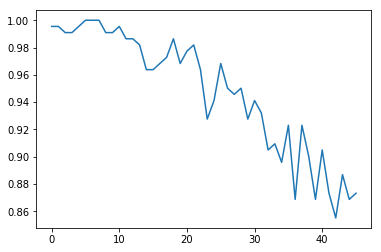

In [7]:
#sio.savemat('acc2_2.mat',{'nsr2':nsr,'acc2':acc2_2})
plt.plot(acc2_2)

In [4]:
"""
Internal pump leakage classification, three-way 
"""
nsr1= np.asarray(list(range(45,50)))*0.0005
nsr2= np.asarray(list(range(1,41)))*0.025
#nsr3= np.asarray([0,0.0001])
#nsr=np.concatenate((nsr3,nsr1))
nsr=np.concatenate((nsr1,nsr2))
acc3_2=[]

In [5]:
for ratio in nsr:
    ps2=deepcopy(ps1)
    sss=StratifiedShuffleSplit(test_size=0.1, random_state=40)
    for index in range(ps2.shape[0]):
        ps2[index,:]=(ps2[index,:].reshape(1,-1)+wgn(ps2[index,:], ratio/100)*np.random.randn(1,ps2.shape[1]))

    for train_index,test_index in sss.split(ps2,label2):
        train_ps1=ps2[train_index]
        train_label=label2[train_index]
        test_ps1=ps2[test_index]
        test_label=label2[test_index]
    scaler= preprocessing.StandardScaler().fit(train_ps1)
    train_ps1_norm=scaler.transform(train_ps1)
    test_ps1_norm=scaler.transform(test_ps1)
    train_ps1_norm=np.expand_dims(train_ps1_norm,axis=2)
    test_ps1_norm=np.expand_dims(test_ps1_norm,axis=2)

    input=Input(shape=(6000,1))
    conv1=Conv1D(64,kernel_size=10,strides=5,activation='relu')(input)
    pool1=MaxPool1D(pool_size=2)(conv1)
    conv2=Conv1D(64,kernel_size=2,activation='relu')(pool1)
    pool2=MaxPool1D(pool_size=2)(conv2)
    flat1=Flatten(name='flatten')(pool2)
    dense2=Dense(500,activation='relu')(flat1)
    #dense3=Dropout(0.4)(dense2)
    dense3=Dense(50,activation='relu')(dense2)
    output=Dense(3,activation='softmax',name='result')(dense3)  # change the node in different classificaiton ways
    model=Model(inputs=input,outputs=output)
    model.summary()
    optimizer = optimizers.adam(lr=0.001,decay=1e-5)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['acc'])
    model.summary()
    hist=model.fit(train_ps1_norm,train_label, epochs=50,validation_data=(test_ps1_norm,test_label),verbose=2)
    acc3_2.append(hist.history['val_acc'][-1])
#plt.plot(nsr,acc3)
#sio.savemat('acc3.mat',{'nsr3':nsr,'acc3':acc3})

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 599, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dens

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 1s - loss: 1.0224 - acc: 0.5776 - val_loss: 0.9068 - val_acc: 0.6018
Epoch 2/50
 - 1s - loss: 0.8481 - acc: 0.6038 - val_loss: 0.8209 - val_acc: 0.6063
Epoch 3/50
 - 1s - loss: 0.6462 - acc: 0.7213 - val_loss: 0.7138 - val_acc: 0.6561
Epoch 4/50
 - 1s - loss: 0.3878 - acc: 0.8548 - val_loss: 0.7446 - val_acc: 0.6561
Epoch 5/50
 - 1s - loss: 0.1755 - acc: 0.9471 - val_loss: 0.8775 - val_acc: 0.6697
Epoch 6/50
 - 1s - loss: 0.0670 - acc: 0.9839 - val_loss: 0.8005 - val_acc: 0.6380
Epoch 7/50
 - 1s - loss: 0.0277 - acc: 0.9940 - val_loss: 0.9057 - val_acc: 0.6742
Epoch 8/50
 - 1s - loss: 0.0085 - acc: 0.9990 - val_loss: 0.9377 - val_acc: 0.6833
Epoch 9/50
 - 1s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.9553 - val_acc: 0.6742
Epoch 10/50
 - 1s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.9599 - val_acc: 0.6516
Epoch 11/50
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9837 - val_acc: 0.6652
Epoch 12/50
 - 1s - loss: 8.0717e-04 -

Epoch 10/50
 - 1s - loss: 7.9091e-04 - acc: 1.0000 - val_loss: 1.0113 - val_acc: 0.7104
Epoch 11/50
 - 1s - loss: 6.0037e-04 - acc: 1.0000 - val_loss: 1.0468 - val_acc: 0.7104
Epoch 12/50
 - 1s - loss: 4.7942e-04 - acc: 1.0000 - val_loss: 1.0687 - val_acc: 0.7104
Epoch 13/50
 - 1s - loss: 4.0533e-04 - acc: 1.0000 - val_loss: 1.0656 - val_acc: 0.7149
Epoch 14/50
 - 1s - loss: 3.3320e-04 - acc: 1.0000 - val_loss: 1.0842 - val_acc: 0.7149
Epoch 15/50
 - 1s - loss: 2.7681e-04 - acc: 1.0000 - val_loss: 1.1083 - val_acc: 0.7104
Epoch 16/50
 - 1s - loss: 2.3558e-04 - acc: 1.0000 - val_loss: 1.1113 - val_acc: 0.7104
Epoch 17/50
 - 1s - loss: 2.0478e-04 - acc: 1.0000 - val_loss: 1.1239 - val_acc: 0.7104
Epoch 18/50
 - 1s - loss: 1.8013e-04 - acc: 1.0000 - val_loss: 1.1352 - val_acc: 0.7149
Epoch 19/50
 - 1s - loss: 1.6054e-04 - acc: 1.0000 - val_loss: 1.1565 - val_acc: 0.7014
Epoch 20/50
 - 1s - loss: 1.4486e-04 - acc: 1.0000 - val_loss: 1.1471 - val_acc: 0.7059
Epoch 21/50
 - 1s - loss: 1.2969

Epoch 19/50
 - 1s - loss: 2.2238e-04 - acc: 1.0000 - val_loss: 1.4531 - val_acc: 0.6697
Epoch 20/50
 - 1s - loss: 1.9639e-04 - acc: 1.0000 - val_loss: 1.4381 - val_acc: 0.6742
Epoch 21/50
 - 1s - loss: 1.7803e-04 - acc: 1.0000 - val_loss: 1.4569 - val_acc: 0.6742
Epoch 22/50
 - 1s - loss: 1.5715e-04 - acc: 1.0000 - val_loss: 1.4642 - val_acc: 0.6742
Epoch 23/50
 - 1s - loss: 1.4305e-04 - acc: 1.0000 - val_loss: 1.4742 - val_acc: 0.6742
Epoch 24/50
 - 1s - loss: 1.2931e-04 - acc: 1.0000 - val_loss: 1.4993 - val_acc: 0.6742
Epoch 25/50
 - 1s - loss: 1.1805e-04 - acc: 1.0000 - val_loss: 1.5029 - val_acc: 0.6742
Epoch 26/50
 - 1s - loss: 1.0726e-04 - acc: 1.0000 - val_loss: 1.5052 - val_acc: 0.6742
Epoch 27/50
 - 1s - loss: 9.8593e-05 - acc: 1.0000 - val_loss: 1.5190 - val_acc: 0.6742
Epoch 28/50
 - 1s - loss: 9.0452e-05 - acc: 1.0000 - val_loss: 1.5329 - val_acc: 0.6742
Epoch 29/50
 - 1s - loss: 8.4056e-05 - acc: 1.0000 - val_loss: 1.5303 - val_acc: 0.6742
Epoch 30/50
 - 1s - loss: 7.8485

Epoch 28/50
 - 1s - loss: 8.0710e-05 - acc: 1.0000 - val_loss: 1.5122 - val_acc: 0.6923
Epoch 29/50
 - 1s - loss: 7.1576e-05 - acc: 1.0000 - val_loss: 1.5119 - val_acc: 0.6833
Epoch 30/50
 - 1s - loss: 6.4416e-05 - acc: 1.0000 - val_loss: 1.5269 - val_acc: 0.6878
Epoch 31/50
 - 1s - loss: 5.9234e-05 - acc: 1.0000 - val_loss: 1.5629 - val_acc: 0.6787
Epoch 32/50
 - 1s - loss: 5.4484e-05 - acc: 1.0000 - val_loss: 1.5411 - val_acc: 0.6787
Epoch 33/50
 - 1s - loss: 4.9936e-05 - acc: 1.0000 - val_loss: 1.5780 - val_acc: 0.6833
Epoch 34/50
 - 1s - loss: 4.5219e-05 - acc: 1.0000 - val_loss: 1.5732 - val_acc: 0.6833
Epoch 35/50
 - 1s - loss: 4.4274e-05 - acc: 1.0000 - val_loss: 1.5851 - val_acc: 0.6878
Epoch 36/50
 - 1s - loss: 3.8439e-05 - acc: 1.0000 - val_loss: 1.6445 - val_acc: 0.6742
Epoch 37/50
 - 1s - loss: 3.4840e-05 - acc: 1.0000 - val_loss: 1.6088 - val_acc: 0.6833
Epoch 38/50
 - 1s - loss: 3.1963e-05 - acc: 1.0000 - val_loss: 1.6290 - val_acc: 0.6742
Epoch 39/50
 - 1s - loss: 2.9304

Epoch 37/50
 - 1s - loss: 4.3182e-05 - acc: 1.0000 - val_loss: 1.3373 - val_acc: 0.6652
Epoch 38/50
 - 1s - loss: 4.0690e-05 - acc: 1.0000 - val_loss: 1.3473 - val_acc: 0.6516
Epoch 39/50
 - 1s - loss: 3.7931e-05 - acc: 1.0000 - val_loss: 1.3504 - val_acc: 0.6606
Epoch 40/50
 - 1s - loss: 3.5871e-05 - acc: 1.0000 - val_loss: 1.3571 - val_acc: 0.6561
Epoch 41/50
 - 1s - loss: 3.3673e-05 - acc: 1.0000 - val_loss: 1.3598 - val_acc: 0.6516
Epoch 42/50
 - 1s - loss: 3.2016e-05 - acc: 1.0000 - val_loss: 1.3652 - val_acc: 0.6652
Epoch 43/50
 - 1s - loss: 3.0238e-05 - acc: 1.0000 - val_loss: 1.3728 - val_acc: 0.6561
Epoch 44/50
 - 1s - loss: 2.8281e-05 - acc: 1.0000 - val_loss: 1.3777 - val_acc: 0.6516
Epoch 45/50
 - 1s - loss: 2.6683e-05 - acc: 1.0000 - val_loss: 1.3793 - val_acc: 0.6606
Epoch 46/50
 - 1s - loss: 2.5275e-05 - acc: 1.0000 - val_loss: 1.3824 - val_acc: 0.6652
Epoch 47/50
 - 1s - loss: 2.3896e-05 - acc: 1.0000 - val_loss: 1.3909 - val_acc: 0.6652
Epoch 48/50
 - 1s - loss: 2.2778

Epoch 46/50
 - 1s - loss: 1.0538e-05 - acc: 1.0000 - val_loss: 2.0644 - val_acc: 0.6516
Epoch 47/50
 - 1s - loss: 9.9613e-06 - acc: 1.0000 - val_loss: 2.0721 - val_acc: 0.6516
Epoch 48/50
 - 1s - loss: 9.5006e-06 - acc: 1.0000 - val_loss: 2.0830 - val_acc: 0.6516
Epoch 49/50
 - 1s - loss: 9.0340e-06 - acc: 1.0000 - val_loss: 2.1026 - val_acc: 0.6471
Epoch 50/50
 - 1s - loss: 8.6582e-06 - acc: 1.0000 - val_loss: 2.1088 - val_acc: 0.6516
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 6000, 1)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 1s - loss: 1.0316 - acc: 0.5736 - val_loss: 0.9289 - val_acc: 0.5837
Epoch 2/50
 - 1s - loss: 0.8486 - acc: 0.6129 - val_loss: 0.8539 - val_acc: 0.6244
Epoch 3/50
 - 1s - loss: 0.6568 - acc: 0.7429 - val_loss: 0.8317 - val_acc: 0.5882
Epoch 4/50
 - 1s - loss: 0.2957 - acc: 0.8967 - val_loss: 1.0760 - val_acc: 0.5249
Epoch 5/50
 - 1s - loss: 0.0805 - acc: 0.9829 - val_loss: 1.1435 - val_acc: 0.6018
Epoch 6/50
 - 1s - loss: 0.0185 - acc: 0.9980 - val_loss: 1.3427 - val_acc: 0.5792
Epoch 7/50
 - 1s - loss: 0.0030 - acc: 1.0000 - val_loss: 1.3821 - val_acc: 0.5928
Epoch 8/50
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 1.4256 - val_acc: 0.6018
Epoch 9/50
 - 1s - loss: 9.6447e-04 - acc: 1.0000 - val_loss: 1.4461 - val_acc: 0.6109
Epoch 10/50
 - 1s - loss: 7.3668e-04 - acc: 1.0000 - val_loss: 1.4877 - val_acc: 0.5973
Epoch 11/50
 - 1s - loss: 5.7942e-04 - acc: 1.0000 - val_loss: 1.5335 - val_acc: 0.5928
Epoch 12/50
 - 1s - loss: 

Epoch 10/50
 - 1s - loss: 5.9416e-04 - acc: 1.0000 - val_loss: 1.6284 - val_acc: 0.5701
Epoch 11/50
 - 1s - loss: 4.6452e-04 - acc: 1.0000 - val_loss: 1.6676 - val_acc: 0.5792
Epoch 12/50
 - 1s - loss: 3.7751e-04 - acc: 1.0000 - val_loss: 1.6908 - val_acc: 0.5656
Epoch 13/50
 - 1s - loss: 3.1422e-04 - acc: 1.0000 - val_loss: 1.7092 - val_acc: 0.5701
Epoch 14/50
 - 1s - loss: 2.6609e-04 - acc: 1.0000 - val_loss: 1.7564 - val_acc: 0.5747
Epoch 15/50
 - 1s - loss: 2.2917e-04 - acc: 1.0000 - val_loss: 1.7558 - val_acc: 0.5747
Epoch 16/50
 - 1s - loss: 1.9609e-04 - acc: 1.0000 - val_loss: 1.7834 - val_acc: 0.5701
Epoch 17/50
 - 1s - loss: 1.7288e-04 - acc: 1.0000 - val_loss: 1.8016 - val_acc: 0.5701
Epoch 18/50
 - 1s - loss: 1.5209e-04 - acc: 1.0000 - val_loss: 1.8103 - val_acc: 0.5656
Epoch 19/50
 - 1s - loss: 1.3413e-04 - acc: 1.0000 - val_loss: 1.8281 - val_acc: 0.5701
Epoch 20/50
 - 1s - loss: 1.2055e-04 - acc: 1.0000 - val_loss: 1.8452 - val_acc: 0.5701
Epoch 21/50
 - 1s - loss: 1.0798

Epoch 19/50
 - 1s - loss: 1.7846e-04 - acc: 1.0000 - val_loss: 1.9086 - val_acc: 0.6199
Epoch 20/50
 - 1s - loss: 1.5948e-04 - acc: 1.0000 - val_loss: 1.9365 - val_acc: 0.6199
Epoch 21/50
 - 1s - loss: 1.4266e-04 - acc: 1.0000 - val_loss: 1.9588 - val_acc: 0.6199
Epoch 22/50
 - 1s - loss: 1.2867e-04 - acc: 1.0000 - val_loss: 1.9827 - val_acc: 0.6154
Epoch 23/50
 - 1s - loss: 1.1533e-04 - acc: 1.0000 - val_loss: 1.9636 - val_acc: 0.6154
Epoch 24/50
 - 1s - loss: 1.0603e-04 - acc: 1.0000 - val_loss: 1.9947 - val_acc: 0.6154
Epoch 25/50
 - 1s - loss: 9.6476e-05 - acc: 1.0000 - val_loss: 2.0159 - val_acc: 0.6199
Epoch 26/50
 - 1s - loss: 8.8132e-05 - acc: 1.0000 - val_loss: 2.0354 - val_acc: 0.6199
Epoch 27/50
 - 1s - loss: 8.0814e-05 - acc: 1.0000 - val_loss: 2.0477 - val_acc: 0.6154
Epoch 28/50
 - 1s - loss: 7.4284e-05 - acc: 1.0000 - val_loss: 2.0639 - val_acc: 0.6154
Epoch 29/50
 - 1s - loss: 6.8590e-05 - acc: 1.0000 - val_loss: 2.0594 - val_acc: 0.6154
Epoch 30/50
 - 1s - loss: 6.3500

Epoch 28/50
 - 1s - loss: 1.0080e-04 - acc: 1.0000 - val_loss: 2.4135 - val_acc: 0.5520
Epoch 29/50
 - 1s - loss: 9.3082e-05 - acc: 1.0000 - val_loss: 2.4314 - val_acc: 0.5520
Epoch 30/50
 - 1s - loss: 8.6341e-05 - acc: 1.0000 - val_loss: 2.4651 - val_acc: 0.5566
Epoch 31/50
 - 1s - loss: 7.9036e-05 - acc: 1.0000 - val_loss: 2.4772 - val_acc: 0.5566
Epoch 32/50
 - 1s - loss: 7.3270e-05 - acc: 1.0000 - val_loss: 2.4694 - val_acc: 0.5520
Epoch 33/50
 - 1s - loss: 6.8166e-05 - acc: 1.0000 - val_loss: 2.4730 - val_acc: 0.5520
Epoch 34/50
 - 1s - loss: 6.4098e-05 - acc: 1.0000 - val_loss: 2.4925 - val_acc: 0.5566
Epoch 35/50
 - 1s - loss: 5.9529e-05 - acc: 1.0000 - val_loss: 2.5080 - val_acc: 0.5566
Epoch 36/50
 - 1s - loss: 5.5769e-05 - acc: 1.0000 - val_loss: 2.5072 - val_acc: 0.5566
Epoch 37/50
 - 1s - loss: 5.2560e-05 - acc: 1.0000 - val_loss: 2.5135 - val_acc: 0.5520
Epoch 38/50
 - 1s - loss: 4.9031e-05 - acc: 1.0000 - val_loss: 2.5395 - val_acc: 0.5611
Epoch 39/50
 - 1s - loss: 4.6135

Epoch 37/50
 - 1s - loss: 2.5736e-05 - acc: 1.0000 - val_loss: 2.1051 - val_acc: 0.5928
Epoch 38/50
 - 1s - loss: 2.4000e-05 - acc: 1.0000 - val_loss: 2.1082 - val_acc: 0.5928
Epoch 39/50
 - 1s - loss: 2.2482e-05 - acc: 1.0000 - val_loss: 2.1072 - val_acc: 0.5973
Epoch 40/50
 - 1s - loss: 2.1047e-05 - acc: 1.0000 - val_loss: 2.1014 - val_acc: 0.5928
Epoch 41/50
 - 1s - loss: 1.9672e-05 - acc: 1.0000 - val_loss: 2.1280 - val_acc: 0.5973
Epoch 42/50
 - 1s - loss: 1.8589e-05 - acc: 1.0000 - val_loss: 2.1461 - val_acc: 0.5973
Epoch 43/50
 - 1s - loss: 1.7218e-05 - acc: 1.0000 - val_loss: 2.1258 - val_acc: 0.5928
Epoch 44/50
 - 1s - loss: 1.6262e-05 - acc: 1.0000 - val_loss: 2.1581 - val_acc: 0.5973
Epoch 45/50
 - 1s - loss: 1.5473e-05 - acc: 1.0000 - val_loss: 2.1333 - val_acc: 0.5882
Epoch 46/50
 - 1s - loss: 1.4650e-05 - acc: 1.0000 - val_loss: 2.1805 - val_acc: 0.5928
Epoch 47/50
 - 1s - loss: 1.3721e-05 - acc: 1.0000 - val_loss: 2.1712 - val_acc: 0.5928
Epoch 48/50
 - 1s - loss: 1.2942

Epoch 46/50
 - 1s - loss: 1.1212e-05 - acc: 1.0000 - val_loss: 2.4883 - val_acc: 0.5928
Epoch 47/50
 - 1s - loss: 1.0577e-05 - acc: 1.0000 - val_loss: 2.5069 - val_acc: 0.5928
Epoch 48/50
 - 1s - loss: 9.9106e-06 - acc: 1.0000 - val_loss: 2.5231 - val_acc: 0.5973
Epoch 49/50
 - 1s - loss: 9.3386e-06 - acc: 1.0000 - val_loss: 2.5205 - val_acc: 0.5973
Epoch 50/50
 - 1s - loss: 8.8590e-06 - acc: 1.0000 - val_loss: 2.5430 - val_acc: 0.5928
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 2s - loss: 7.1475 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 2/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 3/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 4/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 5/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 6/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 7/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 8/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 9/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 10/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 11/50
 - 1s - loss: 7.1979 - acc: 0.5534 - val_loss: 7.1474 - val_acc: 0.5566
Epoch 12/50
 - 1s - loss: 7.1979 - acc

Epoch 12/50
 - 1s - loss: 0.0276 - acc: 0.9929 - val_loss: 1.8403 - val_acc: 0.5837
Epoch 13/50
 - 1s - loss: 0.1714 - acc: 0.9451 - val_loss: 1.1006 - val_acc: 0.5023
Epoch 14/50
 - 1s - loss: 0.1064 - acc: 0.9632 - val_loss: 1.3225 - val_acc: 0.5430
Epoch 15/50
 - 1s - loss: 0.0170 - acc: 0.9985 - val_loss: 1.6782 - val_acc: 0.5611
Epoch 16/50
 - 1s - loss: 0.0027 - acc: 0.9995 - val_loss: 1.8752 - val_acc: 0.5611
Epoch 17/50
 - 1s - loss: 6.9795e-04 - acc: 1.0000 - val_loss: 1.8992 - val_acc: 0.5566
Epoch 18/50
 - 1s - loss: 4.4121e-04 - acc: 1.0000 - val_loss: 1.9472 - val_acc: 0.5520
Epoch 19/50
 - 1s - loss: 3.3085e-04 - acc: 1.0000 - val_loss: 1.9893 - val_acc: 0.5566
Epoch 20/50
 - 1s - loss: 2.6485e-04 - acc: 1.0000 - val_loss: 2.0201 - val_acc: 0.5566
Epoch 21/50
 - 1s - loss: 2.1987e-04 - acc: 1.0000 - val_loss: 2.0425 - val_acc: 0.5611
Epoch 22/50
 - 1s - loss: 1.8689e-04 - acc: 1.0000 - val_loss: 2.0730 - val_acc: 0.5656
Epoch 23/50
 - 1s - loss: 1.6568e-04 - acc: 1.0000 -

Epoch 21/50
 - 1s - loss: 1.7192e-04 - acc: 1.0000 - val_loss: 1.9665 - val_acc: 0.5747
Epoch 22/50
 - 1s - loss: 1.5506e-04 - acc: 1.0000 - val_loss: 1.9872 - val_acc: 0.5701
Epoch 23/50
 - 1s - loss: 1.3895e-04 - acc: 1.0000 - val_loss: 2.0247 - val_acc: 0.5701
Epoch 24/50
 - 1s - loss: 1.2743e-04 - acc: 1.0000 - val_loss: 2.0259 - val_acc: 0.5656
Epoch 25/50
 - 1s - loss: 1.1475e-04 - acc: 1.0000 - val_loss: 2.0515 - val_acc: 0.5701
Epoch 26/50
 - 1s - loss: 1.0430e-04 - acc: 1.0000 - val_loss: 2.0746 - val_acc: 0.5792
Epoch 27/50
 - 1s - loss: 9.7329e-05 - acc: 1.0000 - val_loss: 2.0903 - val_acc: 0.5747
Epoch 28/50
 - 1s - loss: 8.7296e-05 - acc: 1.0000 - val_loss: 2.0807 - val_acc: 0.5747
Epoch 29/50
 - 1s - loss: 8.0742e-05 - acc: 1.0000 - val_loss: 2.1214 - val_acc: 0.5747
Epoch 30/50
 - 1s - loss: 7.4584e-05 - acc: 1.0000 - val_loss: 2.0872 - val_acc: 0.5792
Epoch 31/50
 - 1s - loss: 6.8584e-05 - acc: 1.0000 - val_loss: 2.1524 - val_acc: 0.5701
Epoch 32/50
 - 1s - loss: 6.3372

Epoch 30/50
 - 1s - loss: 1.6307e-05 - acc: 1.0000 - val_loss: 2.7676 - val_acc: 0.5701
Epoch 31/50
 - 1s - loss: 1.5269e-05 - acc: 1.0000 - val_loss: 2.7874 - val_acc: 0.5747
Epoch 32/50
 - 1s - loss: 1.4188e-05 - acc: 1.0000 - val_loss: 2.7810 - val_acc: 0.5747
Epoch 33/50
 - 1s - loss: 1.3322e-05 - acc: 1.0000 - val_loss: 2.8053 - val_acc: 0.5701
Epoch 34/50
 - 1s - loss: 1.2618e-05 - acc: 1.0000 - val_loss: 2.8134 - val_acc: 0.5747
Epoch 35/50
 - 1s - loss: 1.1747e-05 - acc: 1.0000 - val_loss: 2.8390 - val_acc: 0.5701
Epoch 36/50
 - 1s - loss: 1.1156e-05 - acc: 1.0000 - val_loss: 2.8344 - val_acc: 0.5701
Epoch 37/50
 - 1s - loss: 1.0394e-05 - acc: 1.0000 - val_loss: 2.8790 - val_acc: 0.5747
Epoch 38/50
 - 1s - loss: 9.7876e-06 - acc: 1.0000 - val_loss: 2.8747 - val_acc: 0.5747
Epoch 39/50
 - 1s - loss: 9.2801e-06 - acc: 1.0000 - val_loss: 2.8832 - val_acc: 0.5747
Epoch 40/50
 - 1s - loss: 8.7556e-06 - acc: 1.0000 - val_loss: 2.9124 - val_acc: 0.5747
Epoch 41/50
 - 1s - loss: 8.2979

Epoch 39/50
 - 1s - loss: 2.5788e-05 - acc: 1.0000 - val_loss: 2.5709 - val_acc: 0.5792
Epoch 40/50
 - 1s - loss: 2.4344e-05 - acc: 1.0000 - val_loss: 2.5774 - val_acc: 0.5837
Epoch 41/50
 - 1s - loss: 2.2911e-05 - acc: 1.0000 - val_loss: 2.5921 - val_acc: 0.5792
Epoch 42/50
 - 1s - loss: 2.1660e-05 - acc: 1.0000 - val_loss: 2.5935 - val_acc: 0.5747
Epoch 43/50
 - 1s - loss: 2.0470e-05 - acc: 1.0000 - val_loss: 2.6174 - val_acc: 0.5792
Epoch 44/50
 - 1s - loss: 1.9560e-05 - acc: 1.0000 - val_loss: 2.6129 - val_acc: 0.5747
Epoch 45/50
 - 1s - loss: 1.8404e-05 - acc: 1.0000 - val_loss: 2.6235 - val_acc: 0.5747
Epoch 46/50
 - 1s - loss: 1.7439e-05 - acc: 1.0000 - val_loss: 2.6335 - val_acc: 0.5747
Epoch 47/50
 - 1s - loss: 1.6588e-05 - acc: 1.0000 - val_loss: 2.6455 - val_acc: 0.5747
Epoch 48/50
 - 1s - loss: 1.5779e-05 - acc: 1.0000 - val_loss: 2.6630 - val_acc: 0.5701
Epoch 49/50
 - 1s - loss: 1.5035e-05 - acc: 1.0000 - val_loss: 2.6581 - val_acc: 0.5701
Epoch 50/50
 - 1s - loss: 1.4206

Epoch 48/50
 - 1s - loss: 1.0538e-05 - acc: 1.0000 - val_loss: 2.8917 - val_acc: 0.5747
Epoch 49/50
 - 1s - loss: 1.0012e-05 - acc: 1.0000 - val_loss: 2.8748 - val_acc: 0.5701
Epoch 50/50
 - 1s - loss: 9.4848e-06 - acc: 1.0000 - val_loss: 2.9106 - val_acc: 0.5701
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 299, 64)           0         
__________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 2s - loss: 1.0511 - acc: 0.5791 - val_loss: 0.9421 - val_acc: 0.6154
Epoch 2/50
 - 1s - loss: 0.9104 - acc: 0.6003 - val_loss: 0.9231 - val_acc: 0.5973
Epoch 3/50
 - 1s - loss: 0.7782 - acc: 0.6477 - val_loss: 0.9900 - val_acc: 0.5701
Epoch 4/50
 - 1s - loss: 0.4253 - acc: 0.8624 - val_loss: 1.2988 - val_acc: 0.5882
Epoch 5/50
 - 1s - loss: 0.1013 - acc: 0.9798 - val_loss: 1.2374 - val_acc: 0.5204
Epoch 6/50
 - 1s - loss: 0.0243 - acc: 0.9970 - val_loss: 2.0458 - val_acc: 0.5566
Epoch 7/50
 - 1s - loss: 0.0062 - acc: 1.0000 - val_loss: 1.8550 - val_acc: 0.5611
Epoch 8/50
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 1.8765 - val_acc: 0.5385
Epoch 9/50
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 2.0159 - val_acc: 0.5475
Epoch 10/50
 - 1s - loss: 7.9090e-04 - acc: 1.0000 - val_loss: 2.0539 - val_acc: 0.5475
Epoch 11/50
 - 1s - loss: 6.1843e-04 - acc: 1.0000 - val_loss: 2.1486 - val_acc: 0.5430
Epoch 12/50
 - 1s - loss: 4.91

Epoch 10/50
 - 1s - loss: 6.2833e-04 - acc: 1.0000 - val_loss: 1.9792 - val_acc: 0.5611
Epoch 11/50
 - 1s - loss: 5.0893e-04 - acc: 1.0000 - val_loss: 2.0329 - val_acc: 0.5611
Epoch 12/50
 - 1s - loss: 4.2008e-04 - acc: 1.0000 - val_loss: 2.0804 - val_acc: 0.5656
Epoch 13/50
 - 1s - loss: 3.5439e-04 - acc: 1.0000 - val_loss: 2.1133 - val_acc: 0.5566
Epoch 14/50
 - 1s - loss: 3.0239e-04 - acc: 1.0000 - val_loss: 2.1446 - val_acc: 0.5611
Epoch 15/50
 - 1s - loss: 2.6109e-04 - acc: 1.0000 - val_loss: 2.1556 - val_acc: 0.5611
Epoch 16/50
 - 1s - loss: 2.2946e-04 - acc: 1.0000 - val_loss: 2.1744 - val_acc: 0.5611
Epoch 17/50
 - 1s - loss: 2.0419e-04 - acc: 1.0000 - val_loss: 2.2187 - val_acc: 0.5656
Epoch 18/50
 - 1s - loss: 1.7884e-04 - acc: 1.0000 - val_loss: 2.2461 - val_acc: 0.5656
Epoch 19/50
 - 1s - loss: 1.6116e-04 - acc: 1.0000 - val_loss: 2.2558 - val_acc: 0.5611
Epoch 20/50
 - 1s - loss: 1.4424e-04 - acc: 1.0000 - val_loss: 2.2828 - val_acc: 0.5656
Epoch 21/50
 - 1s - loss: 1.3019

Epoch 19/50
 - 1s - loss: 1.0263e-04 - acc: 1.0000 - val_loss: 2.2345 - val_acc: 0.5656
Epoch 20/50
 - 1s - loss: 8.9825e-05 - acc: 1.0000 - val_loss: 2.3181 - val_acc: 0.5566
Epoch 21/50
 - 1s - loss: 7.6745e-05 - acc: 1.0000 - val_loss: 2.3088 - val_acc: 0.5566
Epoch 22/50
 - 1s - loss: 6.7422e-05 - acc: 1.0000 - val_loss: 2.3428 - val_acc: 0.5611
Epoch 23/50
 - 1s - loss: 5.9076e-05 - acc: 1.0000 - val_loss: 2.3548 - val_acc: 0.5566
Epoch 24/50
 - 1s - loss: 5.1878e-05 - acc: 1.0000 - val_loss: 2.4000 - val_acc: 0.5611
Epoch 25/50
 - 1s - loss: 4.5992e-05 - acc: 1.0000 - val_loss: 2.3988 - val_acc: 0.5656
Epoch 26/50
 - 1s - loss: 4.1613e-05 - acc: 1.0000 - val_loss: 2.4182 - val_acc: 0.5656
Epoch 27/50
 - 1s - loss: 3.6216e-05 - acc: 1.0000 - val_loss: 2.4493 - val_acc: 0.5611
Epoch 28/50
 - 1s - loss: 3.2835e-05 - acc: 1.0000 - val_loss: 2.4625 - val_acc: 0.5520
Epoch 29/50
 - 1s - loss: 2.9118e-05 - acc: 1.0000 - val_loss: 2.4767 - val_acc: 0.5656
Epoch 30/50
 - 1s - loss: 2.6270

Epoch 28/50
 - 1s - loss: 7.3609e-05 - acc: 1.0000 - val_loss: 2.2005 - val_acc: 0.6018
Epoch 29/50
 - 1s - loss: 6.2045e-05 - acc: 1.0000 - val_loss: 2.2476 - val_acc: 0.6018
Epoch 30/50
 - 1s - loss: 5.2720e-05 - acc: 1.0000 - val_loss: 2.2593 - val_acc: 0.6063
Epoch 31/50
 - 1s - loss: 4.4619e-05 - acc: 1.0000 - val_loss: 2.3004 - val_acc: 0.6109
Epoch 32/50
 - 1s - loss: 3.7868e-05 - acc: 1.0000 - val_loss: 2.3036 - val_acc: 0.6154
Epoch 33/50
 - 1s - loss: 3.2275e-05 - acc: 1.0000 - val_loss: 2.3681 - val_acc: 0.6199
Epoch 34/50
 - 1s - loss: 2.7811e-05 - acc: 1.0000 - val_loss: 2.3867 - val_acc: 0.6199
Epoch 35/50
 - 1s - loss: 2.4218e-05 - acc: 1.0000 - val_loss: 2.4189 - val_acc: 0.6154
Epoch 36/50
 - 1s - loss: 2.1365e-05 - acc: 1.0000 - val_loss: 2.4324 - val_acc: 0.6154
Epoch 37/50
 - 1s - loss: 1.9041e-05 - acc: 1.0000 - val_loss: 2.4546 - val_acc: 0.6244
Epoch 38/50
 - 1s - loss: 1.6983e-05 - acc: 1.0000 - val_loss: 2.5086 - val_acc: 0.6154
Epoch 39/50
 - 1s - loss: 1.4752

Epoch 37/50
 - 1s - loss: 3.2530e-05 - acc: 1.0000 - val_loss: 2.3961 - val_acc: 0.5882
Epoch 38/50
 - 1s - loss: 3.0094e-05 - acc: 1.0000 - val_loss: 2.4105 - val_acc: 0.5882
Epoch 39/50
 - 1s - loss: 2.7983e-05 - acc: 1.0000 - val_loss: 2.4139 - val_acc: 0.5837
Epoch 40/50
 - 1s - loss: 2.5943e-05 - acc: 1.0000 - val_loss: 2.4513 - val_acc: 0.5882
Epoch 41/50
 - 1s - loss: 2.4045e-05 - acc: 1.0000 - val_loss: 2.4509 - val_acc: 0.5882
Epoch 42/50
 - 1s - loss: 2.2442e-05 - acc: 1.0000 - val_loss: 2.4690 - val_acc: 0.5882
Epoch 43/50
 - 1s - loss: 2.0840e-05 - acc: 1.0000 - val_loss: 2.4700 - val_acc: 0.5882
Epoch 44/50
 - 1s - loss: 1.9569e-05 - acc: 1.0000 - val_loss: 2.4919 - val_acc: 0.5837
Epoch 45/50
 - 1s - loss: 1.8298e-05 - acc: 1.0000 - val_loss: 2.5030 - val_acc: 0.5882
Epoch 46/50
 - 1s - loss: 1.7103e-05 - acc: 1.0000 - val_loss: 2.5080 - val_acc: 0.5882
Epoch 47/50
 - 1s - loss: 1.5888e-05 - acc: 1.0000 - val_loss: 2.5189 - val_acc: 0.5837
Epoch 48/50
 - 1s - loss: 1.5067

Epoch 46/50
 - 1s - loss: 1.6143e-05 - acc: 1.0000 - val_loss: 2.5629 - val_acc: 0.5566
Epoch 47/50
 - 1s - loss: 1.5201e-05 - acc: 1.0000 - val_loss: 2.5562 - val_acc: 0.5611
Epoch 48/50
 - 1s - loss: 1.4144e-05 - acc: 1.0000 - val_loss: 2.5774 - val_acc: 0.5566
Epoch 49/50
 - 1s - loss: 1.3218e-05 - acc: 1.0000 - val_loss: 2.5968 - val_acc: 0.5566
Epoch 50/50
 - 1s - loss: 1.2288e-05 - acc: 1.0000 - val_loss: 2.5958 - val_acc: 0.5566
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 3s - loss: 1.1412 - acc: 0.5519 - val_loss: 0.9291 - val_acc: 0.5882
Epoch 2/50
 - 1s - loss: 0.8617 - acc: 0.6129 - val_loss: 0.9107 - val_acc: 0.5792
Epoch 3/50
 - 1s - loss: 0.6259 - acc: 0.7379 - val_loss: 0.9770 - val_acc: 0.5520
Epoch 4/50
 - 1s - loss: 0.2480 - acc: 0.9420 - val_loss: 1.2916 - val_acc: 0.5701
Epoch 5/50
 - 1s - loss: 0.0387 - acc: 0.9965 - val_loss: 2.1068 - val_acc: 0.6154
Epoch 6/50
 - 1s - loss: 0.0104 - acc: 0.9995 - val_loss: 1.7179 - val_acc: 0.5566
Epoch 7/50
 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 1.8507 - val_acc: 0.5566
Epoch 8/50
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 2.0368 - val_acc: 0.5837
Epoch 9/50
 - 1s - loss: 6.9228e-04 - acc: 1.0000 - val_loss: 2.0878 - val_acc: 0.5701
Epoch 10/50
 - 1s - loss: 5.0270e-04 - acc: 1.0000 - val_loss: 2.1123 - val_acc: 0.5701
Epoch 11/50
 - 1s - loss: 3.7997e-04 - acc: 1.0000 - val_loss: 2.1549 - val_acc: 0.5701
Epoch 12/50
 - 1s - loss: 

Epoch 10/50
 - 1s - loss: 6.9538e-04 - acc: 1.0000 - val_loss: 1.7489 - val_acc: 0.5837
Epoch 11/50
 - 1s - loss: 5.3704e-04 - acc: 1.0000 - val_loss: 1.8383 - val_acc: 0.5792
Epoch 12/50
 - 1s - loss: 4.3842e-04 - acc: 1.0000 - val_loss: 1.8045 - val_acc: 0.5701
Epoch 13/50
 - 1s - loss: 3.7342e-04 - acc: 1.0000 - val_loss: 1.8561 - val_acc: 0.5792
Epoch 14/50
 - 1s - loss: 3.1436e-04 - acc: 1.0000 - val_loss: 1.8928 - val_acc: 0.5837
Epoch 15/50
 - 1s - loss: 2.7211e-04 - acc: 1.0000 - val_loss: 1.8948 - val_acc: 0.5837
Epoch 16/50
 - 1s - loss: 2.3909e-04 - acc: 1.0000 - val_loss: 1.9621 - val_acc: 0.5747
Epoch 17/50
 - 1s - loss: 2.0862e-04 - acc: 1.0000 - val_loss: 1.9869 - val_acc: 0.5701
Epoch 18/50
 - 1s - loss: 1.8543e-04 - acc: 1.0000 - val_loss: 1.9952 - val_acc: 0.5792
Epoch 19/50
 - 1s - loss: 1.6613e-04 - acc: 1.0000 - val_loss: 2.0225 - val_acc: 0.5837
Epoch 20/50
 - 1s - loss: 1.4851e-04 - acc: 1.0000 - val_loss: 2.0358 - val_acc: 0.5792
Epoch 21/50
 - 1s - loss: 1.3338

Epoch 19/50
 - 1s - loss: 1.4120e-04 - acc: 1.0000 - val_loss: 1.9663 - val_acc: 0.5611
Epoch 20/50
 - 1s - loss: 1.2446e-04 - acc: 1.0000 - val_loss: 1.9640 - val_acc: 0.5566
Epoch 21/50
 - 1s - loss: 1.0992e-04 - acc: 1.0000 - val_loss: 1.9815 - val_acc: 0.5611
Epoch 22/50
 - 1s - loss: 9.7822e-05 - acc: 1.0000 - val_loss: 1.9903 - val_acc: 0.5611
Epoch 23/50
 - 1s - loss: 8.7582e-05 - acc: 1.0000 - val_loss: 1.9881 - val_acc: 0.5520
Epoch 24/50
 - 1s - loss: 7.8794e-05 - acc: 1.0000 - val_loss: 2.0190 - val_acc: 0.5566
Epoch 25/50
 - 1s - loss: 7.0547e-05 - acc: 1.0000 - val_loss: 2.0574 - val_acc: 0.5566
Epoch 26/50
 - 1s - loss: 6.3258e-05 - acc: 1.0000 - val_loss: 2.0595 - val_acc: 0.5611
Epoch 27/50
 - 1s - loss: 5.7243e-05 - acc: 1.0000 - val_loss: 2.0701 - val_acc: 0.5566
Epoch 28/50
 - 1s - loss: 5.2134e-05 - acc: 1.0000 - val_loss: 2.0753 - val_acc: 0.5566
Epoch 29/50
 - 1s - loss: 4.7197e-05 - acc: 1.0000 - val_loss: 2.0925 - val_acc: 0.5520
Epoch 30/50
 - 1s - loss: 4.3013

Epoch 28/50
 - 1s - loss: 3.2232e-05 - acc: 1.0000 - val_loss: 2.5725 - val_acc: 0.5747
Epoch 29/50
 - 1s - loss: 2.7270e-05 - acc: 1.0000 - val_loss: 2.5857 - val_acc: 0.5747
Epoch 30/50
 - 1s - loss: 2.4095e-05 - acc: 1.0000 - val_loss: 2.6116 - val_acc: 0.5747
Epoch 31/50
 - 1s - loss: 2.1182e-05 - acc: 1.0000 - val_loss: 2.6556 - val_acc: 0.5701
Epoch 32/50
 - 1s - loss: 1.8840e-05 - acc: 1.0000 - val_loss: 2.6569 - val_acc: 0.5747
Epoch 33/50
 - 1s - loss: 1.6902e-05 - acc: 1.0000 - val_loss: 2.6716 - val_acc: 0.5747
Epoch 34/50
 - 1s - loss: 1.5002e-05 - acc: 1.0000 - val_loss: 2.6939 - val_acc: 0.5701
Epoch 35/50
 - 1s - loss: 1.3406e-05 - acc: 1.0000 - val_loss: 2.7126 - val_acc: 0.5611
Epoch 36/50
 - 1s - loss: 1.2139e-05 - acc: 1.0000 - val_loss: 2.7190 - val_acc: 0.5701
Epoch 37/50
 - 1s - loss: 1.0946e-05 - acc: 1.0000 - val_loss: 2.7541 - val_acc: 0.5611
Epoch 38/50
 - 1s - loss: 1.0067e-05 - acc: 1.0000 - val_loss: 2.7528 - val_acc: 0.5656
Epoch 39/50
 - 1s - loss: 9.3443

Epoch 37/50
 - 1s - loss: 4.1499e-05 - acc: 1.0000 - val_loss: 2.3152 - val_acc: 0.5611
Epoch 38/50
 - 1s - loss: 3.8979e-05 - acc: 1.0000 - val_loss: 2.3327 - val_acc: 0.5611
Epoch 39/50
 - 1s - loss: 3.6473e-05 - acc: 1.0000 - val_loss: 2.3565 - val_acc: 0.5701
Epoch 40/50
 - 1s - loss: 3.4605e-05 - acc: 1.0000 - val_loss: 2.3540 - val_acc: 0.5701
Epoch 41/50
 - 1s - loss: 3.2663e-05 - acc: 1.0000 - val_loss: 2.3507 - val_acc: 0.5656
Epoch 42/50
 - 1s - loss: 3.0486e-05 - acc: 1.0000 - val_loss: 2.3596 - val_acc: 0.5611
Epoch 43/50
 - 1s - loss: 2.8867e-05 - acc: 1.0000 - val_loss: 2.3731 - val_acc: 0.5611
Epoch 44/50
 - 1s - loss: 2.7204e-05 - acc: 1.0000 - val_loss: 2.3716 - val_acc: 0.5611
Epoch 45/50
 - 1s - loss: 2.5874e-05 - acc: 1.0000 - val_loss: 2.3893 - val_acc: 0.5611
Epoch 46/50
 - 1s - loss: 2.4397e-05 - acc: 1.0000 - val_loss: 2.3970 - val_acc: 0.5611
Epoch 47/50
 - 1s - loss: 2.3203e-05 - acc: 1.0000 - val_loss: 2.4050 - val_acc: 0.5611
Epoch 48/50
 - 1s - loss: 2.1880

Epoch 46/50
 - 1s - loss: 1.2544e-05 - acc: 1.0000 - val_loss: 2.7287 - val_acc: 0.5385
Epoch 47/50
 - 1s - loss: 1.1805e-05 - acc: 1.0000 - val_loss: 2.7457 - val_acc: 0.5430
Epoch 48/50
 - 1s - loss: 1.1109e-05 - acc: 1.0000 - val_loss: 2.7682 - val_acc: 0.5430
Epoch 49/50
 - 1s - loss: 1.0562e-05 - acc: 1.0000 - val_loss: 2.7797 - val_acc: 0.5520
Epoch 50/50
 - 1s - loss: 9.8939e-06 - acc: 1.0000 - val_loss: 2.7670 - val_acc: 0.5430
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 3s - loss: 1.0721 - acc: 0.5685 - val_loss: 0.9280 - val_acc: 0.6018
Epoch 2/50
 - 1s - loss: 0.8718 - acc: 0.6058 - val_loss: 0.9070 - val_acc: 0.5928
Epoch 3/50
 - 1s - loss: 0.6586 - acc: 0.7223 - val_loss: 0.8985 - val_acc: 0.5928
Epoch 4/50
 - 1s - loss: 0.2861 - acc: 0.9219 - val_loss: 1.0108 - val_acc: 0.5294
Epoch 5/50
 - 1s - loss: 0.0792 - acc: 0.9869 - val_loss: 1.4621 - val_acc: 0.6018
Epoch 6/50
 - 1s - loss: 0.0125 - acc: 1.0000 - val_loss: 1.5545 - val_acc: 0.5701
Epoch 7/50
 - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 1.7318 - val_acc: 0.5837
Epoch 8/50
 - 1s - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9125 - val_acc: 0.5973
Epoch 9/50
 - 1s - loss: 8.7907e-04 - acc: 1.0000 - val_loss: 1.9422 - val_acc: 0.5882
Epoch 10/50
 - 1s - loss: 6.3025e-04 - acc: 1.0000 - val_loss: 2.0262 - val_acc: 0.5882
Epoch 11/50
 - 1s - loss: 4.6825e-04 - acc: 1.0000 - val_loss: 2.0800 - val_acc: 0.5882
Epoch 12/50
 - 1s - loss: 

Epoch 10/50
 - 1s - loss: 0.0016 - acc: 1.0000 - val_loss: 2.2847 - val_acc: 0.5385
Epoch 11/50
 - 1s - loss: 0.0011 - acc: 1.0000 - val_loss: 2.3192 - val_acc: 0.5385
Epoch 12/50
 - 1s - loss: 8.0710e-04 - acc: 1.0000 - val_loss: 2.3728 - val_acc: 0.5339
Epoch 13/50
 - 1s - loss: 6.4329e-04 - acc: 1.0000 - val_loss: 2.4032 - val_acc: 0.5430
Epoch 14/50
 - 1s - loss: 5.3328e-04 - acc: 1.0000 - val_loss: 2.4928 - val_acc: 0.5385
Epoch 15/50
 - 1s - loss: 4.4596e-04 - acc: 1.0000 - val_loss: 2.4987 - val_acc: 0.5385
Epoch 16/50
 - 1s - loss: 3.7668e-04 - acc: 1.0000 - val_loss: 2.5616 - val_acc: 0.5430
Epoch 17/50
 - 1s - loss: 3.1976e-04 - acc: 1.0000 - val_loss: 2.5992 - val_acc: 0.5339
Epoch 18/50
 - 1s - loss: 2.7771e-04 - acc: 1.0000 - val_loss: 2.5893 - val_acc: 0.5385
Epoch 19/50
 - 1s - loss: 2.4093e-04 - acc: 1.0000 - val_loss: 2.6646 - val_acc: 0.5385
Epoch 20/50
 - 1s - loss: 2.0693e-04 - acc: 1.0000 - val_loss: 2.6305 - val_acc: 0.5339
Epoch 21/50
 - 1s - loss: 1.8429e-04 - a

Epoch 19/50
 - 1s - loss: 6.7904e-05 - acc: 1.0000 - val_loss: 2.6322 - val_acc: 0.5656
Epoch 20/50
 - 1s - loss: 5.9029e-05 - acc: 1.0000 - val_loss: 2.6309 - val_acc: 0.5611
Epoch 21/50
 - 1s - loss: 5.1647e-05 - acc: 1.0000 - val_loss: 2.6592 - val_acc: 0.5656
Epoch 22/50
 - 1s - loss: 4.5432e-05 - acc: 1.0000 - val_loss: 2.6778 - val_acc: 0.5611
Epoch 23/50
 - 1s - loss: 4.0404e-05 - acc: 1.0000 - val_loss: 2.7007 - val_acc: 0.5611
Epoch 24/50
 - 1s - loss: 3.6143e-05 - acc: 1.0000 - val_loss: 2.7323 - val_acc: 0.5611
Epoch 25/50
 - 1s - loss: 3.2373e-05 - acc: 1.0000 - val_loss: 2.7601 - val_acc: 0.5656
Epoch 26/50
 - 1s - loss: 2.9078e-05 - acc: 1.0000 - val_loss: 2.7469 - val_acc: 0.5566
Epoch 27/50
 - 1s - loss: 2.6453e-05 - acc: 1.0000 - val_loss: 2.7802 - val_acc: 0.5611
Epoch 28/50
 - 1s - loss: 2.3857e-05 - acc: 1.0000 - val_loss: 2.7960 - val_acc: 0.5566
Epoch 29/50
 - 1s - loss: 2.1682e-05 - acc: 1.0000 - val_loss: 2.8022 - val_acc: 0.5566
Epoch 30/50
 - 1s - loss: 1.9879

Epoch 28/50
 - 1s - loss: 1.0589e-04 - acc: 1.0000 - val_loss: 2.6418 - val_acc: 0.5475
Epoch 29/50
 - 1s - loss: 9.7155e-05 - acc: 1.0000 - val_loss: 2.6823 - val_acc: 0.5430
Epoch 30/50
 - 1s - loss: 8.9850e-05 - acc: 1.0000 - val_loss: 2.6628 - val_acc: 0.5475
Epoch 31/50
 - 1s - loss: 8.3634e-05 - acc: 1.0000 - val_loss: 2.6675 - val_acc: 0.5475
Epoch 32/50
 - 1s - loss: 7.8102e-05 - acc: 1.0000 - val_loss: 2.6978 - val_acc: 0.5430
Epoch 33/50
 - 1s - loss: 7.2834e-05 - acc: 1.0000 - val_loss: 2.6788 - val_acc: 0.5430
Epoch 34/50
 - 1s - loss: 6.8283e-05 - acc: 1.0000 - val_loss: 2.7150 - val_acc: 0.5385
Epoch 35/50
 - 1s - loss: 6.3724e-05 - acc: 1.0000 - val_loss: 2.7070 - val_acc: 0.5475
Epoch 36/50
 - 1s - loss: 5.9234e-05 - acc: 1.0000 - val_loss: 2.7246 - val_acc: 0.5430
Epoch 37/50
 - 1s - loss: 5.5613e-05 - acc: 1.0000 - val_loss: 2.7484 - val_acc: 0.5475
Epoch 38/50
 - 1s - loss: 5.2135e-05 - acc: 1.0000 - val_loss: 2.7575 - val_acc: 0.5520
Epoch 39/50
 - 1s - loss: 4.9129

Epoch 37/50
 - 1s - loss: 2.8144e-05 - acc: 1.0000 - val_loss: 2.7201 - val_acc: 0.5475
Epoch 38/50
 - 1s - loss: 2.5897e-05 - acc: 1.0000 - val_loss: 2.7175 - val_acc: 0.5430
Epoch 39/50
 - 1s - loss: 2.4188e-05 - acc: 1.0000 - val_loss: 2.7598 - val_acc: 0.5475
Epoch 40/50
 - 1s - loss: 2.2257e-05 - acc: 1.0000 - val_loss: 2.7326 - val_acc: 0.5475
Epoch 41/50
 - 1s - loss: 2.0622e-05 - acc: 1.0000 - val_loss: 2.7615 - val_acc: 0.5475
Epoch 42/50
 - 1s - loss: 1.9190e-05 - acc: 1.0000 - val_loss: 2.7648 - val_acc: 0.5475
Epoch 43/50
 - 1s - loss: 1.7820e-05 - acc: 1.0000 - val_loss: 2.7820 - val_acc: 0.5475
Epoch 44/50
 - 1s - loss: 1.6502e-05 - acc: 1.0000 - val_loss: 2.7759 - val_acc: 0.5475
Epoch 45/50
 - 1s - loss: 1.5553e-05 - acc: 1.0000 - val_loss: 2.7910 - val_acc: 0.5475
Epoch 46/50
 - 1s - loss: 1.4403e-05 - acc: 1.0000 - val_loss: 2.8160 - val_acc: 0.5475
Epoch 47/50
 - 1s - loss: 1.3430e-05 - acc: 1.0000 - val_loss: 2.8344 - val_acc: 0.5520
Epoch 48/50
 - 1s - loss: 1.2706

Epoch 46/50
 - 1s - loss: 2.6880e-05 - acc: 1.0000 - val_loss: 2.7941 - val_acc: 0.5566
Epoch 47/50
 - 1s - loss: 2.5376e-05 - acc: 1.0000 - val_loss: 2.8171 - val_acc: 0.5566
Epoch 48/50
 - 1s - loss: 2.4054e-05 - acc: 1.0000 - val_loss: 2.8084 - val_acc: 0.5611
Epoch 49/50
 - 1s - loss: 2.2833e-05 - acc: 1.0000 - val_loss: 2.8153 - val_acc: 0.5611
Epoch 50/50
 - 1s - loss: 2.1820e-05 - acc: 1.0000 - val_loss: 2.8282 - val_acc: 0.5611
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_86 (Conv1D)           (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 3s - loss: 1.2408 - acc: 0.5580 - val_loss: 0.9351 - val_acc: 0.6018
Epoch 2/50
 - 1s - loss: 0.9065 - acc: 0.5983 - val_loss: 0.9192 - val_acc: 0.5928
Epoch 3/50
 - 1s - loss: 0.8300 - acc: 0.6169 - val_loss: 0.8760 - val_acc: 0.5973
Epoch 4/50
 - 1s - loss: 0.6502 - acc: 0.7082 - val_loss: 0.9282 - val_acc: 0.5385
Epoch 5/50
 - 1s - loss: 0.3774 - acc: 0.8684 - val_loss: 1.3210 - val_acc: 0.5928
Epoch 6/50
 - 1s - loss: 0.1684 - acc: 0.9526 - val_loss: 1.2013 - val_acc: 0.5475
Epoch 7/50
 - 1s - loss: 0.0646 - acc: 0.9869 - val_loss: 1.5340 - val_acc: 0.5339
Epoch 8/50
 - 1s - loss: 0.0309 - acc: 0.9940 - val_loss: 2.0290 - val_acc: 0.5882
Epoch 9/50
 - 1s - loss: 0.0172 - acc: 0.9945 - val_loss: 1.8260 - val_acc: 0.5656
Epoch 10/50
 - 1s - loss: 0.0106 - acc: 0.9945 - val_loss: 2.0756 - val_acc: 0.5747
Epoch 11/50
 - 1s - loss: 0.0091 - acc: 0.9955 - val_loss: 1.9707 - val_acc: 0.5701
Epoch 12/50
 - 1s - loss: 0.0071 - acc

Epoch 10/50
 - 1s - loss: 8.6416e-04 - acc: 1.0000 - val_loss: 1.9398 - val_acc: 0.5656
Epoch 11/50
 - 1s - loss: 6.8109e-04 - acc: 1.0000 - val_loss: 1.9980 - val_acc: 0.5611
Epoch 12/50
 - 1s - loss: 5.6045e-04 - acc: 1.0000 - val_loss: 2.0603 - val_acc: 0.5747
Epoch 13/50
 - 1s - loss: 4.6225e-04 - acc: 1.0000 - val_loss: 2.0722 - val_acc: 0.5656
Epoch 14/50
 - 1s - loss: 3.9196e-04 - acc: 1.0000 - val_loss: 2.1225 - val_acc: 0.5701
Epoch 15/50
 - 1s - loss: 3.3765e-04 - acc: 1.0000 - val_loss: 2.1637 - val_acc: 0.5747
Epoch 16/50
 - 1s - loss: 2.8997e-04 - acc: 1.0000 - val_loss: 2.1595 - val_acc: 0.5701
Epoch 17/50
 - 1s - loss: 2.5730e-04 - acc: 1.0000 - val_loss: 2.1954 - val_acc: 0.5656
Epoch 18/50
 - 1s - loss: 2.2769e-04 - acc: 1.0000 - val_loss: 2.2522 - val_acc: 0.5747
Epoch 19/50
 - 1s - loss: 1.9937e-04 - acc: 1.0000 - val_loss: 2.2702 - val_acc: 0.5656
Epoch 20/50
 - 1s - loss: 1.7591e-04 - acc: 1.0000 - val_loss: 2.2819 - val_acc: 0.5656
Epoch 21/50
 - 1s - loss: 1.5781

In [7]:
sio.savemat('acc3_2.mat',{'nsr3':nsr,'acc3':acc3_2})
len(sio.loadmat('acc3_2.mat')['acc3'][0])

45

In [132]:
"""
Hydraulic accumulator classification, four-way
"""
nsr1= np.asarray(list(range(1,50)))*0.0005
nsr2= np.asarray(list(range(1,41)))*0.025
nsr3= np.asarray([0,0.0001])
nsr=np.concatenate((nsr3,nsr1))
nsr=np.concatenate((nsr,nsr2))

acc4=[]
for ratio in nsr:
    ps2=deepcopy(ps1)
    sss=StratifiedShuffleSplit(test_size=0.1, random_state=40)
    for index in range(ps2.shape[0]):
        ps2[index,:]=(ps2[index,:].reshape(1,-1)+wgn(ps2[index,:], ratio/100)*np.random.randn(1,ps2.shape[1]))
        
    for train_index,test_index in sss.split(ps2,label3):
        train_ps1=ps2[train_index]
        train_label=label3[train_index]
        test_ps1=ps2[test_index]
        test_label=label3[test_index]
    scaler= preprocessing.StandardScaler().fit(train_ps1)
    train_ps1_norm=scaler.transform(train_ps1)
    test_ps1_norm=scaler.transform(test_ps1)
    train_ps1_norm=np.expand_dims(train_ps1_norm,axis=2)
    test_ps1_norm=np.expand_dims(test_ps1_norm,axis=2)
    
    input=Input(shape=(6000,1))
    conv1=Conv1D(64,kernel_size=10,strides=5,activation='relu')(input)
    pool1=MaxPool1D(pool_size=2)(conv1)
    conv2=Conv1D(64,kernel_size=2,activation='relu')(pool1)
    pool2=MaxPool1D(pool_size=2)(conv2)
    flat1=Flatten(name='flatten')(pool2)
    dense2=Dense(500,activation='relu')(flat1)
    #dense3=Dropout(0.4)(dense2)
    dense3=Dense(50,activation='relu')(dense2)
    output=Dense(4,activation='softmax',name='result')(dense3)  # change the node in different classificaiton ways
    model=Model(inputs=input,outputs=output)
    model.summary()
    optimizer = optimizers.adam(lr=0.001,decay=1e-5)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['acc'])
    model.summary()
    hist=model.fit(train_ps1_norm,train_label, epochs=50,validation_data=(test_ps1_norm,test_label),verbose=2)
    acc4.append(hist.history['val_acc'][-1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 500)               9568500   
__________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 6s - loss: 1.1625 - acc: 0.5005 - val_loss: 0.9854 - val_acc: 0.5520
Epoch 2/50
 - 5s - loss: 0.7019 - acc: 0.7137 - val_loss: 0.5409 - val_acc: 0.8145
Epoch 3/50
 - 5s - loss: 0.3850 - acc: 0.8498 - val_loss: 0.3731 - val_acc: 0.8733
Epoch 4/50
 - 5s - loss: 0.2204 - acc: 0.9209 - val_loss: 0.2875 - val_acc: 0.8914
Epoch 5/50
 - 5s - loss: 0.1385 - acc: 0.9647 - val_loss: 0.2360 - val_acc: 0.9457
Epoch 6/50
 - 5s - loss: 0.1883 - acc: 0.9461 - val_loss: 0.2035 - val_acc: 0.9683
Epoch 7/50
 - 5s - loss: 0.0849 - acc: 0.9768 - val_loss: 0.1454 - val_acc: 0.9729
Epoch 8/50
 - 5s - loss: 0.0872 - acc: 0.9708 - val_loss: 0.1295 - val_acc: 0.9774
Epoch 9/50
 - 5s - loss: 0.0607 - acc: 0.9864 - val_loss: 0.1597 - val_acc: 0.9729
Epoch 10/50
 - 5s - loss: 0.0497 - acc: 0.9884 - val_loss: 0.1085 - val_acc: 0.9910
Epoch 11/50
 - 5s - loss: 0.0295 - acc: 0.9919 - val_loss: 0.1428 - val_acc: 0.9729
Epoch 12/50
 - 5s - loss: 0.0402 - acc

 - 5s - loss: 0.0397 - acc: 0.9879 - val_loss: 0.1150 - val_acc: 0.9864
Epoch 11/50
 - 5s - loss: 0.0249 - acc: 0.9929 - val_loss: 0.1327 - val_acc: 0.9774
Epoch 12/50
 - 5s - loss: 0.0120 - acc: 0.9980 - val_loss: 0.1217 - val_acc: 0.9729
Epoch 13/50
 - 5s - loss: 0.0175 - acc: 0.9950 - val_loss: 0.1348 - val_acc: 0.9774
Epoch 14/50
 - 5s - loss: 0.0129 - acc: 0.9950 - val_loss: 0.1073 - val_acc: 0.9910
Epoch 15/50
 - 5s - loss: 0.0060 - acc: 0.9985 - val_loss: 0.1175 - val_acc: 0.9774
Epoch 16/50
 - 5s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.1049 - val_acc: 0.9864
Epoch 17/50
 - 5s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1026 - val_acc: 0.9864
Epoch 18/50
 - 5s - loss: 0.0615 - acc: 0.9874 - val_loss: 0.1188 - val_acc: 0.9729
Epoch 19/50
 - 5s - loss: 0.0713 - acc: 0.9773 - val_loss: 0.1826 - val_acc: 0.9638
Epoch 20/50
 - 5s - loss: 0.0317 - acc: 0.9904 - val_loss: 0.1079 - val_acc: 0.9819
Epoch 21/50
 - 5s - loss: 0.0569 - acc: 0.9844 - val_loss: 0.1315 - val_acc: 0.9819
Epoc

Epoch 20/50
 - 5s - loss: 2.8873e-04 - acc: 1.0000 - val_loss: 0.1507 - val_acc: 0.9683
Epoch 21/50
 - 5s - loss: 2.4855e-04 - acc: 1.0000 - val_loss: 0.1538 - val_acc: 0.9729
Epoch 22/50
 - 5s - loss: 2.1889e-04 - acc: 1.0000 - val_loss: 0.1566 - val_acc: 0.9729
Epoch 23/50
 - 5s - loss: 2.0024e-04 - acc: 1.0000 - val_loss: 0.1574 - val_acc: 0.9729
Epoch 24/50
 - 5s - loss: 1.7790e-04 - acc: 1.0000 - val_loss: 0.1512 - val_acc: 0.9683
Epoch 25/50
 - 5s - loss: 1.5975e-04 - acc: 1.0000 - val_loss: 0.1584 - val_acc: 0.9729
Epoch 26/50
 - 5s - loss: 1.4591e-04 - acc: 1.0000 - val_loss: 0.1563 - val_acc: 0.9729
Epoch 27/50
 - 5s - loss: 1.3307e-04 - acc: 1.0000 - val_loss: 0.1504 - val_acc: 0.9729
Epoch 28/50
 - 5s - loss: 1.2113e-04 - acc: 1.0000 - val_loss: 0.1533 - val_acc: 0.9729
Epoch 29/50
 - 5s - loss: 1.1117e-04 - acc: 1.0000 - val_loss: 0.1583 - val_acc: 0.9729
Epoch 30/50
 - 5s - loss: 1.0205e-04 - acc: 1.0000 - val_loss: 0.1536 - val_acc: 0.9729
Epoch 31/50
 - 5s - loss: 9.5070

Epoch 30/50
 - 5s - loss: 0.1369 - acc: 0.9466 - val_loss: 0.3814 - val_acc: 0.9367
Epoch 31/50
 - 5s - loss: 0.2261 - acc: 0.9214 - val_loss: 0.4767 - val_acc: 0.8054
Epoch 32/50
 - 5s - loss: 0.1790 - acc: 0.9360 - val_loss: 0.3921 - val_acc: 0.8462
Epoch 33/50
 - 5s - loss: 0.1482 - acc: 0.9289 - val_loss: 0.3222 - val_acc: 0.8869
Epoch 34/50
 - 5s - loss: 0.1148 - acc: 0.9506 - val_loss: 0.3123 - val_acc: 0.9502
Epoch 35/50
 - 5s - loss: 0.1159 - acc: 0.9612 - val_loss: 0.3764 - val_acc: 0.9321
Epoch 36/50
 - 5s - loss: 0.1034 - acc: 0.9662 - val_loss: 0.3087 - val_acc: 0.9095
Epoch 37/50
 - 5s - loss: 0.0955 - acc: 0.9572 - val_loss: 0.2930 - val_acc: 0.9638
Epoch 38/50
 - 5s - loss: 0.0931 - acc: 0.9657 - val_loss: 0.3351 - val_acc: 0.9231
Epoch 39/50
 - 5s - loss: 0.0871 - acc: 0.9657 - val_loss: 0.3149 - val_acc: 0.9502
Epoch 40/50
 - 5s - loss: 0.0855 - acc: 0.9708 - val_loss: 0.2783 - val_acc: 0.9729
Epoch 41/50
 - 5s - loss: 0.0846 - acc: 0.9698 - val_loss: 0.3110 - val_acc:

Epoch 40/50
 - 5s - loss: 5.8814e-05 - acc: 1.0000 - val_loss: 0.1957 - val_acc: 0.9683
Epoch 41/50
 - 5s - loss: 5.6962e-05 - acc: 1.0000 - val_loss: 0.1937 - val_acc: 0.9683
Epoch 42/50
 - 5s - loss: 5.3448e-05 - acc: 1.0000 - val_loss: 0.1992 - val_acc: 0.9638
Epoch 43/50
 - 5s - loss: 4.9605e-05 - acc: 1.0000 - val_loss: 0.1995 - val_acc: 0.9638
Epoch 44/50
 - 5s - loss: 4.6370e-05 - acc: 1.0000 - val_loss: 0.2005 - val_acc: 0.9638
Epoch 45/50
 - 5s - loss: 4.4244e-05 - acc: 1.0000 - val_loss: 0.1967 - val_acc: 0.9638
Epoch 46/50
 - 5s - loss: 4.1845e-05 - acc: 1.0000 - val_loss: 0.1972 - val_acc: 0.9638
Epoch 47/50
 - 5s - loss: 3.9845e-05 - acc: 1.0000 - val_loss: 0.1987 - val_acc: 0.9638
Epoch 48/50
 - 5s - loss: 3.7398e-05 - acc: 1.0000 - val_loss: 0.1996 - val_acc: 0.9638
Epoch 49/50
 - 5s - loss: 3.5856e-05 - acc: 1.0000 - val_loss: 0.1953 - val_acc: 0.9683
Epoch 50/50
 - 5s - loss: 3.3810e-05 - acc: 1.0000 - val_loss: 0.1993 - val_acc: 0.9638
________________________________

Epoch 50/50
 - 5s - loss: 8.8702e-05 - acc: 1.0000 - val_loss: 0.2640 - val_acc: 0.9367
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
______________________________________________________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 6s - loss: 1.2493 - acc: 0.4748 - val_loss: 1.0646 - val_acc: 0.5068
Epoch 2/50
 - 5s - loss: 0.8179 - acc: 0.6613 - val_loss: 0.6652 - val_acc: 0.7285
Epoch 3/50
 - 5s - loss: 0.5148 - acc: 0.8065 - val_loss: 0.4984 - val_acc: 0.8235
Epoch 4/50
 - 5s - loss: 0.3182 - acc: 0.8942 - val_loss: 0.4536 - val_acc: 0.8281
Epoch 5/50
 - 5s - loss: 0.1982 - acc: 0.9415 - val_loss: 0.3083 - val_acc: 0.9231
Epoch 6/50
 - 5s - loss: 0.1062 - acc: 0.9763 - val_loss: 0.3045 - val_acc: 0.9140
Epoch 7/50
 - 5s - loss: 0.1144 - acc: 0.9652 - val_loss: 0.3901 - val_acc: 0.8643
Epoch 8/50
 - 5s - loss: 0.0571 - acc: 0.9879 - val_loss: 0.3157 - val_acc: 0.8824
Epoch 9/50
 - 5s - loss: 0.0267 - acc: 0.9929 - val_loss: 0.3574 - val_acc: 0.9050
Epoch 10/50
 - 5s - loss: 0.0224 - acc: 0.9985 - val_loss: 0.2852 - val_acc: 0.9140
Epoch 11/50
 - 5s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.2627 - val_acc: 0.9321
Epoch 12/50
 - 5s - loss: 0.0019 - acc

Epoch 10/50
 - 5s - loss: 0.0267 - acc: 0.9934 - val_loss: 0.3037 - val_acc: 0.9095
Epoch 11/50
 - 5s - loss: 0.0399 - acc: 0.9919 - val_loss: 0.3752 - val_acc: 0.8869
Epoch 12/50
 - 5s - loss: 0.0589 - acc: 0.9829 - val_loss: 0.2781 - val_acc: 0.9140
Epoch 13/50
 - 5s - loss: 0.0049 - acc: 0.9995 - val_loss: 0.2587 - val_acc: 0.9321
Epoch 14/50
 - 5s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2563 - val_acc: 0.9186
Epoch 15/50
 - 5s - loss: 9.8108e-04 - acc: 1.0000 - val_loss: 0.2554 - val_acc: 0.9186
Epoch 16/50
 - 5s - loss: 7.1057e-04 - acc: 1.0000 - val_loss: 0.2631 - val_acc: 0.9186
Epoch 17/50
 - 5s - loss: 5.6493e-04 - acc: 1.0000 - val_loss: 0.2561 - val_acc: 0.9186
Epoch 18/50
 - 5s - loss: 4.6184e-04 - acc: 1.0000 - val_loss: 0.2484 - val_acc: 0.9186
Epoch 19/50
 - 5s - loss: 3.9075e-04 - acc: 1.0000 - val_loss: 0.2463 - val_acc: 0.9186
Epoch 20/50
 - 5s - loss: 3.3695e-04 - acc: 1.0000 - val_loss: 0.2556 - val_acc: 0.9231
Epoch 21/50
 - 5s - loss: 2.8941e-04 - acc: 1.0000 -

Epoch 19/50
 - 5s - loss: 4.0319e-04 - acc: 1.0000 - val_loss: 0.2127 - val_acc: 0.9548
Epoch 20/50
 - 5s - loss: 3.1491e-04 - acc: 1.0000 - val_loss: 0.2237 - val_acc: 0.9548
Epoch 21/50
 - 5s - loss: 2.6796e-04 - acc: 1.0000 - val_loss: 0.2209 - val_acc: 0.9502
Epoch 22/50
 - 5s - loss: 2.3633e-04 - acc: 1.0000 - val_loss: 0.2211 - val_acc: 0.9502
Epoch 23/50
 - 5s - loss: 2.0588e-04 - acc: 1.0000 - val_loss: 0.2168 - val_acc: 0.9548
Epoch 24/50
 - 5s - loss: 1.8788e-04 - acc: 1.0000 - val_loss: 0.2027 - val_acc: 0.9502
Epoch 25/50
 - 5s - loss: 1.6207e-04 - acc: 1.0000 - val_loss: 0.2123 - val_acc: 0.9548
Epoch 26/50
 - 5s - loss: 1.4881e-04 - acc: 1.0000 - val_loss: 0.2146 - val_acc: 0.9548
Epoch 27/50
 - 5s - loss: 1.3217e-04 - acc: 1.0000 - val_loss: 0.2164 - val_acc: 0.9548
Epoch 28/50
 - 5s - loss: 1.2050e-04 - acc: 1.0000 - val_loss: 0.2077 - val_acc: 0.9548
Epoch 29/50
 - 5s - loss: 1.1084e-04 - acc: 1.0000 - val_loss: 0.2072 - val_acc: 0.9502
Epoch 30/50
 - 5s - loss: 1.0136

Epoch 28/50
 - 5s - loss: 1.3817e-04 - acc: 1.0000 - val_loss: 0.3148 - val_acc: 0.9502
Epoch 29/50
 - 5s - loss: 1.2716e-04 - acc: 1.0000 - val_loss: 0.3153 - val_acc: 0.9502
Epoch 30/50
 - 5s - loss: 1.1716e-04 - acc: 1.0000 - val_loss: 0.3135 - val_acc: 0.9502
Epoch 31/50
 - 5s - loss: 1.0839e-04 - acc: 1.0000 - val_loss: 0.3131 - val_acc: 0.9502
Epoch 32/50
 - 5s - loss: 1.0141e-04 - acc: 1.0000 - val_loss: 0.3157 - val_acc: 0.9502
Epoch 33/50
 - 5s - loss: 9.4702e-05 - acc: 1.0000 - val_loss: 0.3184 - val_acc: 0.9502
Epoch 34/50
 - 5s - loss: 8.8378e-05 - acc: 1.0000 - val_loss: 0.3157 - val_acc: 0.9502
Epoch 35/50
 - 5s - loss: 8.1315e-05 - acc: 1.0000 - val_loss: 0.3212 - val_acc: 0.9502
Epoch 36/50
 - 5s - loss: 7.6553e-05 - acc: 1.0000 - val_loss: 0.3200 - val_acc: 0.9502
Epoch 37/50
 - 5s - loss: 7.1483e-05 - acc: 1.0000 - val_loss: 0.3222 - val_acc: 0.9502
Epoch 38/50
 - 5s - loss: 6.6971e-05 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.9502
Epoch 39/50
 - 5s - loss: 6.2688

Epoch 37/50
 - 5s - loss: 7.3431e-05 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.9186
Epoch 38/50
 - 5s - loss: 6.8188e-05 - acc: 1.0000 - val_loss: 0.3459 - val_acc: 0.9140
Epoch 39/50
 - 5s - loss: 6.4017e-05 - acc: 1.0000 - val_loss: 0.3493 - val_acc: 0.9140
Epoch 40/50
 - 5s - loss: 5.9521e-05 - acc: 1.0000 - val_loss: 0.3458 - val_acc: 0.9140
Epoch 41/50
 - 5s - loss: 5.5300e-05 - acc: 1.0000 - val_loss: 0.3516 - val_acc: 0.9186
Epoch 42/50
 - 5s - loss: 5.2344e-05 - acc: 1.0000 - val_loss: 0.3531 - val_acc: 0.9186
Epoch 43/50
 - 5s - loss: 4.7725e-05 - acc: 1.0000 - val_loss: 0.3539 - val_acc: 0.9186
Epoch 44/50
 - 5s - loss: 4.6322e-05 - acc: 1.0000 - val_loss: 0.3551 - val_acc: 0.9186
Epoch 45/50
 - 5s - loss: 4.3054e-05 - acc: 1.0000 - val_loss: 0.3570 - val_acc: 0.9186
Epoch 46/50
 - 5s - loss: 4.1332e-05 - acc: 1.0000 - val_loss: 0.3560 - val_acc: 0.9186
Epoch 47/50
 - 5s - loss: 3.8086e-05 - acc: 1.0000 - val_loss: 0.3522 - val_acc: 0.9186
Epoch 48/50
 - 5s - loss: 3.5761

Epoch 46/50
 - 5s - loss: 4.3461e-05 - acc: 1.0000 - val_loss: 0.5185 - val_acc: 0.8824
Epoch 47/50
 - 5s - loss: 4.1698e-05 - acc: 1.0000 - val_loss: 0.5199 - val_acc: 0.8824
Epoch 48/50
 - 5s - loss: 3.8996e-05 - acc: 1.0000 - val_loss: 0.5204 - val_acc: 0.8824
Epoch 49/50
 - 5s - loss: 3.7690e-05 - acc: 1.0000 - val_loss: 0.5260 - val_acc: 0.8869
Epoch 50/50
 - 5s - loss: 3.5481e-05 - acc: 1.0000 - val_loss: 0.5273 - val_acc: 0.8824
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 7s - loss: 1.1937 - acc: 0.4884 - val_loss: 0.9817 - val_acc: 0.5882
Epoch 2/50
 - 5s - loss: 0.7529 - acc: 0.6850 - val_loss: 0.8517 - val_acc: 0.7014
Epoch 3/50
 - 5s - loss: 0.4645 - acc: 0.8317 - val_loss: 0.5256 - val_acc: 0.8054
Epoch 4/50
 - 5s - loss: 0.2961 - acc: 0.9027 - val_loss: 0.4739 - val_acc: 0.8643
Epoch 5/50
 - 5s - loss: 0.1731 - acc: 0.9451 - val_loss: 0.4375 - val_acc: 0.8507
Epoch 6/50
 - 5s - loss: 0.0865 - acc: 0.9783 - val_loss: 0.3852 - val_acc: 0.8959
Epoch 7/50
 - 5s - loss: 0.0290 - acc: 0.9960 - val_loss: 0.3443 - val_acc: 0.8824
Epoch 8/50
 - 5s - loss: 0.0629 - acc: 0.9889 - val_loss: 0.3833 - val_acc: 0.8733
Epoch 9/50
 - 5s - loss: 0.0521 - acc: 0.9874 - val_loss: 0.4797 - val_acc: 0.8643
Epoch 10/50
 - 5s - loss: 0.0285 - acc: 0.9940 - val_loss: 0.5775 - val_acc: 0.8416
Epoch 11/50
 - 5s - loss: 0.0483 - acc: 0.9899 - val_loss: 0.4401 - val_acc: 0.8733
Epoch 12/50
 - 5s - loss: 0.0045 - acc

Epoch 10/50
 - 5s - loss: 0.0347 - acc: 0.9945 - val_loss: 0.3330 - val_acc: 0.8959
Epoch 11/50
 - 5s - loss: 0.0153 - acc: 0.9990 - val_loss: 0.3948 - val_acc: 0.8914
Epoch 12/50
 - 5s - loss: 0.0150 - acc: 0.9985 - val_loss: 0.3682 - val_acc: 0.8914
Epoch 13/50
 - 5s - loss: 0.0185 - acc: 0.9980 - val_loss: 0.4305 - val_acc: 0.8869
Epoch 14/50
 - 5s - loss: 0.0110 - acc: 0.9995 - val_loss: 0.4026 - val_acc: 0.8914
Epoch 15/50
 - 5s - loss: 0.0093 - acc: 0.9995 - val_loss: 0.3929 - val_acc: 0.8959
Epoch 16/50
 - 5s - loss: 0.0089 - acc: 0.9995 - val_loss: 0.3797 - val_acc: 0.9050
Epoch 17/50
 - 5s - loss: 0.0087 - acc: 0.9995 - val_loss: 0.3767 - val_acc: 0.9095
Epoch 18/50
 - 5s - loss: 0.0086 - acc: 0.9995 - val_loss: 0.3975 - val_acc: 0.9005
Epoch 19/50
 - 5s - loss: 0.0085 - acc: 0.9995 - val_loss: 0.3819 - val_acc: 0.9140
Epoch 20/50
 - 5s - loss: 0.0085 - acc: 0.9995 - val_loss: 0.3763 - val_acc: 0.9050
Epoch 21/50
 - 5s - loss: 0.0084 - acc: 0.9995 - val_loss: 0.3744 - val_acc:

Epoch 21/50
 - 5s - loss: 2.2196e-04 - acc: 1.0000 - val_loss: 0.5652 - val_acc: 0.8371
Epoch 22/50
 - 5s - loss: 1.9810e-04 - acc: 1.0000 - val_loss: 0.5625 - val_acc: 0.8416
Epoch 23/50
 - 5s - loss: 1.7732e-04 - acc: 1.0000 - val_loss: 0.5657 - val_acc: 0.8416
Epoch 24/50
 - 5s - loss: 1.6138e-04 - acc: 1.0000 - val_loss: 0.5698 - val_acc: 0.8462
Epoch 25/50
 - 5s - loss: 1.4478e-04 - acc: 1.0000 - val_loss: 0.5743 - val_acc: 0.8416
Epoch 26/50
 - 5s - loss: 1.3312e-04 - acc: 1.0000 - val_loss: 0.5602 - val_acc: 0.8462
Epoch 27/50
 - 5s - loss: 1.2468e-04 - acc: 1.0000 - val_loss: 0.5676 - val_acc: 0.8416
Epoch 28/50
 - 5s - loss: 1.1298e-04 - acc: 1.0000 - val_loss: 0.5728 - val_acc: 0.8462
Epoch 29/50
 - 5s - loss: 1.0329e-04 - acc: 1.0000 - val_loss: 0.5720 - val_acc: 0.8507
Epoch 30/50
 - 5s - loss: 9.5993e-05 - acc: 1.0000 - val_loss: 0.5831 - val_acc: 0.8507
Epoch 31/50
 - 5s - loss: 8.8138e-05 - acc: 1.0000 - val_loss: 0.5753 - val_acc: 0.8507
Epoch 32/50
 - 5s - loss: 8.0055

 - 5s - loss: 1.7289e-04 - acc: 1.0000 - val_loss: 0.5642 - val_acc: 0.8597
Epoch 31/50
 - 5s - loss: 1.4437e-04 - acc: 1.0000 - val_loss: 0.5657 - val_acc: 0.8643
Epoch 32/50
 - 5s - loss: 1.2513e-04 - acc: 1.0000 - val_loss: 0.5699 - val_acc: 0.8688
Epoch 33/50
 - 5s - loss: 1.1061e-04 - acc: 1.0000 - val_loss: 0.5728 - val_acc: 0.8688
Epoch 34/50
 - 5s - loss: 9.8689e-05 - acc: 1.0000 - val_loss: 0.5753 - val_acc: 0.8688
Epoch 35/50
 - 5s - loss: 8.8845e-05 - acc: 1.0000 - val_loss: 0.5772 - val_acc: 0.8688
Epoch 36/50
 - 5s - loss: 7.9759e-05 - acc: 1.0000 - val_loss: 0.5795 - val_acc: 0.8688
Epoch 37/50
 - 5s - loss: 7.3886e-05 - acc: 1.0000 - val_loss: 0.5838 - val_acc: 0.8688
Epoch 38/50
 - 5s - loss: 6.7017e-05 - acc: 1.0000 - val_loss: 0.5852 - val_acc: 0.8733
Epoch 39/50
 - 5s - loss: 6.1877e-05 - acc: 1.0000 - val_loss: 0.5870 - val_acc: 0.8733
Epoch 40/50
 - 5s - loss: 5.6861e-05 - acc: 1.0000 - val_loss: 0.5885 - val_acc: 0.8733
Epoch 41/50
 - 5s - loss: 5.3100e-05 - acc: 

Epoch 39/50
 - 5s - loss: 4.9712e-05 - acc: 1.0000 - val_loss: 0.4903 - val_acc: 0.8688
Epoch 40/50
 - 5s - loss: 4.6431e-05 - acc: 1.0000 - val_loss: 0.4888 - val_acc: 0.8688
Epoch 41/50
 - 5s - loss: 4.4357e-05 - acc: 1.0000 - val_loss: 0.4913 - val_acc: 0.8688
Epoch 42/50
 - 5s - loss: 4.1608e-05 - acc: 1.0000 - val_loss: 0.4905 - val_acc: 0.8688
Epoch 43/50
 - 5s - loss: 3.9440e-05 - acc: 1.0000 - val_loss: 0.4915 - val_acc: 0.8688
Epoch 44/50
 - 5s - loss: 3.7185e-05 - acc: 1.0000 - val_loss: 0.4943 - val_acc: 0.8688
Epoch 45/50
 - 5s - loss: 3.5419e-05 - acc: 1.0000 - val_loss: 0.4980 - val_acc: 0.8688
Epoch 46/50
 - 5s - loss: 3.3512e-05 - acc: 1.0000 - val_loss: 0.4892 - val_acc: 0.8688
Epoch 47/50
 - 5s - loss: 3.1658e-05 - acc: 1.0000 - val_loss: 0.4889 - val_acc: 0.8688
Epoch 48/50
 - 5s - loss: 2.9943e-05 - acc: 1.0000 - val_loss: 0.4959 - val_acc: 0.8688
Epoch 49/50
 - 5s - loss: 2.8493e-05 - acc: 1.0000 - val_loss: 0.4945 - val_acc: 0.8688
Epoch 50/50
 - 5s - loss: 2.7010

Epoch 48/50
 - 5s - loss: 5.1928e-05 - acc: 1.0000 - val_loss: 0.3462 - val_acc: 0.9276
Epoch 49/50
 - 5s - loss: 4.8830e-05 - acc: 1.0000 - val_loss: 0.3463 - val_acc: 0.9276
Epoch 50/50
 - 5s - loss: 4.7450e-05 - acc: 1.0000 - val_loss: 0.3450 - val_acc: 0.9276
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 299, 64)           0         
__________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 7s - loss: 1.2753 - acc: 0.4682 - val_loss: 1.0773 - val_acc: 0.5204
Epoch 2/50
 - 5s - loss: 0.8514 - acc: 0.6442 - val_loss: 0.7996 - val_acc: 0.6335
Epoch 3/50
 - 5s - loss: 0.5240 - acc: 0.8034 - val_loss: 0.5389 - val_acc: 0.8054
Epoch 4/50
 - 5s - loss: 0.2895 - acc: 0.9214 - val_loss: 0.8976 - val_acc: 0.6968
Epoch 5/50
 - 5s - loss: 0.2073 - acc: 0.9420 - val_loss: 0.5490 - val_acc: 0.8281
Epoch 6/50
 - 5s - loss: 0.1207 - acc: 0.9748 - val_loss: 0.5934 - val_acc: 0.7919
Epoch 7/50
 - 5s - loss: 0.0552 - acc: 0.9889 - val_loss: 0.7486 - val_acc: 0.8054
Epoch 8/50
 - 5s - loss: 0.0500 - acc: 0.9919 - val_loss: 0.5779 - val_acc: 0.8145
Epoch 9/50
 - 5s - loss: 0.0918 - acc: 0.9713 - val_loss: 0.6209 - val_acc: 0.8190
Epoch 10/50
 - 5s - loss: 0.0262 - acc: 0.9950 - val_loss: 0.6530 - val_acc: 0.8326
Epoch 11/50
 - 5s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.6737 - val_acc: 0.8190
Epoch 12/50
 - 5s - loss: 0.0069 - acc

Epoch 10/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.4036 - val_acc: 0.8959
Epoch 11/50
 - 5s - loss: 0.0072 - acc: 0.9985 - val_loss: 0.4112 - val_acc: 0.8959
Epoch 12/50
 - 5s - loss: 0.0104 - acc: 0.9985 - val_loss: 0.5563 - val_acc: 0.8552
Epoch 13/50
 - 5s - loss: 0.0291 - acc: 0.9914 - val_loss: 0.5070 - val_acc: 0.8462
Epoch 14/50
 - 5s - loss: 0.0400 - acc: 0.9854 - val_loss: 0.4298 - val_acc: 0.8778
Epoch 15/50
 - 5s - loss: 0.0082 - acc: 0.9980 - val_loss: 0.4322 - val_acc: 0.8824
Epoch 16/50
 - 5s - loss: 0.0029 - acc: 0.9995 - val_loss: 0.4997 - val_acc: 0.8688
Epoch 17/50
 - 5s - loss: 7.3379e-04 - acc: 1.0000 - val_loss: 0.4535 - val_acc: 0.8869
Epoch 18/50
 - 5s - loss: 3.8057e-04 - acc: 1.0000 - val_loss: 0.4605 - val_acc: 0.8914
Epoch 19/50
 - 5s - loss: 2.9645e-04 - acc: 1.0000 - val_loss: 0.4627 - val_acc: 0.8869
Epoch 20/50
 - 5s - loss: 2.4505e-04 - acc: 1.0000 - val_loss: 0.4700 - val_acc: 0.8869
Epoch 21/50
 - 5s - loss: 2.0910e-04 - acc: 1.0000 - val_los

 - 5s - loss: 9.2319e-04 - acc: 1.0000 - val_loss: 0.3951 - val_acc: 0.8733
Epoch 20/50
 - 5s - loss: 7.0007e-04 - acc: 1.0000 - val_loss: 0.3863 - val_acc: 0.8733
Epoch 21/50
 - 5s - loss: 5.1553e-04 - acc: 1.0000 - val_loss: 0.3835 - val_acc: 0.8733
Epoch 22/50
 - 5s - loss: 4.4466e-04 - acc: 1.0000 - val_loss: 0.3992 - val_acc: 0.8688
Epoch 23/50
 - 5s - loss: 3.8135e-04 - acc: 1.0000 - val_loss: 0.3837 - val_acc: 0.8733
Epoch 24/50
 - 5s - loss: 3.2364e-04 - acc: 1.0000 - val_loss: 0.3871 - val_acc: 0.8778
Epoch 25/50
 - 5s - loss: 2.8643e-04 - acc: 1.0000 - val_loss: 0.3796 - val_acc: 0.8688
Epoch 26/50
 - 5s - loss: 2.5334e-04 - acc: 1.0000 - val_loss: 0.3839 - val_acc: 0.8778
Epoch 27/50
 - 5s - loss: 2.2810e-04 - acc: 1.0000 - val_loss: 0.3821 - val_acc: 0.8824
Epoch 28/50
 - 5s - loss: 2.0064e-04 - acc: 1.0000 - val_loss: 0.3889 - val_acc: 0.8778
Epoch 29/50
 - 5s - loss: 1.8444e-04 - acc: 1.0000 - val_loss: 0.3781 - val_acc: 0.8688
Epoch 30/50
 - 5s - loss: 1.6659e-04 - acc: 

Epoch 28/50
 - 5s - loss: 2.3615e-04 - acc: 1.0000 - val_loss: 0.4527 - val_acc: 0.8824
Epoch 29/50
 - 5s - loss: 2.1889e-04 - acc: 1.0000 - val_loss: 0.4568 - val_acc: 0.8869
Epoch 30/50
 - 5s - loss: 2.0026e-04 - acc: 1.0000 - val_loss: 0.4609 - val_acc: 0.8869
Epoch 31/50
 - 5s - loss: 1.8011e-04 - acc: 1.0000 - val_loss: 0.4675 - val_acc: 0.8778
Epoch 32/50
 - 5s - loss: 1.6920e-04 - acc: 1.0000 - val_loss: 0.4627 - val_acc: 0.8869
Epoch 33/50
 - 5s - loss: 1.6217e-04 - acc: 1.0000 - val_loss: 0.4652 - val_acc: 0.8824
Epoch 34/50
 - 5s - loss: 1.3893e-04 - acc: 1.0000 - val_loss: 0.4640 - val_acc: 0.8824
Epoch 35/50
 - 5s - loss: 1.3065e-04 - acc: 1.0000 - val_loss: 0.4646 - val_acc: 0.8869
Epoch 36/50
 - 5s - loss: 1.2209e-04 - acc: 1.0000 - val_loss: 0.4677 - val_acc: 0.8824
Epoch 37/50
 - 5s - loss: 1.2395e-04 - acc: 1.0000 - val_loss: 0.4673 - val_acc: 0.8869
Epoch 38/50
 - 5s - loss: 1.0413e-04 - acc: 1.0000 - val_loss: 0.4697 - val_acc: 0.8824
Epoch 39/50
 - 5s - loss: 9.7917

Epoch 38/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5101 - val_acc: 0.8914
Epoch 39/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.4976 - val_acc: 0.8914
Epoch 40/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5104 - val_acc: 0.8914
Epoch 41/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5065 - val_acc: 0.8914
Epoch 42/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5034 - val_acc: 0.8914
Epoch 43/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5015 - val_acc: 0.8914
Epoch 44/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5130 - val_acc: 0.8959
Epoch 45/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5112 - val_acc: 0.8914
Epoch 46/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5087 - val_acc: 0.8914
Epoch 47/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5159 - val_acc: 0.8914
Epoch 48/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5145 - val_acc: 0.8959
Epoch 49/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.5107 - val_acc:

Epoch 48/50
 - 5s - loss: 3.6923e-05 - acc: 1.0000 - val_loss: 0.4999 - val_acc: 0.8643
Epoch 49/50
 - 5s - loss: 3.5000e-05 - acc: 1.0000 - val_loss: 0.5035 - val_acc: 0.8643
Epoch 50/50
 - 5s - loss: 3.3234e-05 - acc: 1.0000 - val_loss: 0.5024 - val_acc: 0.8643
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 299, 64)           0         
__________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 8s - loss: 1.3070 - acc: 0.4183 - val_loss: 1.1048 - val_acc: 0.4977
Epoch 2/50
 - 5s - loss: 0.8936 - acc: 0.6089 - val_loss: 0.8464 - val_acc: 0.6380
Epoch 3/50
 - 5s - loss: 0.5410 - acc: 0.7898 - val_loss: 0.5889 - val_acc: 0.7511
Epoch 4/50
 - 5s - loss: 0.3676 - acc: 0.8609 - val_loss: 0.5968 - val_acc: 0.7511
Epoch 5/50
 - 5s - loss: 0.2491 - acc: 0.9027 - val_loss: 0.5290 - val_acc: 0.7421
Epoch 6/50
 - 5s - loss: 0.1976 - acc: 0.9219 - val_loss: 0.4791 - val_acc: 0.8416
Epoch 7/50
 - 5s - loss: 0.1473 - acc: 0.9360 - val_loss: 0.7206 - val_acc: 0.7240
Epoch 8/50
 - 5s - loss: 0.1237 - acc: 0.9592 - val_loss: 0.6447 - val_acc: 0.8009
Epoch 9/50
 - 5s - loss: 0.0764 - acc: 0.9849 - val_loss: 0.4932 - val_acc: 0.8326
Epoch 10/50
 - 5s - loss: 0.0852 - acc: 0.9798 - val_loss: 0.4811 - val_acc: 0.8281
Epoch 11/50
 - 5s - loss: 0.0366 - acc: 0.9899 - val_loss: 0.4267 - val_acc: 0.8688
Epoch 12/50
 - 5s - loss: 0.0462 - acc

Epoch 10/50
 - 5s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7069 - val_acc: 0.7873
Epoch 11/50
 - 5s - loss: 7.4817e-04 - acc: 1.0000 - val_loss: 0.7157 - val_acc: 0.7919
Epoch 12/50
 - 5s - loss: 5.9480e-04 - acc: 1.0000 - val_loss: 0.7066 - val_acc: 0.8009
Epoch 13/50
 - 5s - loss: 4.8659e-04 - acc: 1.0000 - val_loss: 0.7262 - val_acc: 0.7828
Epoch 14/50
 - 5s - loss: 3.9993e-04 - acc: 1.0000 - val_loss: 0.7240 - val_acc: 0.7964
Epoch 15/50
 - 5s - loss: 3.4992e-04 - acc: 1.0000 - val_loss: 0.7305 - val_acc: 0.7828
Epoch 16/50
 - 5s - loss: 2.9606e-04 - acc: 1.0000 - val_loss: 0.7393 - val_acc: 0.7783
Epoch 17/50
 - 5s - loss: 2.6379e-04 - acc: 1.0000 - val_loss: 0.7413 - val_acc: 0.7873
Epoch 18/50
 - 5s - loss: 2.2744e-04 - acc: 1.0000 - val_loss: 0.7346 - val_acc: 0.7873
Epoch 19/50
 - 5s - loss: 2.0223e-04 - acc: 1.0000 - val_loss: 0.7326 - val_acc: 0.7964
Epoch 20/50
 - 5s - loss: 1.7997e-04 - acc: 1.0000 - val_loss: 0.7471 - val_acc: 0.7828
Epoch 21/50
 - 5s - loss: 1.6220e-04

Epoch 19/50
 - 5s - loss: 2.4440e-04 - acc: 1.0000 - val_loss: 0.5003 - val_acc: 0.8462
Epoch 20/50
 - 5s - loss: 2.1600e-04 - acc: 1.0000 - val_loss: 0.4970 - val_acc: 0.8597
Epoch 21/50
 - 5s - loss: 1.8986e-04 - acc: 1.0000 - val_loss: 0.5041 - val_acc: 0.8416
Epoch 22/50
 - 5s - loss: 1.7071e-04 - acc: 1.0000 - val_loss: 0.5003 - val_acc: 0.8507
Epoch 23/50
 - 5s - loss: 1.5449e-04 - acc: 1.0000 - val_loss: 0.5055 - val_acc: 0.8462
Epoch 24/50
 - 5s - loss: 1.4121e-04 - acc: 1.0000 - val_loss: 0.5118 - val_acc: 0.8416
Epoch 25/50
 - 5s - loss: 1.2789e-04 - acc: 1.0000 - val_loss: 0.5121 - val_acc: 0.8416
Epoch 26/50
 - 5s - loss: 1.1631e-04 - acc: 1.0000 - val_loss: 0.5160 - val_acc: 0.8416
Epoch 27/50
 - 5s - loss: 1.0813e-04 - acc: 1.0000 - val_loss: 0.5022 - val_acc: 0.8552
Epoch 28/50
 - 5s - loss: 1.0010e-04 - acc: 1.0000 - val_loss: 0.5103 - val_acc: 0.8507
Epoch 29/50
 - 5s - loss: 9.0575e-05 - acc: 1.0000 - val_loss: 0.5106 - val_acc: 0.8507
Epoch 30/50
 - 5s - loss: 8.3774

Epoch 28/50
 - 5s - loss: 7.1691e-05 - acc: 1.0000 - val_loss: 0.6418 - val_acc: 0.8190
Epoch 29/50
 - 5s - loss: 6.5866e-05 - acc: 1.0000 - val_loss: 0.6394 - val_acc: 0.8235
Epoch 30/50
 - 5s - loss: 5.8644e-05 - acc: 1.0000 - val_loss: 0.6391 - val_acc: 0.8235
Epoch 31/50
 - 5s - loss: 5.3060e-05 - acc: 1.0000 - val_loss: 0.6479 - val_acc: 0.8235
Epoch 32/50
 - 5s - loss: 4.9279e-05 - acc: 1.0000 - val_loss: 0.6518 - val_acc: 0.8190
Epoch 33/50
 - 5s - loss: 4.5437e-05 - acc: 1.0000 - val_loss: 0.6455 - val_acc: 0.8281
Epoch 34/50
 - 5s - loss: 4.1625e-05 - acc: 1.0000 - val_loss: 0.6506 - val_acc: 0.8281
Epoch 35/50
 - 5s - loss: 3.8535e-05 - acc: 1.0000 - val_loss: 0.6521 - val_acc: 0.8235
Epoch 36/50
 - 5s - loss: 3.6134e-05 - acc: 1.0000 - val_loss: 0.6549 - val_acc: 0.8235
Epoch 37/50
 - 5s - loss: 3.4083e-05 - acc: 1.0000 - val_loss: 0.6579 - val_acc: 0.8281
Epoch 38/50
 - 5s - loss: 3.1501e-05 - acc: 1.0000 - val_loss: 0.6567 - val_acc: 0.8326
Epoch 39/50
 - 5s - loss: 2.9396

Epoch 38/50
 - 5s - loss: 0.0110 - acc: 0.9960 - val_loss: 0.4035 - val_acc: 0.8914
Epoch 39/50
 - 5s - loss: 0.0075 - acc: 0.9980 - val_loss: 0.4268 - val_acc: 0.8778
Epoch 40/50
 - 5s - loss: 0.0031 - acc: 0.9990 - val_loss: 0.4720 - val_acc: 0.8914
Epoch 41/50
 - 5s - loss: 0.0045 - acc: 0.9980 - val_loss: 0.3967 - val_acc: 0.8959
Epoch 42/50
 - 5s - loss: 0.0172 - acc: 0.9940 - val_loss: 0.6271 - val_acc: 0.8326
Epoch 43/50
 - 5s - loss: 0.0129 - acc: 0.9985 - val_loss: 0.4988 - val_acc: 0.8507
Epoch 44/50
 - 5s - loss: 0.0048 - acc: 0.9990 - val_loss: 0.6082 - val_acc: 0.8643
Epoch 45/50
 - 5s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.5425 - val_acc: 0.8688
Epoch 46/50
 - 5s - loss: 4.6448e-04 - acc: 1.0000 - val_loss: 0.5359 - val_acc: 0.8733
Epoch 47/50
 - 5s - loss: 3.1460e-04 - acc: 1.0000 - val_loss: 0.5476 - val_acc: 0.8824
Epoch 48/50
 - 5s - loss: 2.5011e-04 - acc: 1.0000 - val_loss: 0.5482 - val_acc: 0.8824
Epoch 49/50
 - 5s - loss: 2.1010e-04 - acc: 1.0000 - val_loss: 0

Epoch 47/50
 - 5s - loss: 3.7719e-05 - acc: 1.0000 - val_loss: 0.6030 - val_acc: 0.8552
Epoch 48/50
 - 5s - loss: 3.5366e-05 - acc: 1.0000 - val_loss: 0.6049 - val_acc: 0.8552
Epoch 49/50
 - 5s - loss: 3.3036e-05 - acc: 1.0000 - val_loss: 0.6017 - val_acc: 0.8597
Epoch 50/50
 - 5s - loss: 3.0829e-05 - acc: 1.0000 - val_loss: 0.6052 - val_acc: 0.8552
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_99 (MaxPooling (None, 599, 64)           0         
_________________________________________________________________
conv1d_100 (Conv1D)          (None, 598, 64)           8256      
______________________________________________________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 8s - loss: 1.2826 - acc: 0.4415 - val_loss: 1.1416 - val_acc: 0.4932
Epoch 2/50
 - 5s - loss: 0.8885 - acc: 0.6356 - val_loss: 0.8531 - val_acc: 0.6063
Epoch 3/50
 - 5s - loss: 0.5605 - acc: 0.7692 - val_loss: 0.7476 - val_acc: 0.6878
Epoch 4/50
 - 5s - loss: 0.3521 - acc: 0.8795 - val_loss: 0.5962 - val_acc: 0.7557
Epoch 5/50
 - 5s - loss: 0.2369 - acc: 0.9375 - val_loss: 0.5735 - val_acc: 0.7647
Epoch 6/50
 - 5s - loss: 0.1486 - acc: 0.9592 - val_loss: 0.5780 - val_acc: 0.7964
Epoch 7/50
 - 5s - loss: 0.0488 - acc: 0.9919 - val_loss: 0.4765 - val_acc: 0.8416
Epoch 8/50
 - 5s - loss: 0.0430 - acc: 0.9919 - val_loss: 0.5765 - val_acc: 0.8145
Epoch 9/50
 - 5s - loss: 0.0149 - acc: 0.9990 - val_loss: 0.5582 - val_acc: 0.8371
Epoch 10/50
 - 5s - loss: 0.0081 - acc: 0.9995 - val_loss: 0.6331 - val_acc: 0.8235
Epoch 11/50
 - 5s - loss: 0.0068 - acc: 0.9990 - val_loss: 0.4618 - val_acc: 0.8688
Epoch 12/50
 - 5s - loss: 0.0021 - acc

Epoch 10/50
 - 5s - loss: 0.0296 - acc: 0.9934 - val_loss: 0.6643 - val_acc: 0.8009
Epoch 11/50
 - 5s - loss: 0.0076 - acc: 0.9995 - val_loss: 0.6745 - val_acc: 0.8054
Epoch 12/50
 - 5s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6393 - val_acc: 0.8009
Epoch 13/50
 - 5s - loss: 7.1462e-04 - acc: 1.0000 - val_loss: 0.6359 - val_acc: 0.8009
Epoch 14/50
 - 5s - loss: 5.0438e-04 - acc: 1.0000 - val_loss: 0.6493 - val_acc: 0.8009
Epoch 15/50
 - 5s - loss: 3.9944e-04 - acc: 1.0000 - val_loss: 0.6590 - val_acc: 0.8009
Epoch 16/50
 - 5s - loss: 3.2384e-04 - acc: 1.0000 - val_loss: 0.6529 - val_acc: 0.8009
Epoch 17/50
 - 5s - loss: 2.7165e-04 - acc: 1.0000 - val_loss: 0.6679 - val_acc: 0.7964
Epoch 18/50
 - 5s - loss: 2.3668e-04 - acc: 1.0000 - val_loss: 0.6652 - val_acc: 0.7964
Epoch 19/50
 - 5s - loss: 2.0201e-04 - acc: 1.0000 - val_loss: 0.6663 - val_acc: 0.8009
Epoch 20/50
 - 5s - loss: 1.7777e-04 - acc: 1.0000 - val_loss: 0.6726 - val_acc: 0.8009
Epoch 21/50
 - 5s - loss: 1.5552e-04 - acc: 

Epoch 19/50
 - 5s - loss: 3.8659e-04 - acc: 1.0000 - val_loss: 0.5510 - val_acc: 0.8507
Epoch 20/50
 - 5s - loss: 3.4307e-04 - acc: 1.0000 - val_loss: 0.5557 - val_acc: 0.8507
Epoch 21/50
 - 5s - loss: 3.0578e-04 - acc: 1.0000 - val_loss: 0.5640 - val_acc: 0.8552
Epoch 22/50
 - 5s - loss: 2.6913e-04 - acc: 1.0000 - val_loss: 0.5601 - val_acc: 0.8507
Epoch 23/50
 - 5s - loss: 2.3502e-04 - acc: 1.0000 - val_loss: 0.5608 - val_acc: 0.8507
Epoch 24/50
 - 5s - loss: 2.1462e-04 - acc: 1.0000 - val_loss: 0.5655 - val_acc: 0.8507
Epoch 25/50
 - 5s - loss: 1.9931e-04 - acc: 1.0000 - val_loss: 0.5698 - val_acc: 0.8552
Epoch 26/50
 - 5s - loss: 1.8108e-04 - acc: 1.0000 - val_loss: 0.5670 - val_acc: 0.8507
Epoch 27/50
 - 5s - loss: 1.6286e-04 - acc: 1.0000 - val_loss: 0.5645 - val_acc: 0.8552
Epoch 28/50
 - 5s - loss: 1.4933e-04 - acc: 1.0000 - val_loss: 0.5665 - val_acc: 0.8597
Epoch 29/50
 - 5s - loss: 1.3739e-04 - acc: 1.0000 - val_loss: 0.5680 - val_acc: 0.8552
Epoch 30/50
 - 5s - loss: 1.2756

Epoch 29/50
 - 5s - loss: 0.0409 - acc: 0.9975 - val_loss: 0.5921 - val_acc: 0.8552
Epoch 30/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.5923 - val_acc: 0.8688
Epoch 31/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.5890 - val_acc: 0.8688
Epoch 32/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.5929 - val_acc: 0.8733
Epoch 33/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5945 - val_acc: 0.8733
Epoch 34/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5897 - val_acc: 0.8824
Epoch 35/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5954 - val_acc: 0.8869
Epoch 36/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5921 - val_acc: 0.8778
Epoch 37/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.6007 - val_acc: 0.8824
Epoch 38/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5983 - val_acc: 0.8824
Epoch 39/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5943 - val_acc: 0.8869
Epoch 40/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.5935 - val_acc:

Epoch 39/50
 - 5s - loss: 5.4184e-05 - acc: 1.0000 - val_loss: 0.7760 - val_acc: 0.8054
Epoch 40/50
 - 5s - loss: 5.0841e-05 - acc: 1.0000 - val_loss: 0.7832 - val_acc: 0.8054
Epoch 41/50
 - 5s - loss: 4.7940e-05 - acc: 1.0000 - val_loss: 0.7844 - val_acc: 0.7964
Epoch 42/50
 - 5s - loss: 4.4992e-05 - acc: 1.0000 - val_loss: 0.7878 - val_acc: 0.8054
Epoch 43/50
 - 5s - loss: 4.2756e-05 - acc: 1.0000 - val_loss: 0.7816 - val_acc: 0.8100
Epoch 44/50
 - 5s - loss: 4.0211e-05 - acc: 1.0000 - val_loss: 0.7951 - val_acc: 0.8009
Epoch 45/50
 - 5s - loss: 3.8294e-05 - acc: 1.0000 - val_loss: 0.7945 - val_acc: 0.8054
Epoch 46/50
 - 5s - loss: 3.5723e-05 - acc: 1.0000 - val_loss: 0.7904 - val_acc: 0.8009
Epoch 47/50
 - 5s - loss: 3.4390e-05 - acc: 1.0000 - val_loss: 0.7935 - val_acc: 0.8100
Epoch 48/50
 - 5s - loss: 3.2413e-05 - acc: 1.0000 - val_loss: 0.8002 - val_acc: 0.8145
Epoch 49/50
 - 5s - loss: 3.0849e-05 - acc: 1.0000 - val_loss: 0.8004 - val_acc: 0.8145
Epoch 50/50
 - 5s - loss: 2.8998

 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.7612 - val_acc: 0.8054
Epoch 50/50
 - 5s - loss: 0.0082 - acc: 0.9995 - val_loss: 0.7650 - val_acc: 0.8054
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_113 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_114 (MaxPoolin (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)          

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 8s - loss: 1.3381 - acc: 0.4234 - val_loss: 1.2079 - val_acc: 0.4887
Epoch 2/50
 - 5s - loss: 1.0025 - acc: 0.5827 - val_loss: 0.9507 - val_acc: 0.6244
Epoch 3/50
 - 5s - loss: 0.6498 - acc: 0.7445 - val_loss: 0.6317 - val_acc: 0.7285
Epoch 4/50
 - 5s - loss: 0.3914 - acc: 0.8700 - val_loss: 0.5352 - val_acc: 0.7964
Epoch 5/50
 - 5s - loss: 0.2111 - acc: 0.9415 - val_loss: 0.6125 - val_acc: 0.7557
Epoch 6/50
 - 5s - loss: 0.0873 - acc: 0.9824 - val_loss: 0.5856 - val_acc: 0.7738
Epoch 7/50
 - 5s - loss: 0.0502 - acc: 0.9879 - val_loss: 0.6011 - val_acc: 0.7692
Epoch 8/50
 - 5s - loss: 0.0145 - acc: 0.9990 - val_loss: 0.6334 - val_acc: 0.7647
Epoch 9/50
 - 5s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.6397 - val_acc: 0.7647
Epoch 10/50
 - 5s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6606 - val_acc: 0.7828
Epoch 11/50
 - 5s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6657 - val_acc: 0.7828
Epoch 12/50
 - 5s - loss: 8.7196e-04 -

Epoch 10/50
 - 5s - loss: 0.1162 - acc: 0.9506 - val_loss: 0.5748 - val_acc: 0.8190
Epoch 11/50
 - 5s - loss: 0.0741 - acc: 0.9808 - val_loss: 0.5574 - val_acc: 0.8507
Epoch 12/50
 - 5s - loss: 0.0549 - acc: 0.9884 - val_loss: 0.6138 - val_acc: 0.8371
Epoch 13/50
 - 5s - loss: 0.0303 - acc: 0.9929 - val_loss: 0.6728 - val_acc: 0.8235
Epoch 14/50
 - 5s - loss: 0.0346 - acc: 0.9934 - val_loss: 0.6774 - val_acc: 0.8507
Epoch 15/50
 - 5s - loss: 0.0288 - acc: 0.9934 - val_loss: 0.8329 - val_acc: 0.8326
Epoch 16/50
 - 5s - loss: 0.0207 - acc: 0.9965 - val_loss: 0.8478 - val_acc: 0.8190
Epoch 17/50
 - 5s - loss: 0.1375 - acc: 0.9728 - val_loss: 0.5702 - val_acc: 0.8462
Epoch 18/50
 - 5s - loss: 0.0769 - acc: 0.9763 - val_loss: 0.6623 - val_acc: 0.8462
Epoch 19/50
 - 5s - loss: 0.0265 - acc: 0.9934 - val_loss: 0.5805 - val_acc: 0.8462
Epoch 20/50
 - 5s - loss: 0.0092 - acc: 0.9985 - val_loss: 0.6104 - val_acc: 0.8507
Epoch 21/50
 - 5s - loss: 0.0065 - acc: 0.9990 - val_loss: 0.6656 - val_acc:

Epoch 20/50
 - 5s - loss: 0.0430 - acc: 0.9975 - val_loss: 0.6130 - val_acc: 0.8281
Epoch 21/50
 - 5s - loss: 0.0414 - acc: 0.9975 - val_loss: 0.6247 - val_acc: 0.8190
Epoch 22/50
 - 5s - loss: 0.0411 - acc: 0.9975 - val_loss: 0.6207 - val_acc: 0.8371
Epoch 23/50
 - 5s - loss: 0.0410 - acc: 0.9975 - val_loss: 0.6134 - val_acc: 0.8416
Epoch 24/50
 - 5s - loss: 0.0410 - acc: 0.9975 - val_loss: 0.6171 - val_acc: 0.8416
Epoch 25/50
 - 5s - loss: 0.0409 - acc: 0.9975 - val_loss: 0.6277 - val_acc: 0.8462
Epoch 26/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.6382 - val_acc: 0.8462
Epoch 27/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.6233 - val_acc: 0.8552
Epoch 28/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.6202 - val_acc: 0.8552
Epoch 29/50
 - 5s - loss: 0.0408 - acc: 0.9975 - val_loss: 0.6148 - val_acc: 0.8552
Epoch 30/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.6211 - val_acc: 0.8552
Epoch 31/50
 - 5s - loss: 0.0407 - acc: 0.9975 - val_loss: 0.6364 - val_acc:

Epoch 30/50
 - 5s - loss: 4.2126e-05 - acc: 1.0000 - val_loss: 0.8140 - val_acc: 0.8235
Epoch 31/50
 - 5s - loss: 3.7914e-05 - acc: 1.0000 - val_loss: 0.8342 - val_acc: 0.8326
Epoch 32/50
 - 5s - loss: 3.4666e-05 - acc: 1.0000 - val_loss: 0.8406 - val_acc: 0.8326
Epoch 33/50
 - 5s - loss: 3.1578e-05 - acc: 1.0000 - val_loss: 0.8362 - val_acc: 0.8326
Epoch 34/50
 - 5s - loss: 2.9101e-05 - acc: 1.0000 - val_loss: 0.8418 - val_acc: 0.8326
Epoch 35/50
 - 5s - loss: 2.6701e-05 - acc: 1.0000 - val_loss: 0.8665 - val_acc: 0.8326
Epoch 36/50
 - 5s - loss: 2.4736e-05 - acc: 1.0000 - val_loss: 0.8677 - val_acc: 0.8326
Epoch 37/50
 - 5s - loss: 2.2585e-05 - acc: 1.0000 - val_loss: 0.8737 - val_acc: 0.8371
Epoch 38/50
 - 5s - loss: 2.1169e-05 - acc: 1.0000 - val_loss: 0.8862 - val_acc: 0.8326
Epoch 39/50
 - 5s - loss: 1.9927e-05 - acc: 1.0000 - val_loss: 0.9022 - val_acc: 0.8371
Epoch 40/50
 - 5s - loss: 1.8328e-05 - acc: 1.0000 - val_loss: 0.9132 - val_acc: 0.8326
Epoch 41/50
 - 5s - loss: 1.7577

Epoch 39/50
 - 5s - loss: 3.3603e-05 - acc: 1.0000 - val_loss: 0.8591 - val_acc: 0.8054
Epoch 40/50
 - 5s - loss: 3.1811e-05 - acc: 1.0000 - val_loss: 0.8607 - val_acc: 0.8054
Epoch 41/50
 - 5s - loss: 3.0196e-05 - acc: 1.0000 - val_loss: 0.8616 - val_acc: 0.8054
Epoch 42/50
 - 5s - loss: 2.8604e-05 - acc: 1.0000 - val_loss: 0.8614 - val_acc: 0.8100
Epoch 43/50
 - 5s - loss: 2.7174e-05 - acc: 1.0000 - val_loss: 0.8648 - val_acc: 0.8054
Epoch 44/50
 - 5s - loss: 2.5778e-05 - acc: 1.0000 - val_loss: 0.8695 - val_acc: 0.8009
Epoch 45/50
 - 5s - loss: 2.4483e-05 - acc: 1.0000 - val_loss: 0.8672 - val_acc: 0.8100
Epoch 46/50
 - 5s - loss: 2.3306e-05 - acc: 1.0000 - val_loss: 0.8702 - val_acc: 0.8054
Epoch 47/50
 - 5s - loss: 2.2305e-05 - acc: 1.0000 - val_loss: 0.8764 - val_acc: 0.8009
Epoch 48/50
 - 5s - loss: 2.1135e-05 - acc: 1.0000 - val_loss: 0.8713 - val_acc: 0.8100
Epoch 49/50
 - 5s - loss: 2.0305e-05 - acc: 1.0000 - val_loss: 0.8738 - val_acc: 0.8054
Epoch 50/50
 - 5s - loss: 1.9239

Epoch 48/50
 - 5s - loss: 2.5028e-05 - acc: 1.0000 - val_loss: 0.8712 - val_acc: 0.8054
Epoch 49/50
 - 5s - loss: 2.3600e-05 - acc: 1.0000 - val_loss: 0.8750 - val_acc: 0.8054
Epoch 50/50
 - 5s - loss: 2.2430e-05 - acc: 1.0000 - val_loss: 0.8749 - val_acc: 0.8054
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_127 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_128 (Conv1D)          (None, 598, 64)           8256      
_________________________________________________________________
max_pooling1d_128 (MaxPoolin (None, 299, 64)           0         
__________

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 9s - loss: 1.3409 - acc: 0.4572 - val_loss: 1.1595 - val_acc: 0.4615
Epoch 2/50
 - 5s - loss: 0.9727 - acc: 0.5822 - val_loss: 0.8695 - val_acc: 0.6561
Epoch 3/50
 - 5s - loss: 0.6277 - acc: 0.7510 - val_loss: 0.7177 - val_acc: 0.7014
Epoch 4/50
 - 5s - loss: 0.3057 - acc: 0.8972 - val_loss: 0.6854 - val_acc: 0.7195
Epoch 5/50
 - 5s - loss: 0.1585 - acc: 0.9582 - val_loss: 0.7047 - val_acc: 0.7285
Epoch 6/50
 - 5s - loss: 0.0649 - acc: 0.9859 - val_loss: 0.6686 - val_acc: 0.7195
Epoch 7/50
 - 5s - loss: 0.0256 - acc: 0.9955 - val_loss: 0.6364 - val_acc: 0.7873
Epoch 8/50
 - 5s - loss: 0.0070 - acc: 0.9995 - val_loss: 0.6619 - val_acc: 0.7511
Epoch 9/50
 - 5s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.6422 - val_acc: 0.7964
Epoch 10/50
 - 5s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6665 - val_acc: 0.7828
Epoch 11/50
 - 5s - loss: 8.5040e-04 - acc: 1.0000 - val_loss: 0.6706 - val_acc: 0.7873
Epoch 12/50
 - 5s - loss: 6.2891e-

Epoch 10/50
 - 5s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6352 - val_acc: 0.8100
Epoch 11/50
 - 5s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6541 - val_acc: 0.8190
Epoch 12/50
 - 5s - loss: 8.4606e-04 - acc: 1.0000 - val_loss: 0.6641 - val_acc: 0.8235
Epoch 13/50
 - 5s - loss: 6.0724e-04 - acc: 1.0000 - val_loss: 0.6682 - val_acc: 0.8100
Epoch 14/50
 - 5s - loss: 4.9761e-04 - acc: 1.0000 - val_loss: 0.6682 - val_acc: 0.8190
Epoch 15/50
 - 5s - loss: 4.1722e-04 - acc: 1.0000 - val_loss: 0.6751 - val_acc: 0.8235
Epoch 16/50
 - 5s - loss: 3.5268e-04 - acc: 1.0000 - val_loss: 0.6856 - val_acc: 0.8326
Epoch 17/50
 - 5s - loss: 3.0643e-04 - acc: 1.0000 - val_loss: 0.6894 - val_acc: 0.8371
Epoch 18/50
 - 5s - loss: 2.7075e-04 - acc: 1.0000 - val_loss: 0.6898 - val_acc: 0.8281
Epoch 19/50
 - 5s - loss: 2.3824e-04 - acc: 1.0000 - val_loss: 0.6983 - val_acc: 0.8326
Epoch 20/50
 - 5s - loss: 2.1418e-04 - acc: 1.0000 - val_loss: 0.7045 - val_acc: 0.8371
Epoch 21/50
 - 5s - loss: 1.9054e-04 - a

Epoch 19/50
 - 5s - loss: 2.7086e-04 - acc: 1.0000 - val_loss: 0.9279 - val_acc: 0.7376
Epoch 20/50
 - 5s - loss: 2.4246e-04 - acc: 1.0000 - val_loss: 0.9365 - val_acc: 0.7376
Epoch 21/50
 - 5s - loss: 2.1748e-04 - acc: 1.0000 - val_loss: 0.9536 - val_acc: 0.7330
Epoch 22/50
 - 5s - loss: 1.9674e-04 - acc: 1.0000 - val_loss: 0.9405 - val_acc: 0.7376
Epoch 23/50
 - 5s - loss: 1.7783e-04 - acc: 1.0000 - val_loss: 0.9534 - val_acc: 0.7330
Epoch 24/50
 - 5s - loss: 1.6265e-04 - acc: 1.0000 - val_loss: 0.9601 - val_acc: 0.7330
Epoch 25/50
 - 5s - loss: 1.4850e-04 - acc: 1.0000 - val_loss: 0.9587 - val_acc: 0.7421
Epoch 26/50
 - 5s - loss: 1.3644e-04 - acc: 1.0000 - val_loss: 0.9685 - val_acc: 0.7421
Epoch 27/50
 - 5s - loss: 1.2541e-04 - acc: 1.0000 - val_loss: 0.9787 - val_acc: 0.7285
Epoch 28/50
 - 5s - loss: 1.1703e-04 - acc: 1.0000 - val_loss: 0.9641 - val_acc: 0.7376
Epoch 29/50
 - 5s - loss: 1.0808e-04 - acc: 1.0000 - val_loss: 0.9731 - val_acc: 0.7285
Epoch 30/50
 - 5s - loss: 9.9863

Epoch 28/50
 - 5s - loss: 1.7283e-04 - acc: 1.0000 - val_loss: 1.8580 - val_acc: 0.6606
Epoch 29/50
 - 5s - loss: 1.5644e-04 - acc: 1.0000 - val_loss: 1.8657 - val_acc: 0.6652
Epoch 30/50
 - 5s - loss: 1.3985e-04 - acc: 1.0000 - val_loss: 1.8837 - val_acc: 0.6652
Epoch 31/50
 - 5s - loss: 1.2521e-04 - acc: 1.0000 - val_loss: 1.9082 - val_acc: 0.6697
Epoch 32/50
 - 5s - loss: 1.1369e-04 - acc: 1.0000 - val_loss: 1.9145 - val_acc: 0.6697
Epoch 33/50
 - 5s - loss: 1.0196e-04 - acc: 1.0000 - val_loss: 1.9171 - val_acc: 0.6697
Epoch 34/50
 - 5s - loss: 9.2062e-05 - acc: 1.0000 - val_loss: 1.9377 - val_acc: 0.6652
Epoch 35/50
 - 5s - loss: 8.2766e-05 - acc: 1.0000 - val_loss: 1.9422 - val_acc: 0.6561
Epoch 36/50
 - 5s - loss: 7.4656e-05 - acc: 1.0000 - val_loss: 1.9588 - val_acc: 0.6561
Epoch 37/50
 - 5s - loss: 6.8852e-05 - acc: 1.0000 - val_loss: 1.9694 - val_acc: 0.6516
Epoch 38/50
 - 5s - loss: 6.2627e-05 - acc: 1.0000 - val_loss: 1.9846 - val_acc: 0.6516
Epoch 39/50
 - 5s - loss: 5.7069

Epoch 37/50
 - 5s - loss: 5.2443e-05 - acc: 1.0000 - val_loss: 1.3677 - val_acc: 0.6787
Epoch 38/50
 - 5s - loss: 4.9256e-05 - acc: 1.0000 - val_loss: 1.3682 - val_acc: 0.6742
Epoch 39/50
 - 5s - loss: 4.6410e-05 - acc: 1.0000 - val_loss: 1.3757 - val_acc: 0.6697
Epoch 40/50
 - 5s - loss: 4.4016e-05 - acc: 1.0000 - val_loss: 1.3775 - val_acc: 0.6742
Epoch 41/50
 - 5s - loss: 4.1423e-05 - acc: 1.0000 - val_loss: 1.3827 - val_acc: 0.6787
Epoch 42/50
 - 5s - loss: 3.8902e-05 - acc: 1.0000 - val_loss: 1.3920 - val_acc: 0.6742
Epoch 43/50
 - 5s - loss: 3.6701e-05 - acc: 1.0000 - val_loss: 1.3956 - val_acc: 0.6697
Epoch 44/50
 - 5s - loss: 3.4616e-05 - acc: 1.0000 - val_loss: 1.4038 - val_acc: 0.6697
Epoch 45/50
 - 5s - loss: 3.2816e-05 - acc: 1.0000 - val_loss: 1.4078 - val_acc: 0.6742
Epoch 46/50
 - 5s - loss: 3.0982e-05 - acc: 1.0000 - val_loss: 1.4136 - val_acc: 0.6787
Epoch 47/50
 - 5s - loss: 2.9614e-05 - acc: 1.0000 - val_loss: 1.4218 - val_acc: 0.6652
Epoch 48/50
 - 5s - loss: 2.7809

Epoch 46/50
 - 5s - loss: 3.7797e-05 - acc: 1.0000 - val_loss: 1.2442 - val_acc: 0.7104
Epoch 47/50
 - 5s - loss: 3.5734e-05 - acc: 1.0000 - val_loss: 1.2549 - val_acc: 0.7104
Epoch 48/50
 - 5s - loss: 3.3757e-05 - acc: 1.0000 - val_loss: 1.2579 - val_acc: 0.7059
Epoch 49/50
 - 5s - loss: 3.2168e-05 - acc: 1.0000 - val_loss: 1.2624 - val_acc: 0.7014
Epoch 50/50
 - 5s - loss: 3.0625e-05 - acc: 1.0000 - val_loss: 1.2684 - val_acc: 0.7059
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_141 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_142 (Conv1D)          (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 10s - loss: 1.3937 - acc: 0.4128 - val_loss: 1.2333 - val_acc: 0.4661
Epoch 2/50
 - 5s - loss: 1.0557 - acc: 0.5675 - val_loss: 1.0955 - val_acc: 0.5339
Epoch 3/50
 - 5s - loss: 0.6987 - acc: 0.7152 - val_loss: 1.0954 - val_acc: 0.5204
Epoch 4/50
 - 5s - loss: 0.3757 - acc: 0.8936 - val_loss: 0.9999 - val_acc: 0.6742
Epoch 5/50
 - 5s - loss: 0.1315 - acc: 0.9733 - val_loss: 0.9659 - val_acc: 0.6697
Epoch 6/50
 - 5s - loss: 0.0389 - acc: 0.9924 - val_loss: 1.2105 - val_acc: 0.6290
Epoch 7/50
 - 5s - loss: 0.0138 - acc: 0.9990 - val_loss: 1.2883 - val_acc: 0.6425
Epoch 8/50
 - 5s - loss: 0.0048 - acc: 0.9990 - val_loss: 1.2373 - val_acc: 0.6833
Epoch 9/50
 - 5s - loss: 0.0023 - acc: 1.0000 - val_loss: 1.2422 - val_acc: 0.6833
Epoch 10/50
 - 5s - loss: 0.0012 - acc: 1.0000 - val_loss: 1.2957 - val_acc: 0.6787
Epoch 11/50
 - 5s - loss: 8.9522e-04 - acc: 1.0000 - val_loss: 1.3210 - val_acc: 0.6787
Epoch 12/50
 - 5s - loss: 6.9561e

Epoch 10/50
 - 5s - loss: 9.1168e-04 - acc: 1.0000 - val_loss: 1.4415 - val_acc: 0.6199
Epoch 11/50
 - 5s - loss: 7.0109e-04 - acc: 1.0000 - val_loss: 1.4598 - val_acc: 0.6154
Epoch 12/50
 - 5s - loss: 5.5819e-04 - acc: 1.0000 - val_loss: 1.4890 - val_acc: 0.6199
Epoch 13/50
 - 5s - loss: 4.6356e-04 - acc: 1.0000 - val_loss: 1.5161 - val_acc: 0.6290
Epoch 14/50
 - 5s - loss: 3.9065e-04 - acc: 1.0000 - val_loss: 1.5291 - val_acc: 0.6154
Epoch 15/50
 - 5s - loss: 3.2846e-04 - acc: 1.0000 - val_loss: 1.5408 - val_acc: 0.6290
Epoch 16/50
 - 5s - loss: 2.8182e-04 - acc: 1.0000 - val_loss: 1.5505 - val_acc: 0.6290
Epoch 17/50
 - 5s - loss: 2.4440e-04 - acc: 1.0000 - val_loss: 1.5717 - val_acc: 0.6244
Epoch 18/50
 - 5s - loss: 2.1241e-04 - acc: 1.0000 - val_loss: 1.5736 - val_acc: 0.6290
Epoch 19/50
 - 5s - loss: 1.8464e-04 - acc: 1.0000 - val_loss: 1.6046 - val_acc: 0.6199
Epoch 20/50
 - 5s - loss: 1.6303e-04 - acc: 1.0000 - val_loss: 1.6155 - val_acc: 0.6154
Epoch 21/50
 - 5s - loss: 1.4803

Epoch 19/50
 - 5s - loss: 2.3655e-04 - acc: 1.0000 - val_loss: 1.7286 - val_acc: 0.6606
Epoch 20/50
 - 5s - loss: 2.0695e-04 - acc: 1.0000 - val_loss: 1.7288 - val_acc: 0.6606
Epoch 21/50
 - 5s - loss: 1.8420e-04 - acc: 1.0000 - val_loss: 1.7480 - val_acc: 0.6697
Epoch 22/50
 - 5s - loss: 1.6514e-04 - acc: 1.0000 - val_loss: 1.7591 - val_acc: 0.6561
Epoch 23/50
 - 5s - loss: 1.4837e-04 - acc: 1.0000 - val_loss: 1.7853 - val_acc: 0.6561
Epoch 24/50
 - 5s - loss: 1.3470e-04 - acc: 1.0000 - val_loss: 1.7937 - val_acc: 0.6606
Epoch 25/50
 - 5s - loss: 1.2147e-04 - acc: 1.0000 - val_loss: 1.8093 - val_acc: 0.6652
Epoch 26/50
 - 5s - loss: 1.1126e-04 - acc: 1.0000 - val_loss: 1.8313 - val_acc: 0.6652
Epoch 27/50
 - 5s - loss: 1.0127e-04 - acc: 1.0000 - val_loss: 1.8304 - val_acc: 0.6652
Epoch 28/50
 - 5s - loss: 9.2917e-05 - acc: 1.0000 - val_loss: 1.8602 - val_acc: 0.6606
Epoch 29/50
 - 5s - loss: 8.5543e-05 - acc: 1.0000 - val_loss: 1.8375 - val_acc: 0.6561
Epoch 30/50
 - 5s - loss: 7.8086

Epoch 28/50
 - 5s - loss: 1.0644e-04 - acc: 1.0000 - val_loss: 1.7318 - val_acc: 0.6606
Epoch 29/50
 - 5s - loss: 9.7454e-05 - acc: 1.0000 - val_loss: 1.7529 - val_acc: 0.6606
Epoch 30/50
 - 5s - loss: 9.0288e-05 - acc: 1.0000 - val_loss: 1.7619 - val_acc: 0.6606
Epoch 31/50
 - 5s - loss: 8.3865e-05 - acc: 1.0000 - val_loss: 1.7623 - val_acc: 0.6652
Epoch 32/50
 - 5s - loss: 7.8107e-05 - acc: 1.0000 - val_loss: 1.7795 - val_acc: 0.6652
Epoch 33/50
 - 5s - loss: 7.2477e-05 - acc: 1.0000 - val_loss: 1.7741 - val_acc: 0.6606
Epoch 34/50
 - 5s - loss: 6.8150e-05 - acc: 1.0000 - val_loss: 1.7806 - val_acc: 0.6652
Epoch 35/50
 - 5s - loss: 6.3725e-05 - acc: 1.0000 - val_loss: 1.8000 - val_acc: 0.6606
Epoch 36/50
 - 5s - loss: 5.9789e-05 - acc: 1.0000 - val_loss: 1.8099 - val_acc: 0.6652
Epoch 37/50
 - 5s - loss: 5.6480e-05 - acc: 1.0000 - val_loss: 1.8156 - val_acc: 0.6606
Epoch 38/50
 - 5s - loss: 5.2516e-05 - acc: 1.0000 - val_loss: 1.8226 - val_acc: 0.6606
Epoch 39/50
 - 5s - loss: 4.9405

Epoch 37/50
 - 5s - loss: 6.0638e-05 - acc: 1.0000 - val_loss: 1.9518 - val_acc: 0.5611
Epoch 38/50
 - 5s - loss: 5.7295e-05 - acc: 1.0000 - val_loss: 1.9702 - val_acc: 0.5656
Epoch 39/50
 - 5s - loss: 5.3693e-05 - acc: 1.0000 - val_loss: 1.9761 - val_acc: 0.5611
Epoch 40/50
 - 5s - loss: 5.0787e-05 - acc: 1.0000 - val_loss: 1.9840 - val_acc: 0.5566
Epoch 41/50
 - 5s - loss: 4.7905e-05 - acc: 1.0000 - val_loss: 1.9864 - val_acc: 0.5520
Epoch 42/50
 - 5s - loss: 4.4789e-05 - acc: 1.0000 - val_loss: 1.9911 - val_acc: 0.5656
Epoch 43/50
 - 5s - loss: 4.3070e-05 - acc: 1.0000 - val_loss: 2.0101 - val_acc: 0.5611
Epoch 44/50
 - 5s - loss: 4.0021e-05 - acc: 1.0000 - val_loss: 2.0190 - val_acc: 0.5611
Epoch 45/50
 - 5s - loss: 3.7611e-05 - acc: 1.0000 - val_loss: 2.0307 - val_acc: 0.5656
Epoch 46/50
 - 5s - loss: 3.5330e-05 - acc: 1.0000 - val_loss: 2.0390 - val_acc: 0.5611
Epoch 47/50
 - 5s - loss: 3.3313e-05 - acc: 1.0000 - val_loss: 2.0270 - val_acc: 0.5566
Epoch 48/50
 - 5s - loss: 3.1319

Epoch 46/50
 - 5s - loss: 1.5698e-05 - acc: 1.0000 - val_loss: 2.2166 - val_acc: 0.5973
Epoch 47/50
 - 5s - loss: 1.4592e-05 - acc: 1.0000 - val_loss: 2.2289 - val_acc: 0.6018
Epoch 48/50
 - 5s - loss: 1.3632e-05 - acc: 1.0000 - val_loss: 2.2279 - val_acc: 0.5973
Epoch 49/50
 - 5s - loss: 1.2700e-05 - acc: 1.0000 - val_loss: 2.2345 - val_acc: 0.5973
Epoch 50/50
 - 5s - loss: 1.1981e-05 - acc: 1.0000 - val_loss: 2.2463 - val_acc: 0.5973
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_155 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_156 (Conv1D)          (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 10s - loss: 1.4748 - acc: 0.3513 - val_loss: 1.2986 - val_acc: 0.3620
Epoch 2/50
 - 5s - loss: 1.2183 - acc: 0.4662 - val_loss: 1.2277 - val_acc: 0.4751
Epoch 3/50
 - 5s - loss: 0.9814 - acc: 0.5938 - val_loss: 1.0904 - val_acc: 0.5204
Epoch 4/50
 - 5s - loss: 0.5660 - acc: 0.8085 - val_loss: 1.1633 - val_acc: 0.5023
Epoch 5/50
 - 5s - loss: 0.2139 - acc: 0.9441 - val_loss: 1.1911 - val_acc: 0.5837
Epoch 6/50
 - 5s - loss: 0.0375 - acc: 0.9950 - val_loss: 1.2580 - val_acc: 0.5792
Epoch 7/50
 - 5s - loss: 0.0125 - acc: 0.9990 - val_loss: 1.2740 - val_acc: 0.6063
Epoch 8/50
 - 5s - loss: 0.0032 - acc: 1.0000 - val_loss: 1.3733 - val_acc: 0.6109
Epoch 9/50
 - 5s - loss: 0.0018 - acc: 1.0000 - val_loss: 1.4090 - val_acc: 0.6063
Epoch 10/50
 - 5s - loss: 0.0013 - acc: 1.0000 - val_loss: 1.4688 - val_acc: 0.6109
Epoch 11/50
 - 5s - loss: 9.4923e-04 - acc: 1.0000 - val_loss: 1.4725 - val_acc: 0.6109
Epoch 12/50
 - 5s - loss: 7.5784e

Epoch 10/50
 - 5s - loss: 6.7737e-04 - acc: 1.0000 - val_loss: 1.5600 - val_acc: 0.6154
Epoch 11/50
 - 5s - loss: 5.3798e-04 - acc: 1.0000 - val_loss: 1.5765 - val_acc: 0.6244
Epoch 12/50
 - 5s - loss: 4.4133e-04 - acc: 1.0000 - val_loss: 1.5933 - val_acc: 0.6290
Epoch 13/50
 - 5s - loss: 3.6409e-04 - acc: 1.0000 - val_loss: 1.6274 - val_acc: 0.6244
Epoch 14/50
 - 5s - loss: 3.0632e-04 - acc: 1.0000 - val_loss: 1.6525 - val_acc: 0.6244
Epoch 15/50
 - 5s - loss: 2.6140e-04 - acc: 1.0000 - val_loss: 1.6669 - val_acc: 0.6335
Epoch 16/50
 - 5s - loss: 2.2393e-04 - acc: 1.0000 - val_loss: 1.6657 - val_acc: 0.6244
Epoch 17/50
 - 5s - loss: 1.9408e-04 - acc: 1.0000 - val_loss: 1.6996 - val_acc: 0.6199
Epoch 18/50
 - 5s - loss: 1.7096e-04 - acc: 1.0000 - val_loss: 1.7333 - val_acc: 0.6244
Epoch 19/50
 - 5s - loss: 1.4950e-04 - acc: 1.0000 - val_loss: 1.7278 - val_acc: 0.6290
Epoch 20/50
 - 5s - loss: 1.3165e-04 - acc: 1.0000 - val_loss: 1.7305 - val_acc: 0.6290
Epoch 21/50
 - 5s - loss: 1.1766

Epoch 19/50
 - 5s - loss: 2.5109e-04 - acc: 1.0000 - val_loss: 1.9608 - val_acc: 0.5701
Epoch 20/50
 - 5s - loss: 2.2182e-04 - acc: 1.0000 - val_loss: 1.9872 - val_acc: 0.5701
Epoch 21/50
 - 5s - loss: 2.0005e-04 - acc: 1.0000 - val_loss: 2.0005 - val_acc: 0.5701
Epoch 22/50
 - 5s - loss: 1.8045e-04 - acc: 1.0000 - val_loss: 2.0064 - val_acc: 0.5747
Epoch 23/50
 - 5s - loss: 1.6254e-04 - acc: 1.0000 - val_loss: 2.0309 - val_acc: 0.5566
Epoch 24/50
 - 5s - loss: 1.4843e-04 - acc: 1.0000 - val_loss: 2.0456 - val_acc: 0.5701
Epoch 25/50
 - 5s - loss: 1.3607e-04 - acc: 1.0000 - val_loss: 2.0619 - val_acc: 0.5747
Epoch 26/50
 - 5s - loss: 1.2369e-04 - acc: 1.0000 - val_loss: 2.0723 - val_acc: 0.5747
Epoch 27/50
 - 5s - loss: 1.1398e-04 - acc: 1.0000 - val_loss: 2.0915 - val_acc: 0.5747
Epoch 28/50
 - 5s - loss: 1.0513e-04 - acc: 1.0000 - val_loss: 2.1134 - val_acc: 0.5747
Epoch 29/50
 - 5s - loss: 9.7220e-05 - acc: 1.0000 - val_loss: 2.1120 - val_acc: 0.5611
Epoch 30/50
 - 5s - loss: 8.9283

Epoch 28/50
 - 5s - loss: 3.1748e-05 - acc: 1.0000 - val_loss: 1.8199 - val_acc: 0.6018
Epoch 29/50
 - 5s - loss: 2.9111e-05 - acc: 1.0000 - val_loss: 1.8342 - val_acc: 0.5973
Epoch 30/50
 - 5s - loss: 2.6331e-05 - acc: 1.0000 - val_loss: 1.8493 - val_acc: 0.5973
Epoch 31/50
 - 5s - loss: 2.4088e-05 - acc: 1.0000 - val_loss: 1.8679 - val_acc: 0.5973
Epoch 32/50
 - 5s - loss: 2.2472e-05 - acc: 1.0000 - val_loss: 1.8724 - val_acc: 0.5882
Epoch 33/50
 - 5s - loss: 2.0495e-05 - acc: 1.0000 - val_loss: 1.8824 - val_acc: 0.5973
Epoch 34/50
 - 5s - loss: 1.9068e-05 - acc: 1.0000 - val_loss: 1.8896 - val_acc: 0.6018
Epoch 35/50
 - 5s - loss: 1.7780e-05 - acc: 1.0000 - val_loss: 1.9025 - val_acc: 0.5973
Epoch 36/50
 - 5s - loss: 1.6356e-05 - acc: 1.0000 - val_loss: 1.9110 - val_acc: 0.5928
Epoch 37/50
 - 5s - loss: 1.5360e-05 - acc: 1.0000 - val_loss: 1.9411 - val_acc: 0.5882
Epoch 38/50
 - 5s - loss: 1.4452e-05 - acc: 1.0000 - val_loss: 1.9399 - val_acc: 0.5973
Epoch 39/50
 - 5s - loss: 1.3500

Epoch 37/50
 - 5s - loss: 3.8211e-05 - acc: 1.0000 - val_loss: 2.3180 - val_acc: 0.5520
Epoch 38/50
 - 5s - loss: 3.5927e-05 - acc: 1.0000 - val_loss: 2.3185 - val_acc: 0.5520
Epoch 39/50
 - 5s - loss: 3.3899e-05 - acc: 1.0000 - val_loss: 2.3400 - val_acc: 0.5566
Epoch 40/50
 - 5s - loss: 3.2136e-05 - acc: 1.0000 - val_loss: 2.3468 - val_acc: 0.5520
Epoch 41/50
 - 5s - loss: 3.0477e-05 - acc: 1.0000 - val_loss: 2.3474 - val_acc: 0.5520
Epoch 42/50
 - 5s - loss: 2.8698e-05 - acc: 1.0000 - val_loss: 2.3554 - val_acc: 0.5475
Epoch 43/50
 - 5s - loss: 2.7098e-05 - acc: 1.0000 - val_loss: 2.3814 - val_acc: 0.5566
Epoch 44/50
 - 5s - loss: 2.5760e-05 - acc: 1.0000 - val_loss: 2.3876 - val_acc: 0.5520
Epoch 45/50
 - 5s - loss: 2.4339e-05 - acc: 1.0000 - val_loss: 2.3755 - val_acc: 0.5475
Epoch 46/50
 - 5s - loss: 2.3253e-05 - acc: 1.0000 - val_loss: 2.3833 - val_acc: 0.5475
Epoch 47/50
 - 5s - loss: 2.1925e-05 - acc: 1.0000 - val_loss: 2.4006 - val_acc: 0.5520
Epoch 48/50
 - 5s - loss: 2.0819

Epoch 46/50
 - 5s - loss: 2.9084e-05 - acc: 1.0000 - val_loss: 2.4841 - val_acc: 0.5385
Epoch 47/50
 - 5s - loss: 2.7600e-05 - acc: 1.0000 - val_loss: 2.4896 - val_acc: 0.5294
Epoch 48/50
 - 5s - loss: 2.6141e-05 - acc: 1.0000 - val_loss: 2.5086 - val_acc: 0.5475
Epoch 49/50
 - 5s - loss: 2.4616e-05 - acc: 1.0000 - val_loss: 2.5271 - val_acc: 0.5520
Epoch 50/50
 - 5s - loss: 2.3449e-05 - acc: 1.0000 - val_loss: 2.5273 - val_acc: 0.5475
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_85 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_169 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_169 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_170 (Conv1D)          (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 11s - loss: 1.3837 - acc: 0.4173 - val_loss: 1.2833 - val_acc: 0.3710
Epoch 2/50
 - 5s - loss: 1.0950 - acc: 0.5348 - val_loss: 1.2083 - val_acc: 0.5294
Epoch 3/50
 - 5s - loss: 0.7570 - acc: 0.6996 - val_loss: 1.0708 - val_acc: 0.5475
Epoch 4/50
 - 5s - loss: 0.4007 - acc: 0.8700 - val_loss: 1.0392 - val_acc: 0.5837
Epoch 5/50
 - 5s - loss: 0.1893 - acc: 0.9491 - val_loss: 1.3158 - val_acc: 0.5294
Epoch 6/50
 - 5s - loss: 0.0883 - acc: 0.9844 - val_loss: 1.4742 - val_acc: 0.5520
Epoch 7/50
 - 5s - loss: 0.0170 - acc: 0.9995 - val_loss: 1.4525 - val_acc: 0.5611
Epoch 8/50
 - 5s - loss: 0.0057 - acc: 1.0000 - val_loss: 1.4044 - val_acc: 0.5475
Epoch 9/50
 - 5s - loss: 0.0021 - acc: 1.0000 - val_loss: 1.4857 - val_acc: 0.5520
Epoch 10/50
 - 5s - loss: 0.0013 - acc: 1.0000 - val_loss: 1.5175 - val_acc: 0.5520
Epoch 11/50
 - 5s - loss: 9.9205e-04 - acc: 1.0000 - val_loss: 1.5572 - val_acc: 0.5566
Epoch 12/50
 - 5s - loss: 7.8914e

Epoch 10/50
 - 5s - loss: 7.7379e-04 - acc: 1.0000 - val_loss: 1.6822 - val_acc: 0.5385
Epoch 11/50
 - 5s - loss: 5.9963e-04 - acc: 1.0000 - val_loss: 1.7191 - val_acc: 0.5520
Epoch 12/50
 - 5s - loss: 4.8285e-04 - acc: 1.0000 - val_loss: 1.7584 - val_acc: 0.5385
Epoch 13/50
 - 5s - loss: 4.0362e-04 - acc: 1.0000 - val_loss: 1.7827 - val_acc: 0.5475
Epoch 14/50
 - 5s - loss: 3.3474e-04 - acc: 1.0000 - val_loss: 1.8203 - val_acc: 0.5385
Epoch 15/50
 - 5s - loss: 2.8606e-04 - acc: 1.0000 - val_loss: 1.8574 - val_acc: 0.5520
Epoch 16/50
 - 5s - loss: 2.4759e-04 - acc: 1.0000 - val_loss: 1.8601 - val_acc: 0.5339
Epoch 17/50
 - 5s - loss: 2.1157e-04 - acc: 1.0000 - val_loss: 1.8870 - val_acc: 0.5430
Epoch 18/50
 - 5s - loss: 1.8601e-04 - acc: 1.0000 - val_loss: 1.9196 - val_acc: 0.5385
Epoch 19/50
 - 5s - loss: 1.6438e-04 - acc: 1.0000 - val_loss: 1.9212 - val_acc: 0.5249
Epoch 20/50
 - 5s - loss: 1.4660e-04 - acc: 1.0000 - val_loss: 1.9590 - val_acc: 0.5520
Epoch 21/50
 - 5s - loss: 1.3028

Epoch 19/50
 - 5s - loss: 8.1190e-05 - acc: 1.0000 - val_loss: 2.1160 - val_acc: 0.5611
Epoch 20/50
 - 5s - loss: 7.3095e-05 - acc: 1.0000 - val_loss: 2.1366 - val_acc: 0.5520
Epoch 21/50
 - 5s - loss: 6.5549e-05 - acc: 1.0000 - val_loss: 2.1672 - val_acc: 0.5520
Epoch 22/50
 - 5s - loss: 5.9499e-05 - acc: 1.0000 - val_loss: 2.1771 - val_acc: 0.5656
Epoch 23/50
 - 5s - loss: 5.3220e-05 - acc: 1.0000 - val_loss: 2.2010 - val_acc: 0.5656
Epoch 24/50
 - 5s - loss: 4.8630e-05 - acc: 1.0000 - val_loss: 2.2251 - val_acc: 0.5520
Epoch 25/50
 - 5s - loss: 4.4338e-05 - acc: 1.0000 - val_loss: 2.2445 - val_acc: 0.5566
Epoch 26/50
 - 5s - loss: 4.0656e-05 - acc: 1.0000 - val_loss: 2.2398 - val_acc: 0.5611
Epoch 27/50
 - 5s - loss: 3.7216e-05 - acc: 1.0000 - val_loss: 2.2635 - val_acc: 0.5611
Epoch 28/50
 - 5s - loss: 3.4411e-05 - acc: 1.0000 - val_loss: 2.2724 - val_acc: 0.5611
Epoch 29/50
 - 5s - loss: 3.1806e-05 - acc: 1.0000 - val_loss: 2.2952 - val_acc: 0.5656
Epoch 30/50
 - 5s - loss: 2.9437

Epoch 28/50
 - 5s - loss: 8.9790e-05 - acc: 1.0000 - val_loss: 2.0867 - val_acc: 0.5701
Epoch 29/50
 - 5s - loss: 8.2315e-05 - acc: 1.0000 - val_loss: 2.1149 - val_acc: 0.5701
Epoch 30/50
 - 5s - loss: 7.5236e-05 - acc: 1.0000 - val_loss: 2.1206 - val_acc: 0.5656
Epoch 31/50
 - 5s - loss: 6.9401e-05 - acc: 1.0000 - val_loss: 2.1285 - val_acc: 0.5656
Epoch 32/50
 - 5s - loss: 6.3897e-05 - acc: 1.0000 - val_loss: 2.1340 - val_acc: 0.5656
Epoch 33/50
 - 5s - loss: 5.9275e-05 - acc: 1.0000 - val_loss: 2.1466 - val_acc: 0.5656
Epoch 34/50
 - 5s - loss: 5.5283e-05 - acc: 1.0000 - val_loss: 2.1631 - val_acc: 0.5701
Epoch 35/50
 - 5s - loss: 5.1253e-05 - acc: 1.0000 - val_loss: 2.1625 - val_acc: 0.5656
Epoch 36/50
 - 5s - loss: 4.7403e-05 - acc: 1.0000 - val_loss: 2.1680 - val_acc: 0.5656
Epoch 37/50
 - 5s - loss: 4.4425e-05 - acc: 1.0000 - val_loss: 2.1821 - val_acc: 0.5656
Epoch 38/50
 - 5s - loss: 4.1247e-05 - acc: 1.0000 - val_loss: 2.1908 - val_acc: 0.5656
Epoch 39/50
 - 5s - loss: 3.8843

Epoch 37/50
 - 5s - loss: 1.7669e-05 - acc: 1.0000 - val_loss: 2.4361 - val_acc: 0.5294
Epoch 38/50
 - 5s - loss: 1.6490e-05 - acc: 1.0000 - val_loss: 2.4577 - val_acc: 0.5294
Epoch 39/50
 - 5s - loss: 1.5311e-05 - acc: 1.0000 - val_loss: 2.4632 - val_acc: 0.5339
Epoch 40/50
 - 5s - loss: 1.4354e-05 - acc: 1.0000 - val_loss: 2.4669 - val_acc: 0.5294
Epoch 41/50
 - 5s - loss: 1.3561e-05 - acc: 1.0000 - val_loss: 2.4803 - val_acc: 0.5294
Epoch 42/50
 - 5s - loss: 1.2735e-05 - acc: 1.0000 - val_loss: 2.5023 - val_acc: 0.5339
Epoch 43/50
 - 5s - loss: 1.1906e-05 - acc: 1.0000 - val_loss: 2.4942 - val_acc: 0.5294
Epoch 44/50
 - 5s - loss: 1.1215e-05 - acc: 1.0000 - val_loss: 2.5096 - val_acc: 0.5294
Epoch 45/50
 - 5s - loss: 1.0506e-05 - acc: 1.0000 - val_loss: 2.5275 - val_acc: 0.5339
Epoch 46/50
 - 5s - loss: 9.9632e-06 - acc: 1.0000 - val_loss: 2.5284 - val_acc: 0.5294
Epoch 47/50
 - 5s - loss: 9.4438e-06 - acc: 1.0000 - val_loss: 2.5337 - val_acc: 0.5339
Epoch 48/50
 - 5s - loss: 8.8618

Epoch 46/50
 - 5s - loss: 1.0251e-05 - acc: 1.0000 - val_loss: 2.5860 - val_acc: 0.5385
Epoch 47/50
 - 5s - loss: 9.7082e-06 - acc: 1.0000 - val_loss: 2.5971 - val_acc: 0.5339
Epoch 48/50
 - 5s - loss: 9.2543e-06 - acc: 1.0000 - val_loss: 2.6016 - val_acc: 0.5339
Epoch 49/50
 - 5s - loss: 8.7392e-06 - acc: 1.0000 - val_loss: 2.6144 - val_acc: 0.5339
Epoch 50/50
 - 5s - loss: 8.3366e-06 - acc: 1.0000 - val_loss: 2.6247 - val_acc: 0.5385
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_92 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_183 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_184 (Conv1D)          (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 11s - loss: 1.3780 - acc: 0.3886 - val_loss: 1.2871 - val_acc: 0.4751
Epoch 2/50
 - 5s - loss: 1.1742 - acc: 0.5096 - val_loss: 1.2230 - val_acc: 0.4661
Epoch 3/50
 - 5s - loss: 0.8475 - acc: 0.6648 - val_loss: 1.2571 - val_acc: 0.4615
Epoch 4/50
 - 5s - loss: 0.3861 - acc: 0.8765 - val_loss: 1.3709 - val_acc: 0.4751
Epoch 5/50
 - 5s - loss: 0.1196 - acc: 0.9708 - val_loss: 1.8058 - val_acc: 0.4570
Epoch 6/50
 - 5s - loss: 0.0335 - acc: 0.9950 - val_loss: 1.7776 - val_acc: 0.5294
Epoch 7/50
 - 5s - loss: 0.0055 - acc: 1.0000 - val_loss: 1.8356 - val_acc: 0.5566
Epoch 8/50
 - 5s - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9305 - val_acc: 0.5385
Epoch 9/50
 - 5s - loss: 0.0011 - acc: 1.0000 - val_loss: 1.9850 - val_acc: 0.5385
Epoch 10/50
 - 5s - loss: 7.8752e-04 - acc: 1.0000 - val_loss: 2.0589 - val_acc: 0.5520
Epoch 11/50
 - 5s - loss: 6.1461e-04 - acc: 1.0000 - val_loss: 2.0833 - val_acc: 0.5385
Epoch 12/50
 - 5s - loss: 4.9

Epoch 10/50
 - 5s - loss: 4.5259e-04 - acc: 1.0000 - val_loss: 2.0216 - val_acc: 0.5249
Epoch 11/50
 - 5s - loss: 3.6092e-04 - acc: 1.0000 - val_loss: 2.0621 - val_acc: 0.5294
Epoch 12/50
 - 5s - loss: 2.8734e-04 - acc: 1.0000 - val_loss: 2.0793 - val_acc: 0.5294
Epoch 13/50
 - 5s - loss: 2.3011e-04 - acc: 1.0000 - val_loss: 2.1182 - val_acc: 0.5339
Epoch 14/50
 - 5s - loss: 1.8617e-04 - acc: 1.0000 - val_loss: 2.1315 - val_acc: 0.5294
Epoch 15/50
 - 5s - loss: 1.5519e-04 - acc: 1.0000 - val_loss: 2.1572 - val_acc: 0.5294
Epoch 16/50
 - 5s - loss: 1.3017e-04 - acc: 1.0000 - val_loss: 2.1878 - val_acc: 0.5339
Epoch 17/50
 - 5s - loss: 1.1127e-04 - acc: 1.0000 - val_loss: 2.2027 - val_acc: 0.5249
Epoch 18/50
 - 5s - loss: 9.5702e-05 - acc: 1.0000 - val_loss: 2.2208 - val_acc: 0.5249
Epoch 19/50
 - 5s - loss: 8.3137e-05 - acc: 1.0000 - val_loss: 2.2542 - val_acc: 0.5339
Epoch 20/50
 - 5s - loss: 7.3812e-05 - acc: 1.0000 - val_loss: 2.2582 - val_acc: 0.5249
Epoch 21/50
 - 5s - loss: 6.5151

Epoch 19/50
 - 5s - loss: 1.5620e-04 - acc: 1.0000 - val_loss: 2.1330 - val_acc: 0.5882
Epoch 20/50
 - 5s - loss: 1.3886e-04 - acc: 1.0000 - val_loss: 2.1660 - val_acc: 0.5882
Epoch 21/50
 - 5s - loss: 1.2246e-04 - acc: 1.0000 - val_loss: 2.1941 - val_acc: 0.5928
Epoch 22/50
 - 5s - loss: 1.0900e-04 - acc: 1.0000 - val_loss: 2.2020 - val_acc: 0.5837
Epoch 23/50
 - 5s - loss: 9.8008e-05 - acc: 1.0000 - val_loss: 2.2244 - val_acc: 0.5882
Epoch 24/50
 - 5s - loss: 8.8329e-05 - acc: 1.0000 - val_loss: 2.2535 - val_acc: 0.5882
Epoch 25/50
 - 5s - loss: 7.9256e-05 - acc: 1.0000 - val_loss: 2.2771 - val_acc: 0.5882
Epoch 26/50
 - 5s - loss: 7.2685e-05 - acc: 1.0000 - val_loss: 2.2764 - val_acc: 0.5747
Epoch 27/50
 - 5s - loss: 6.5700e-05 - acc: 1.0000 - val_loss: 2.3087 - val_acc: 0.5792
Epoch 28/50
 - 5s - loss: 5.9498e-05 - acc: 1.0000 - val_loss: 2.3279 - val_acc: 0.5837
Epoch 29/50
 - 5s - loss: 5.4388e-05 - acc: 1.0000 - val_loss: 2.3656 - val_acc: 0.5882
Epoch 30/50
 - 5s - loss: 5.0297

Epoch 28/50
 - 5s - loss: 8.5707e-05 - acc: 1.0000 - val_loss: 2.4983 - val_acc: 0.5249
Epoch 29/50
 - 5s - loss: 7.6684e-05 - acc: 1.0000 - val_loss: 2.5105 - val_acc: 0.5204
Epoch 30/50
 - 5s - loss: 7.0879e-05 - acc: 1.0000 - val_loss: 2.5472 - val_acc: 0.5294
Epoch 31/50
 - 5s - loss: 6.1421e-05 - acc: 1.0000 - val_loss: 2.5781 - val_acc: 0.5385
Epoch 32/50
 - 5s - loss: 5.4978e-05 - acc: 1.0000 - val_loss: 2.5692 - val_acc: 0.5339
Epoch 33/50
 - 5s - loss: 4.7601e-05 - acc: 1.0000 - val_loss: 2.5935 - val_acc: 0.5339
Epoch 34/50
 - 5s - loss: 4.0722e-05 - acc: 1.0000 - val_loss: 2.6142 - val_acc: 0.5204
Epoch 35/50
 - 5s - loss: 3.3446e-05 - acc: 1.0000 - val_loss: 2.6281 - val_acc: 0.5294
Epoch 36/50
 - 5s - loss: 2.7782e-05 - acc: 1.0000 - val_loss: 2.6373 - val_acc: 0.5339
Epoch 37/50
 - 5s - loss: 2.3397e-05 - acc: 1.0000 - val_loss: 2.6700 - val_acc: 0.5385
Epoch 38/50
 - 5s - loss: 1.8957e-05 - acc: 1.0000 - val_loss: 2.6712 - val_acc: 0.5385
Epoch 39/50
 - 5s - loss: 1.6050

Epoch 37/50
 - 5s - loss: 5.4371e-05 - acc: 1.0000 - val_loss: 2.5626 - val_acc: 0.4932
Epoch 38/50
 - 5s - loss: 5.1077e-05 - acc: 1.0000 - val_loss: 2.5748 - val_acc: 0.5023
Epoch 39/50
 - 5s - loss: 4.7678e-05 - acc: 1.0000 - val_loss: 2.5810 - val_acc: 0.4796
Epoch 40/50
 - 5s - loss: 4.5151e-05 - acc: 1.0000 - val_loss: 2.6057 - val_acc: 0.5023
Epoch 41/50
 - 5s - loss: 4.2292e-05 - acc: 1.0000 - val_loss: 2.6042 - val_acc: 0.5023
Epoch 42/50
 - 5s - loss: 3.9747e-05 - acc: 1.0000 - val_loss: 2.6132 - val_acc: 0.4751
Epoch 43/50
 - 5s - loss: 3.7546e-05 - acc: 1.0000 - val_loss: 2.6268 - val_acc: 0.5023
Epoch 44/50
 - 5s - loss: 3.5380e-05 - acc: 1.0000 - val_loss: 2.6341 - val_acc: 0.4932
Epoch 45/50
 - 5s - loss: 3.3292e-05 - acc: 1.0000 - val_loss: 2.6431 - val_acc: 0.4932
Epoch 46/50
 - 5s - loss: 3.1405e-05 - acc: 1.0000 - val_loss: 2.6435 - val_acc: 0.4842
Epoch 47/50
 - 5s - loss: 2.9999e-05 - acc: 1.0000 - val_loss: 2.6566 - val_acc: 0.4842
Epoch 48/50
 - 5s - loss: 2.8077

Epoch 46/50
 - 5s - loss: 2.0815e-05 - acc: 1.0000 - val_loss: 2.6910 - val_acc: 0.5204
Epoch 47/50
 - 5s - loss: 1.9219e-05 - acc: 1.0000 - val_loss: 2.7169 - val_acc: 0.5158
Epoch 48/50
 - 5s - loss: 1.8056e-05 - acc: 1.0000 - val_loss: 2.7294 - val_acc: 0.5339
Epoch 49/50
 - 5s - loss: 1.7059e-05 - acc: 1.0000 - val_loss: 2.7376 - val_acc: 0.5204
Epoch 50/50
 - 5s - loss: 1.5943e-05 - acc: 1.0000 - val_loss: 2.7606 - val_acc: 0.5249
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_99 (InputLayer)        (None, 6000, 1)           0         
_________________________________________________________________
conv1d_197 (Conv1D)          (None, 1199, 64)          704       
_________________________________________________________________
max_pooling1d_197 (MaxPoolin (None, 599, 64)           0         
_________________________________________________________________
conv1d_198 (Conv1D)          (No

Train on 1984 samples, validate on 221 samples
Epoch 1/50
 - 11s - loss: 1.3200 - acc: 0.4194 - val_loss: 1.2413 - val_acc: 0.4299
Epoch 2/50
 - 5s - loss: 1.0693 - acc: 0.5570 - val_loss: 1.1124 - val_acc: 0.4796
Epoch 3/50
 - 5s - loss: 0.6552 - acc: 0.7651 - val_loss: 1.0983 - val_acc: 0.5023
Epoch 4/50
 - 5s - loss: 0.1601 - acc: 0.9698 - val_loss: 1.5100 - val_acc: 0.5113
Epoch 5/50
 - 5s - loss: 0.0224 - acc: 0.9985 - val_loss: 1.6644 - val_acc: 0.5294
Epoch 6/50
 - 5s - loss: 0.0040 - acc: 1.0000 - val_loss: 1.7038 - val_acc: 0.5294
Epoch 7/50
 - 5s - loss: 0.0016 - acc: 1.0000 - val_loss: 1.7673 - val_acc: 0.5294
Epoch 8/50
 - 5s - loss: 0.0011 - acc: 1.0000 - val_loss: 1.8348 - val_acc: 0.5339
Epoch 9/50
 - 5s - loss: 7.8315e-04 - acc: 1.0000 - val_loss: 1.8960 - val_acc: 0.5385
Epoch 10/50
 - 5s - loss: 6.1128e-04 - acc: 1.0000 - val_loss: 1.9032 - val_acc: 0.5204
Epoch 11/50
 - 5s - loss: 5.1070e-04 - acc: 1.0000 - val_loss: 1.9436 - val_acc: 0.5294
Epoch 12/50
 - 5s - loss:

Epoch 10/50
 - 5s - loss: 0.0014 - acc: 1.0000 - val_loss: 1.9843 - val_acc: 0.5113
Epoch 11/50
 - 5s - loss: 0.0011 - acc: 1.0000 - val_loss: 2.0609 - val_acc: 0.5204
Epoch 12/50
 - 5s - loss: 8.7475e-04 - acc: 1.0000 - val_loss: 2.0994 - val_acc: 0.5204
Epoch 13/50
 - 5s - loss: 7.2640e-04 - acc: 1.0000 - val_loss: 2.1485 - val_acc: 0.5204
Epoch 14/50
 - 5s - loss: 6.1387e-04 - acc: 1.0000 - val_loss: 2.1489 - val_acc: 0.5339
Epoch 15/50
 - 5s - loss: 5.1733e-04 - acc: 1.0000 - val_loss: 2.1949 - val_acc: 0.5204
Epoch 16/50
 - 5s - loss: 4.4937e-04 - acc: 1.0000 - val_loss: 2.2107 - val_acc: 0.5249
Epoch 17/50
 - 5s - loss: 3.8878e-04 - acc: 1.0000 - val_loss: 2.2617 - val_acc: 0.5158
Epoch 18/50
 - 5s - loss: 3.4172e-04 - acc: 1.0000 - val_loss: 2.2568 - val_acc: 0.5294
Epoch 19/50
 - 5s - loss: 3.0257e-04 - acc: 1.0000 - val_loss: 2.3063 - val_acc: 0.5249
Epoch 20/50
 - 5s - loss: 2.6671e-04 - acc: 1.0000 - val_loss: 2.3114 - val_acc: 0.5294
Epoch 21/50
 - 5s - loss: 2.4097e-04 - a

Epoch 19/50
 - 5s - loss: 2.7509e-04 - acc: 1.0000 - val_loss: 2.3730 - val_acc: 0.5158
Epoch 20/50
 - 5s - loss: 2.3997e-04 - acc: 1.0000 - val_loss: 2.4275 - val_acc: 0.5204
Epoch 21/50
 - 5s - loss: 2.0857e-04 - acc: 1.0000 - val_loss: 2.4509 - val_acc: 0.5249
Epoch 22/50
 - 5s - loss: 1.8286e-04 - acc: 1.0000 - val_loss: 2.4785 - val_acc: 0.5294
Epoch 23/50
 - 5s - loss: 1.6264e-04 - acc: 1.0000 - val_loss: 2.4948 - val_acc: 0.5294
Epoch 24/50
 - 5s - loss: 1.4325e-04 - acc: 1.0000 - val_loss: 2.5011 - val_acc: 0.5204
Epoch 25/50
 - 5s - loss: 1.2692e-04 - acc: 1.0000 - val_loss: 2.5158 - val_acc: 0.5249
Epoch 26/50
 - 5s - loss: 1.1302e-04 - acc: 1.0000 - val_loss: 2.5502 - val_acc: 0.5204
Epoch 27/50
 - 5s - loss: 1.0060e-04 - acc: 1.0000 - val_loss: 2.5808 - val_acc: 0.5294
Epoch 28/50
 - 5s - loss: 8.8571e-05 - acc: 1.0000 - val_loss: 2.5910 - val_acc: 0.5204
Epoch 29/50
 - 5s - loss: 7.8113e-05 - acc: 1.0000 - val_loss: 2.6148 - val_acc: 0.5294
Epoch 30/50
 - 5s - loss: 6.7291

Epoch 28/50
 - 5s - loss: 1.1112e-04 - acc: 1.0000 - val_loss: 3.1261 - val_acc: 0.5204
Epoch 29/50
 - 5s - loss: 1.0245e-04 - acc: 1.0000 - val_loss: 3.1377 - val_acc: 0.5113
Epoch 30/50
 - 5s - loss: 9.3755e-05 - acc: 1.0000 - val_loss: 3.1595 - val_acc: 0.5113
Epoch 31/50
 - 5s - loss: 8.6732e-05 - acc: 1.0000 - val_loss: 3.1951 - val_acc: 0.5249
Epoch 32/50
 - 5s - loss: 8.0340e-05 - acc: 1.0000 - val_loss: 3.1851 - val_acc: 0.5068
Epoch 33/50
 - 5s - loss: 7.4980e-05 - acc: 1.0000 - val_loss: 3.2116 - val_acc: 0.5158
Epoch 34/50
 - 5s - loss: 6.9401e-05 - acc: 1.0000 - val_loss: 3.2282 - val_acc: 0.5113
Epoch 35/50
 - 5s - loss: 6.4715e-05 - acc: 1.0000 - val_loss: 3.2309 - val_acc: 0.5158
Epoch 36/50
 - 5s - loss: 6.0452e-05 - acc: 1.0000 - val_loss: 3.2613 - val_acc: 0.5204
Epoch 37/50
 - 5s - loss: 5.6527e-05 - acc: 1.0000 - val_loss: 3.2659 - val_acc: 0.5204
Epoch 38/50
 - 5s - loss: 5.3229e-05 - acc: 1.0000 - val_loss: 3.2681 - val_acc: 0.5158
Epoch 39/50
 - 5s - loss: 4.9741

Epoch 37/50
 - 5s - loss: 1.6029e-05 - acc: 1.0000 - val_loss: 2.7645 - val_acc: 0.5158
Epoch 38/50
 - 5s - loss: 1.4860e-05 - acc: 1.0000 - val_loss: 2.7833 - val_acc: 0.5158
Epoch 39/50
 - 5s - loss: 1.3714e-05 - acc: 1.0000 - val_loss: 2.7890 - val_acc: 0.5158
Epoch 40/50
 - 5s - loss: 1.2757e-05 - acc: 1.0000 - val_loss: 2.7985 - val_acc: 0.5068
Epoch 41/50
 - 5s - loss: 1.1892e-05 - acc: 1.0000 - val_loss: 2.8220 - val_acc: 0.5113
Epoch 42/50
 - 5s - loss: 1.0992e-05 - acc: 1.0000 - val_loss: 2.8217 - val_acc: 0.5113
Epoch 43/50
 - 5s - loss: 1.0349e-05 - acc: 1.0000 - val_loss: 2.8276 - val_acc: 0.5068
Epoch 44/50
 - 5s - loss: 9.6404e-06 - acc: 1.0000 - val_loss: 2.8476 - val_acc: 0.5204
Epoch 45/50
 - 5s - loss: 9.0041e-06 - acc: 1.0000 - val_loss: 2.8529 - val_acc: 0.5113
Epoch 46/50
 - 5s - loss: 8.4227e-06 - acc: 1.0000 - val_loss: 2.8551 - val_acc: 0.5113
Epoch 47/50
 - 5s - loss: 7.9648e-06 - acc: 1.0000 - val_loss: 2.8719 - val_acc: 0.5113
Epoch 48/50
 - 5s - loss: 7.4321

Epoch 46/50
 - 5s - loss: 1.1936e-05 - acc: 1.0000 - val_loss: 3.0504 - val_acc: 0.4706
Epoch 47/50
 - 5s - loss: 1.1211e-05 - acc: 1.0000 - val_loss: 3.0915 - val_acc: 0.4706
Epoch 48/50
 - 5s - loss: 1.0567e-05 - acc: 1.0000 - val_loss: 3.1080 - val_acc: 0.4751
Epoch 49/50
 - 5s - loss: 9.9271e-06 - acc: 1.0000 - val_loss: 3.1298 - val_acc: 0.4751
Epoch 50/50
 - 5s - loss: 9.4339e-06 - acc: 1.0000 - val_loss: 3.1198 - val_acc: 0.4661


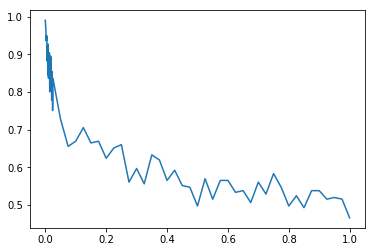

In [137]:
plt.plot(nsr,acc4)
sio.savemat('acc4.mat',{'nsr4':nsr,'acc4':acc4})

In [139]:
aaa=sio.loadmat('acc4')
aaa['acc4']

array([[0.99095023, 0.99095023, 0.98642534, 0.97285068, 0.97285068,
        0.9638009 , 0.93665158, 0.95022624, 0.94117647, 0.93665158,
        0.95022624, 0.95022624, 0.91855204, 0.88235294, 0.92307693,
        0.91402715, 0.91402715, 0.84615385, 0.87782806, 0.86877828,
        0.92760181, 0.87782806, 0.83710407, 0.89140271, 0.88235294,
        0.88235294, 0.8959276 , 0.86425339, 0.90497737, 0.85067874,
        0.80090497, 0.85520362, 0.82352941, 0.88235294, 0.85520362,
        0.87330317, 0.8959276 , 0.80995475, 0.85520362, 0.89140271,
        0.81447964, 0.80542986, 0.81447964, 0.77828055, 0.85520362,
        0.85520362, 0.83257919, 0.80542987, 0.80542986, 0.75113123,
        0.78733031, 0.83710407, 0.72850679, 0.65610859, 0.66968326,
        0.70588235, 0.66515837, 0.66968326, 0.62443439, 0.65158371,
        0.66063348, 0.56108597, 0.59728506, 0.55656108, 0.63348416,
        0.6199095 , 0.56561086, 0.59276018, 0.5520362 , 0.54751131,
        0.49773756, 0.57013575, 0.5158371 , 0.56

In [8]:
len(sio.loadmat('acc4')['acc4'][0])


91

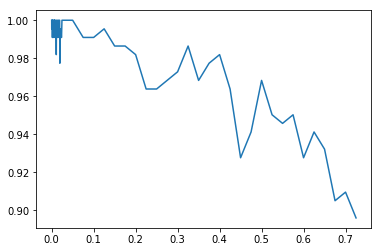

In [25]:
nsr=sio.loadmat('acc1')['nsr1']
acc1_1=sio.loadmat('acc1')['acc1'][0]
acc1_2=sio.loadmat('acc1_2')['acc1_2'][0]
acc1=np.concatenate((acc1_1,acc1_2))

acc2_1=sio.loadmat('acc2')['acc2'][0]
acc2_2=sio.loadmat('acc2_2')['acc2'][0]
acc2=np.concatenate((acc2_1,acc2_2))

acc3_1=sio.loadmat('acc3')['acc3'][0]
acc3_2=sio.loadmat('acc3_2')['acc3'][0]
acc3=np.concatenate((acc3_1,acc3_2))

acc4=sio.loadmat('acc4')['acc4'][0]
plt.plot(nsr[0][:80],acc2[:80])



#plt.plot(nsr[0],acc1)
#plt.plot(nsr[0],acc3)
#plt.plot(nsr[0],acc4)#

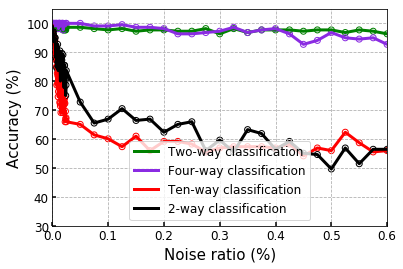

In [26]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 13,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12,
}

plt.xlabel('Noise ratio (%)',fontsize=15)
plt.ylabel('Accuracy (%)',fontsize=15)
plt.ylim(30,105)
plt.xlim(0,0.6)
plt.tick_params(direction='in',width=1.5,length=4)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.grid(linestyle='--')
#plt.axhline(y=90,c='k',linestyle='--',linewidth=2)
#plt.text(105, 72, r'Noise ratio = 100%', fontdict=font1)    

#plt.vlines(100,0,105,linestyle='--',linewidth=2)
#plt.fill_between(nsr[:np.where(np.asarray(accuracy10)<0.98)[0][0]], 105, color='yellow', alpha=0.2,label='Accuracy>98%')
#plt.fill_between(nsr[np.where(np.asarray(accuracy10)<0.98)[0][0]:], 105, color='blue', alpha=0.03,label='Accuracy<98%')

plt.scatter(nsr[0][:80],np.asarray(acc1[:80])*100,color='', marker='o', edgecolors='green')
plt.plot(nsr[0][:80],np.asarray(acc1[:80])*100,linewidth=3,c='green',label='Two-way classification')

plt.plot(nsr[0][:80],np.asarray(acc2[:80])*100,linewidth=3,c='blueviolet',label='Four-way classification')
plt.scatter(nsr[0][:80],np.asarray(acc2[:80])*100,color='', marker='o', edgecolors='blueviolet')

plt.plot(nsr[0][:80],np.asarray(acc3[:80])*100,linewidth=3,c='red',label='Ten-way classification')
plt.scatter(nsr[0][:80],np.asarray(acc3[:80])*100,color='', marker='o', edgecolors='r')

plt.plot(nsr[0][:80],np.asarray(acc4[:80])*100,linewidth=3,c='k',label='2-way classification')
plt.scatter(nsr[0][:80],np.asarray(acc4[:80])*100,color='', marker='o', edgecolors='k')

#frame.set_facecolor('white') 
plt.legend(loc='lower center',prop=font2,facecolor ='white')
#plt.savefig('noise acc.jpg',dpi=1200)